# Regression Predict House Price Solution

© ZINDI x DSN

---




### Predict Overview: Spain Electricity Shortfall Challenge

Wazobia Real Estate Limited is a prominent real estate company operating in Nigeria. With a vast portfolio of properties, they strive to provide accurate and competitive pricing for houses. However, they have been facing challenges in accurately predicting the prices of houses in the current market. To overcome this hurdle, Wazobia Real Estate Limited is seeking the expertise of data scientists like you to develop a robust predictive model.

The objective of this hackathon is to create a powerful and accurate predictive model that can estimate the prices of houses in Nigeria. By leveraging the provided dataset, you will analyze various factors that impact house prices, identify meaningful patterns, and build a model that can generate reliable price predictions. The ultimate goal is to provide Wazobia Real Estate Limited with an effective tool to make informed pricing decisions and enhance their competitiveness in the market.

By participating in this hackathon, you have the opportunity to make a significant impact on the operations and growth of Wazobia Real Estate Limited. Your data-driven solution will empower the company to overcome their pricing challenges, improve their market position, and deliver enhanced value to their customers.

This means that my tasks are:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the prices of houses in Nieria;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.



## Importing Libraries

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
%matplotlib inline
import plotly.express as px



# Libraries for data preparation and model building
import sklearn
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF
import xgboost as xgb
import catboost as cb
from catboost import CatBoostClassifier
from sklearn.linear_model import HuberRegressor, TheilSenRegressor
from sklearn.model_selection import GridSearchCV
import ptitprince as pt





# enhanced stats functions
from scipy import stats
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42
import warnings
warnings.filterwarnings('ignore')

## 2. Loading the Data

In [2]:
df = pd.read_csv('Housing_dataset_train.csv')
df.head(20)

ID      loc                 title  bedroom  bathroom  parking_space  \
0    3583  Katsina  Semi-detached duplex      2.0       2.0            1.0   
1    2748     Ondo             Apartment      NaN       2.0            4.0   
2    9261    Ekiti                   NaN      7.0       5.0            NaN   
3    2224  Anambra       Detached duplex      5.0       2.0            4.0   
4   10300     Kogi        Terrace duplex      NaN       5.0            6.0   
5    1733    Borno               Mansion      NaN       1.0            3.0   
6    7892    Kwara              Bungalow      NaN       4.0            4.0   
7    3003  Katsina             Penthouse      3.0       3.0            5.0   
8     555     Osun  Semi-detached duplex      NaN       1.0            2.0   
9    3085   Kaduna             Penthouse      NaN       3.0            3.0   
10  12573     Ogun              Bungalow      1.0       2.0            6.0   
11   2624  Bayelsa             Apartment      3.0       4.0            2.0   
12   3753      NaN                   NaN      5.0       NaN            5.0   
13     42    Borno        Terrace duplex      NaN       2.0            3.0   
14   3897     Abia        Terrace duplex      3.0       3.0            3.0   
15   6184   Rivers             Townhouse      2.0       2.0            2.0   
16    488     Ondo                   NaN      4.0       2.0            2.0   
17   2524   Taraba        Terrace duplex      1.0       NaN            4.0   
18   2599   Ebonyi             Apartment      5.0       2.0            1.0   
19   3389   Kaduna                   NaN      5.0       1.0            1.0   

          price  
0   1149999.565  
1   1672416.689  
2   3364799.814  
3   2410306.756  
4   2600700.898  
5   1341750.867  
6   2125789.778  
7   2043107.592  
8   1219453.877  
9   2710664.872  
10  1330213.036  
11  1891772.069  
12  2087592.812  
13  1492509.365  
14  1293794.285  
15  2028777.004  
16  1851837.902  
17  1065123.440  
18  1272895.726  
19  1424308.199

In [3]:
df['title'].unique()

array(['Semi-detached duplex', 'Apartment', nan, 'Detached duplex',
       'Terrace duplex', 'Mansion', 'Bungalow', 'Penthouse', 'Townhouse',
       'Flat', 'Cottage'], dtype=object)

## 3. Exploratory Data Analysis (EDA)

In [4]:
# look at data statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12437 non-null  float64
 5   parking_space  12430 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


Summary Observations:

The DataFrame contains a total of 14,000 property listings, which may represent a diverse real estate dataset.
The "loc" and "title" columns have missing values, indicating incomplete information for some property listings. These missing values may need to be handled during data analysis or modeling.
The "bedroom," "bathroom," and "parking_space" columns are numeric and have fractional values, suggesting that some properties may have non-integer bedroom, bathroom, and parking space counts.
All properties have a price listed, and there are no missing values in the "price" column.
Considering the real estate context, further analysis could involve examining relationships between variables, exploring price distributions, identifying trends in property attributes, and handling missing data appropriately.
It's important to note that this summary report provides only a basic overview of the DataFrame. More in-depth analysis and visualization are necessary to gain deeper insights and draw meaningful conclusions from the data.

In [5]:
# Convert the ID column to object datatype
df['ID'] = df['ID'].astype('object')

In [6]:
# have a look at feature distributions
df.describe().T

count          mean           std        min           25%  \
bedroom        12201.0  4.308171e+00  2.441165e+00       1.00  2.000000e+00   
bathroom       12437.0  3.134116e+00  2.029104e+00       0.00  1.000000e+00   
parking_space  12430.0  3.130249e+00  1.612869e+00       0.00  2.000000e+00   
price          14000.0  2.138082e+06  1.083057e+06  431967.29  1.393990e+06   

                        50%          75%          max  
bedroom        4.000000e+00        6.000         9.00  
bathroom       2.000000e+00        5.000         8.00  
parking_space  3.000000e+00        4.000         6.00  
price          1.895223e+06  2586699.494  16568486.16

In [7]:
df['ID'].astype('object')

0         3583
1         2748
2         9261
3         2224
4        10300
         ...  
13995     6175
13996     9704
13997    11190
13998     9256
13999     8787
Name: ID, Length: 14000, dtype: object

In [8]:
# Check for missing values
df.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1563
parking_space    1570
price               0
dtype: int64

In [9]:
# what is the dimension of the dataset
df.shape

(14000, 7)

In [10]:
# # Handle missin values
df.parking_space.fillna(2, inplace=True)
df.bathroom.fillna(3, inplace=True)
df.bedroom.fillna(3, inplace=True)

In [11]:
# Verify the whether it is effected
df.isna().sum()

ID                  0
loc              1813
title            1722
bedroom             0
bathroom            0
parking_space       0
price               0
dtype: int64

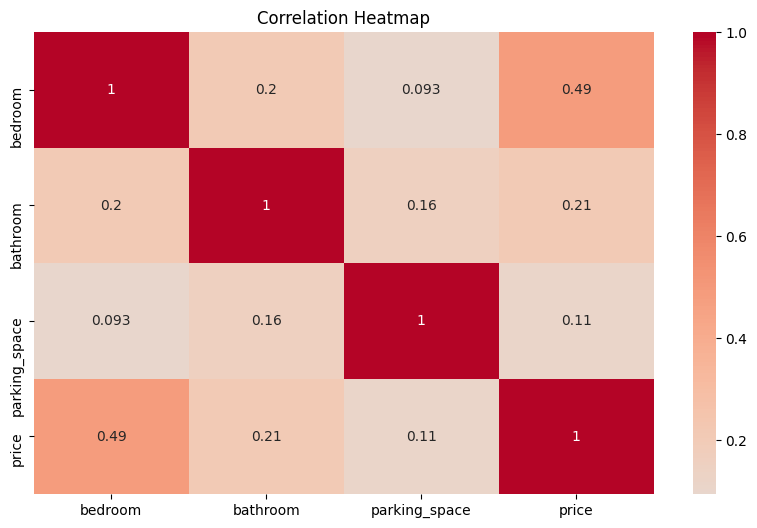

In [12]:
# Correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


### Data Cleaning

In [13]:
# Drop the remainin missing values
df.dropna(inplace=True)

In [14]:
# Verify whether missing values are dropped
df.isna().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

In [15]:
# What is the new dimensionof the dataset after droppin the missing values
df.shape

(10531, 7)

In [16]:
# # Find the 75th and 25th percentiles
# price_seventy_fifth = df["price"].quantile(0.75)
# price_twenty_fifth = df["price"].quantile(0.25)

# # Calculate iqr
# prices_iqr = price_seventy_fifth - price_twenty_fifth

# # Calculate the thresholds
# upper = price_seventy_fifth + (1.5 * prices_iqr)
# lower = price_twenty_fifth - (1.5 * prices_iqr)

# # Subset the data
# # df = df[df['price']>lower]
# print(df[df["price"] > lower]) 
# print(df[df["price"] < upper])
# #print(df["price"].describe())

In [17]:
df.kurtosis()

ID               -0.945599
bedroom          -0.513486
bathroom         -0.613406
parking_space    -0.783402
price            13.722397
dtype: float64

In [18]:
df.skew()

ID               0.610522
bedroom          0.647655
bathroom         0.710515
parking_space    0.494467
price            2.329209
dtype: float64

In [19]:
df.var()

ID               1.455645e+07
bedroom          5.220853e+00
bathroom         3.528355e+00
parking_space    2.405201e+00
price            1.144208e+12
dtype: float64

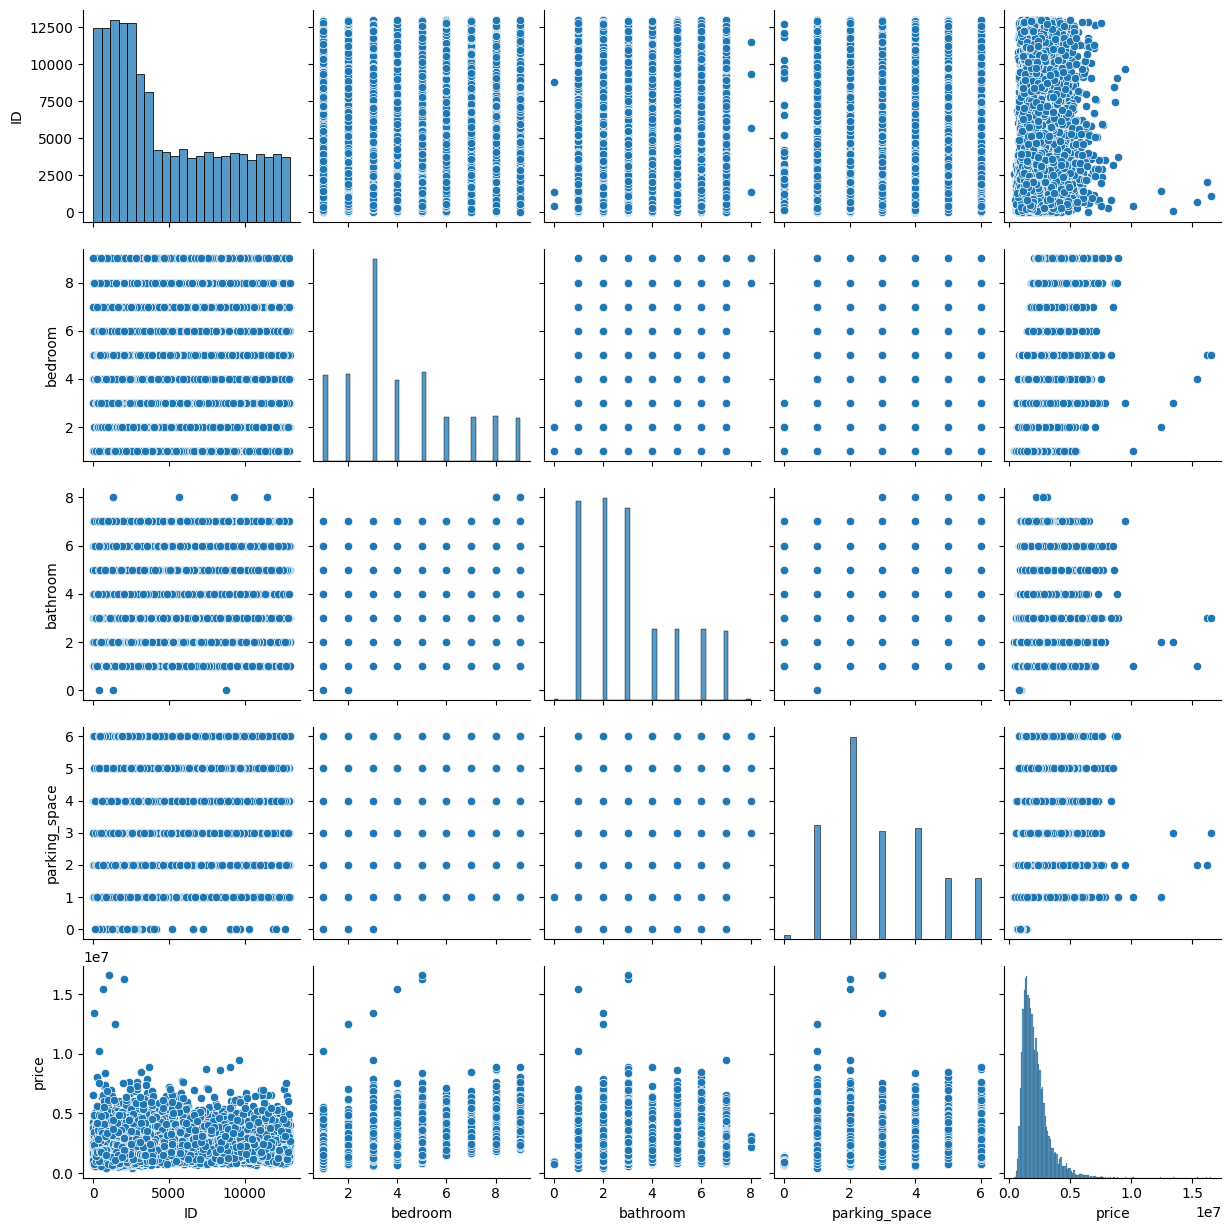

In [20]:
# Let's have a pairwise plot of the dataset
sns.pairplot(df)


In [21]:
# dabl.plot(df, target_col='price')

<Axes: xlabel='price', ylabel='Density'>

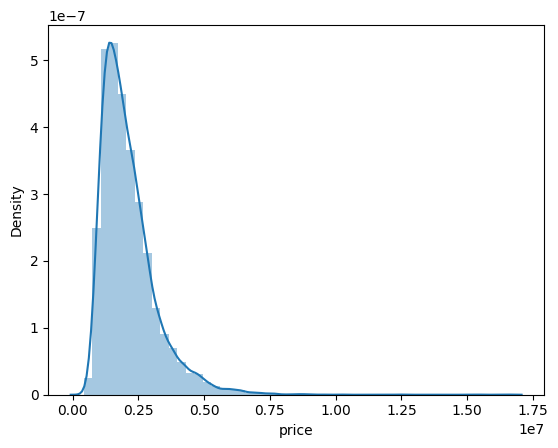

In [22]:
sns.distplot(df['price'])

The above distribution plot is right skewed, which means it is not normally distributed. There is need to scale it

In [23]:
print("skewness %f" %df['price'].skew())
print("kurtosis %f" %df['price'].kurtosis())

skewness 2.329209
kurtosis 13.722397


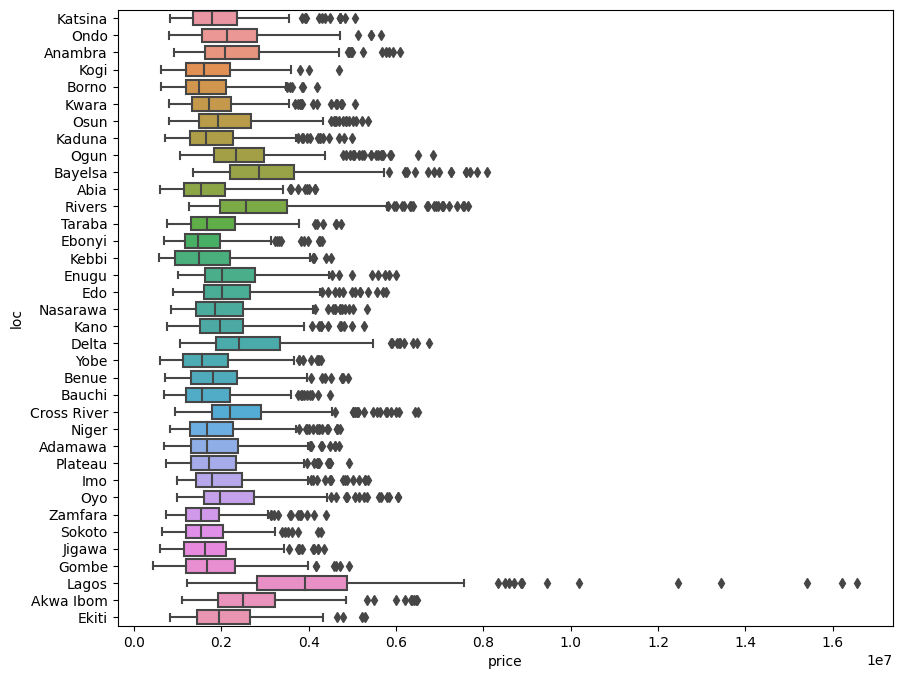

In [24]:
plt.figure(figsize=[10,8])
sns.boxplot(y=df['loc'], x=df['price'])
plt.show()

<Axes: xlabel='bedroom', ylabel='price'>

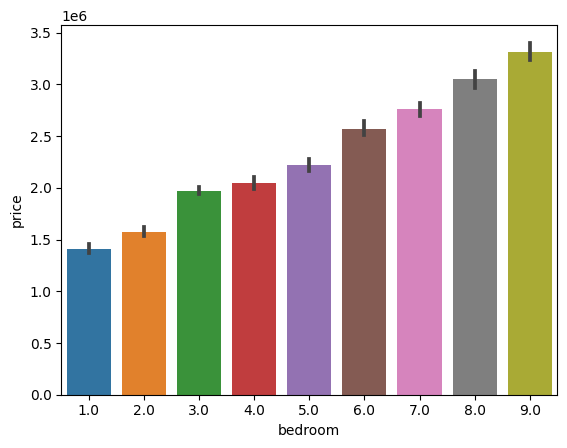

In [25]:
sns.barplot(x='bedroom', y='price', data=df)

In [26]:
house_by_loc = df.groupby('loc')['loc'].size()
display(house_by_loc.sort_values(ascending=False))

loc
Cross River    317
Imo            311
Anambra        310
Benue          309
Kaduna         309
Zamfara        307
Yobe           307
Borno          306
Plateau        301
Oyo            301
Kano           301
Ondo           300
Ebonyi         298
Ogun           298
Niger          297
Gombe          296
Kebbi          295
Nasarawa       295
Katsina        292
Jigawa         289
Enugu          288
Bauchi         288
Sokoto         287
Osun           286
Ekiti          286
Kwara          285
Adamawa        285
Bayelsa        284
Taraba         281
Kogi           279
Rivers         278
Delta          277
Abia           276
Lagos          274
Akwa Ibom      273
Edo            265
Name: loc, dtype: int64

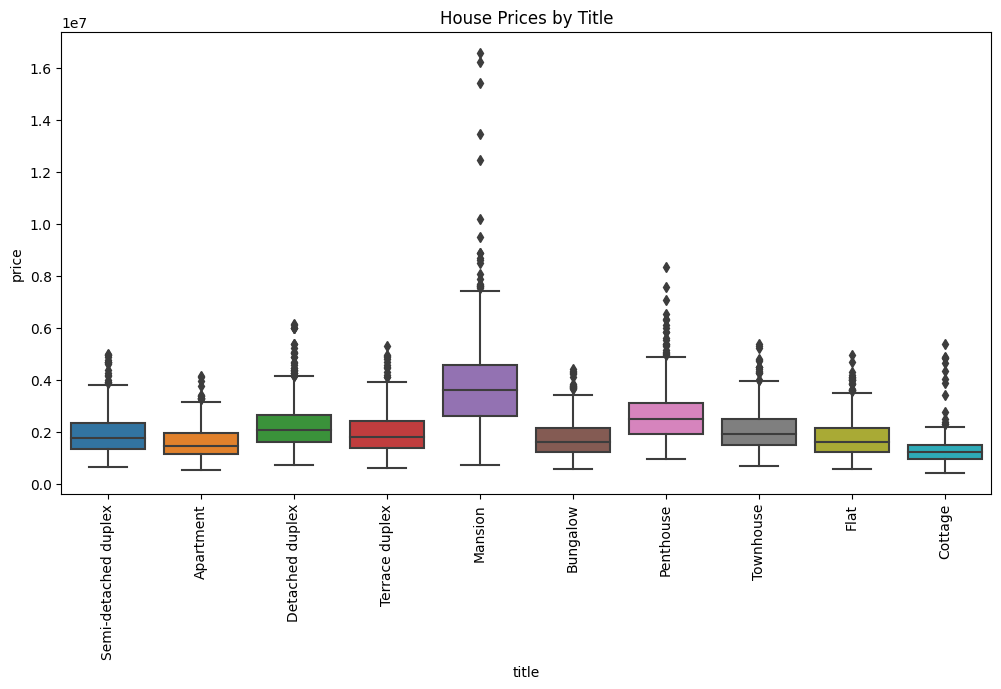

In [28]:
# Box plot of 'price' for each 'title'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='title', y='price')
plt.xticks(rotation=90)
plt.title('House Prices by Title')
plt.show()

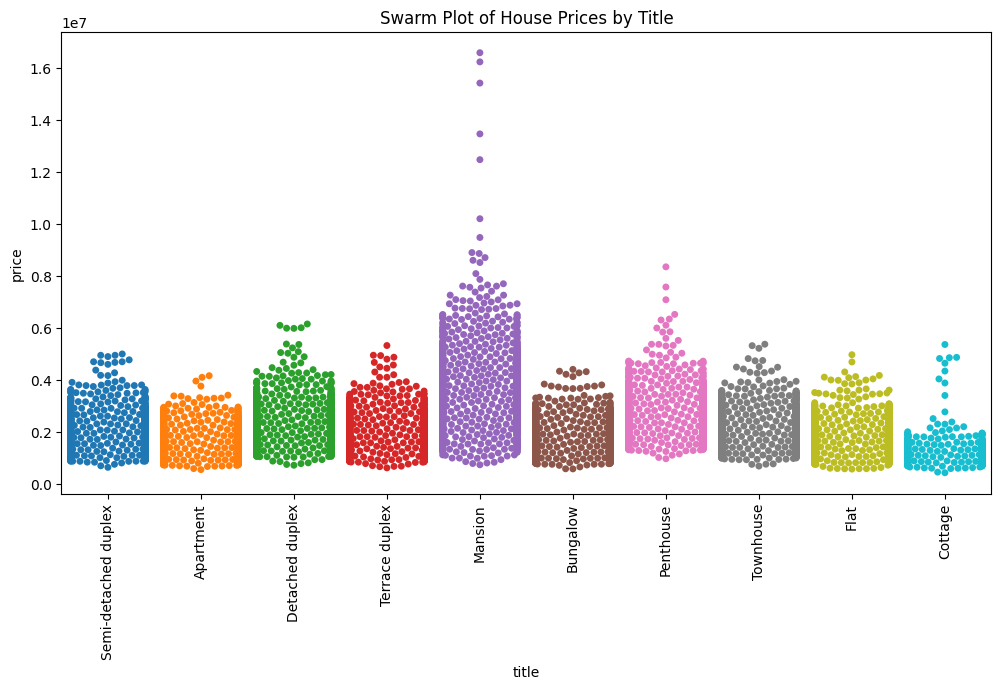

In [29]:
# Swarm plot of 'price' for each 'title'
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df, x='title', y='price')
plt.xticks(rotation=90)
plt.title('Swarm Plot of House Prices by Title')
plt.show()


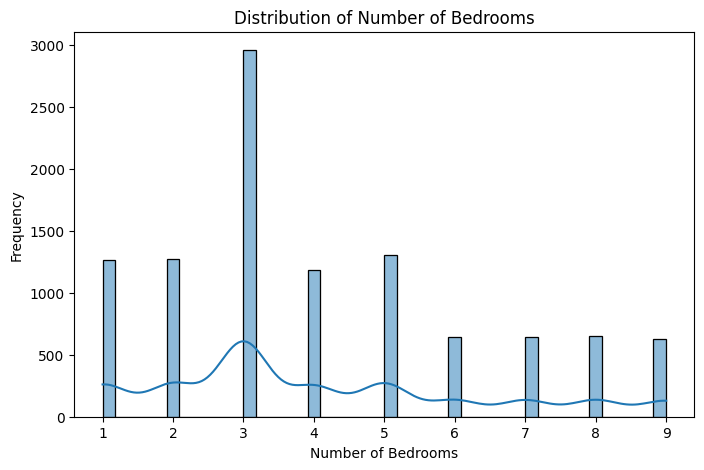

In [30]:
# Histogram with KDE for 'bedroom'
plt.figure(figsize=(8, 5))
sns.histplot(df['bedroom'], kde=True)
plt.title('Distribution of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()


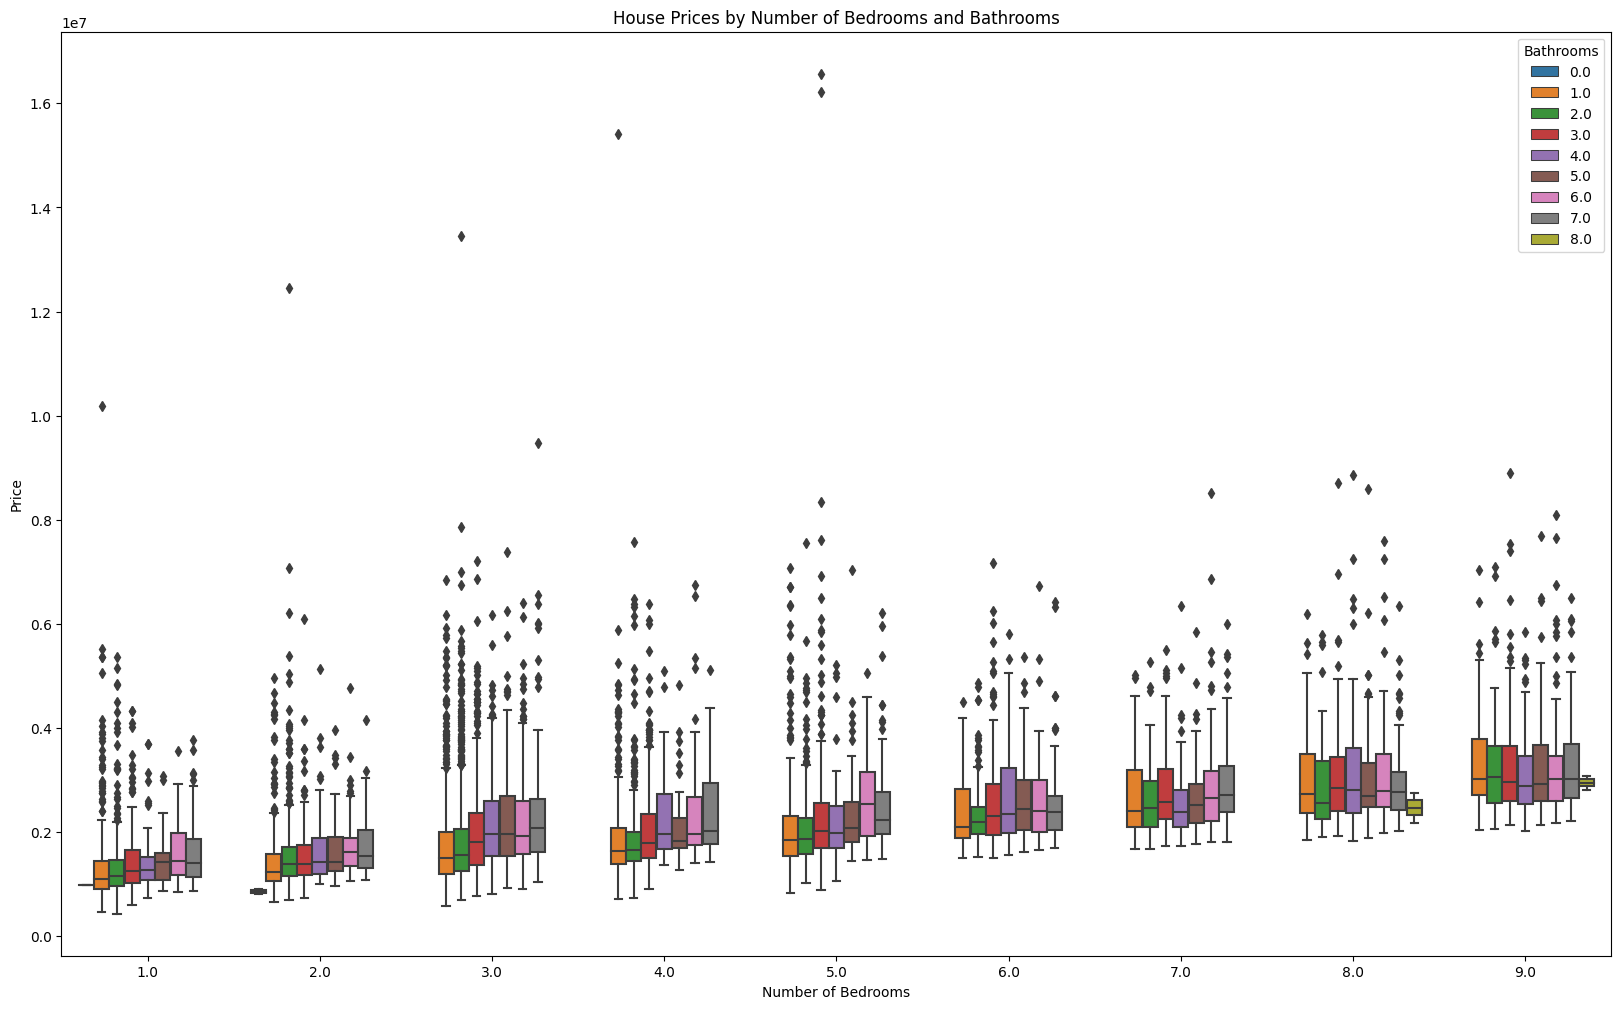

In [31]:
# Box plot of 'price' for each 'bedroom' and 'bathroom' combination
plt.figure(figsize=(20, 12))
sns.boxplot(data=df, x='bedroom', y='price', hue='bathroom')
plt.title('House Prices by Number of Bedrooms and Bathrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.legend(title='Bathrooms', loc='upper right', title_fontsize=10)
plt.show()


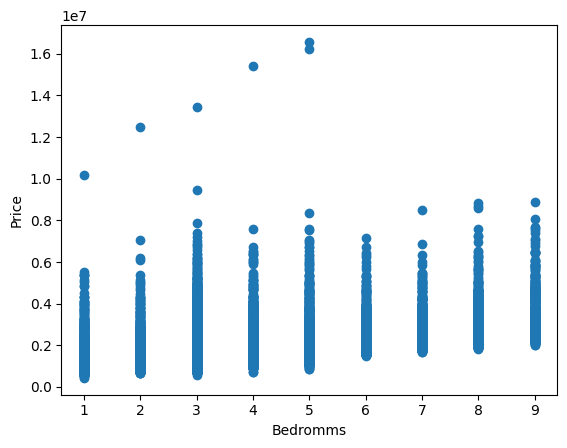

In [32]:
fig, ax = plt.subplots()
ax.scatter(x=df['bedroom'], y= df['price'])
plt.xlabel("Bedromms")
plt.ylabel("Price")
plt.show()

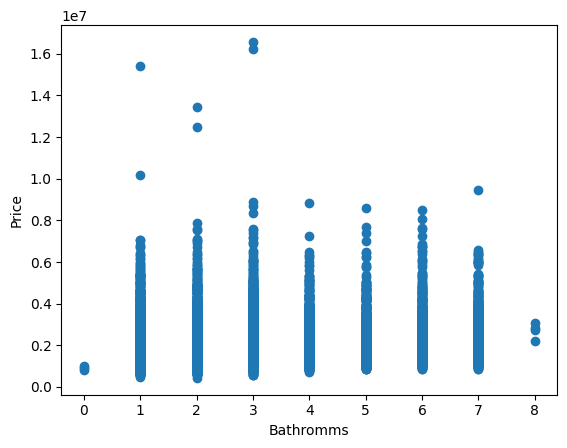

In [33]:
fig, ax = plt.subplots()
ax.scatter(x=df['bathroom'], y= df['price'])
plt.xlabel("Bathromms")
plt.ylabel("Price")
plt.show()

 
 mu = 2127766.86 and sigma = 1069625.66



<function matplotlib.pyplot.show(close=None, block=None)>

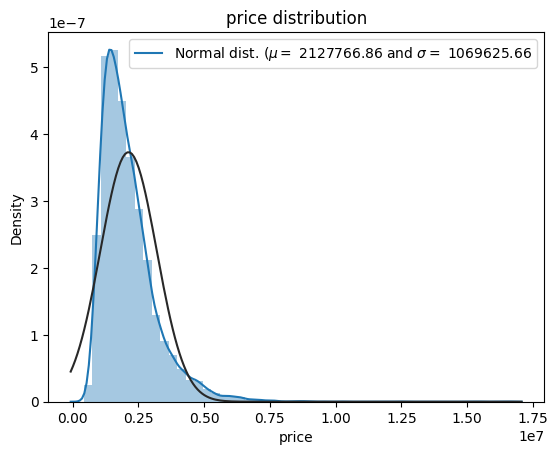

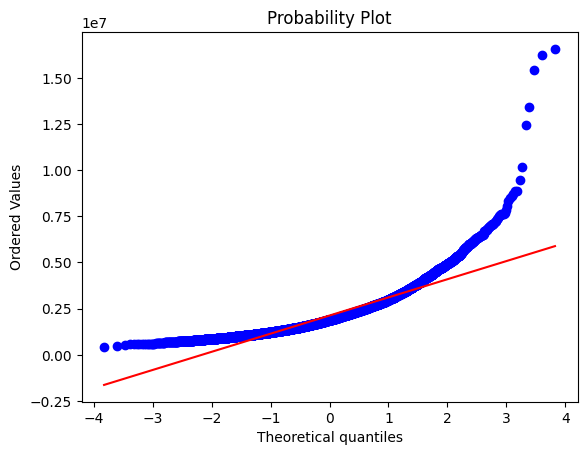

In [34]:
sns.distplot(df['price'], fit=norm)
(mu, sigma) = norm.fit(df['price'])
print(' \n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f}'.format(mu, sigma)],
          loc='best')
plt.title('price distribution')

fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show

log10, log2, log1p, emath.log

 
 mu = 14.47 and sigma = 0.44



<function matplotlib.pyplot.show(close=None, block=None)>

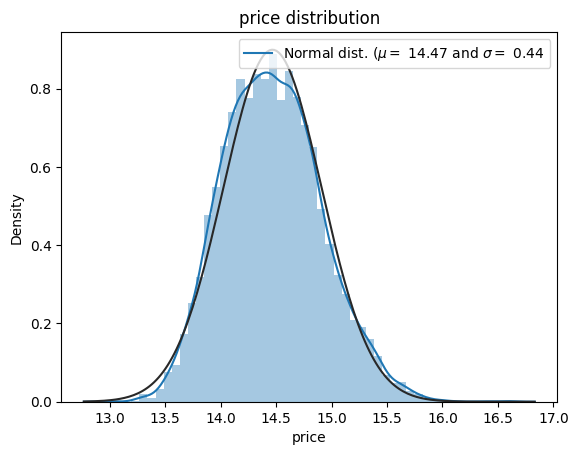

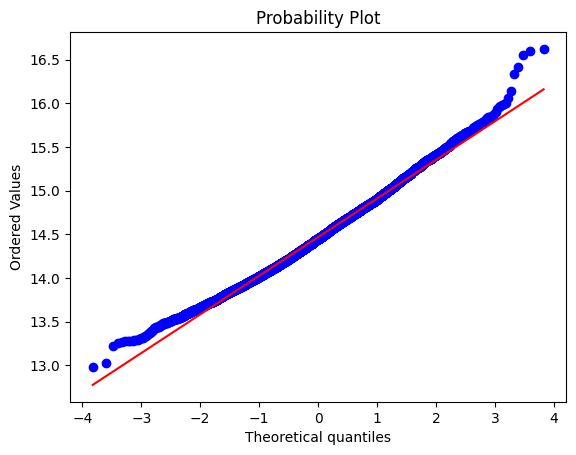

In [35]:
df['price'] = np.log1p(df['price'])
sns.distplot(df['price'], fit=norm)
(mu, sigma) = norm.fit(df['price'])
print(' \n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f}'.format(mu, sigma)],
          loc='best')
plt.title('price distribution')

fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show

In [36]:
df['price'].head(10)

0     13.955273
1     14.329781
3     14.695265
4     14.771292
5     14.109487
6     14.569654
7     14.529983
8     14.013914
9     14.812705
10    14.100850
Name: price, dtype: float64

In [37]:
a = np.expm1(df['price'])
a.head()

0    1149999.565
1    1672416.689
3    2410306.756
4    2600700.898
5    1341750.867
Name: price, dtype: float64

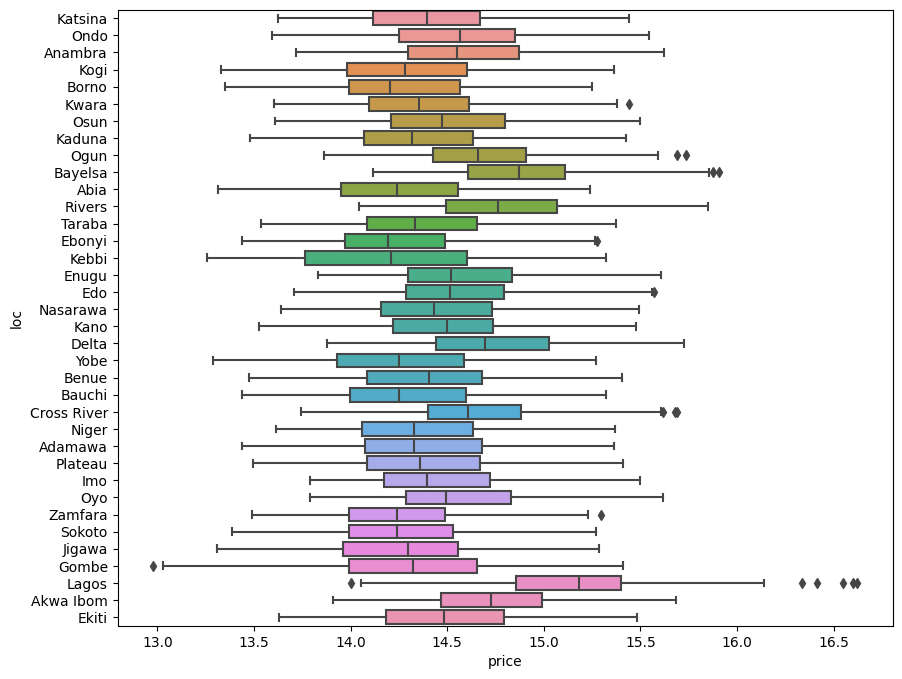

In [38]:
plt.figure(figsize=[10,8])
sns.boxplot(y=df['loc'], x=df['price'])
plt.show()

<Axes: >

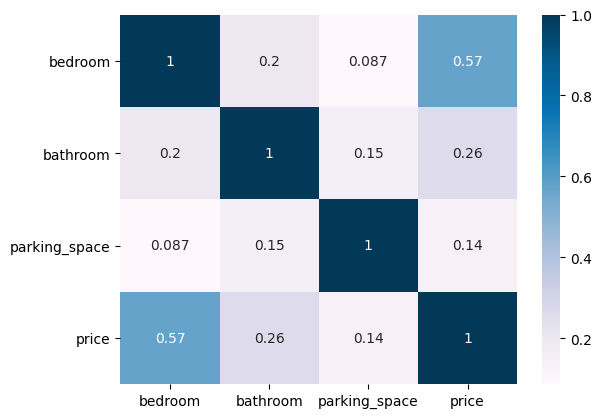

In [39]:
# Correlation
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.PuBu)

In [40]:
# Process the data and do encodin
encoded_df = pd.get_dummies(df, columns=['loc', 'title'], drop_first=True)
encoded_df.head()

ID  bedroom  bathroom  parking_space      price  loc_Adamawa  \
0   3583      2.0       2.0            1.0  13.955273            0   
1   2748      3.0       2.0            4.0  14.329781            0   
3   2224      5.0       2.0            4.0  14.695265            0   
4  10300      3.0       5.0            6.0  14.771292            0   
5   1733      3.0       1.0            3.0  14.109487            0   

   loc_Akwa Ibom  loc_Anambra  loc_Bauchi  loc_Bayelsa  ...  loc_Zamfara  \
0              0            0           0            0  ...            0   
1              0            0           0            0  ...            0   
3              0            1           0            0  ...            0   
4              0            0           0            0  ...            0   
5              0            0           0            0  ...            0   

   title_Bungalow  title_Cottage  title_Detached duplex  title_Flat  \
0               0              0                      0           0   
1               0              0                      0           0   
3               0              0                      1           0   
4               0              0                      0           0   
5               0              0                      0           0   

   title_Mansion  title_Penthouse  title_Semi-detached duplex  \
0              0                0                           1   
1              0                0                           0   
3              0                0                           0   
4              0                0                           0   
5              1                0                           0   

   title_Terrace duplex  title_Townhouse  
0                     0                0  
1                     0                0  
3                     0                0  
4                     1                0  
5                     0                0  

[5 rows x 49 columns]

In [41]:
# Columns of the encoded data 
encoded_df.columns

Index(['ID', 'bedroom', 'bathroom', 'parking_space', 'price', 'loc_Adamawa',
       'loc_Akwa Ibom', 'loc_Anambra', 'loc_Bauchi', 'loc_Bayelsa',
       'loc_Benue', 'loc_Borno', 'loc_Cross River', 'loc_Delta', 'loc_Ebonyi',
       'loc_Edo', 'loc_Ekiti', 'loc_Enugu', 'loc_Gombe', 'loc_Imo',
       'loc_Jigawa', 'loc_Kaduna', 'loc_Kano', 'loc_Katsina', 'loc_Kebbi',
       'loc_Kogi', 'loc_Kwara', 'loc_Lagos', 'loc_Nasarawa', 'loc_Niger',
       'loc_Ogun', 'loc_Ondo', 'loc_Osun', 'loc_Oyo', 'loc_Plateau',
       'loc_Rivers', 'loc_Sokoto', 'loc_Taraba', 'loc_Yobe', 'loc_Zamfara',
       'title_Bungalow', 'title_Cottage', 'title_Detached duplex',
       'title_Flat', 'title_Mansion', 'title_Penthouse',
       'title_Semi-detached duplex', 'title_Terrace duplex',
       'title_Townhouse'],
      dtype='object')

In [42]:
# evaluate correlation
correlation_matrix = encoded_df.corr()

# Print the correlation matrix
print(correlation_matrix.T)

                             bedroom  bathroom  parking_space     price  \
bedroom                     1.000000  0.197857       0.086980  0.570167   
bathroom                    0.197857  1.000000       0.153663  0.259463   
parking_space               0.086980  0.153663       1.000000  0.135041   
price                       0.570167  0.259463       0.135041  1.000000   
loc_Adamawa                 0.000303 -0.017621      -0.014894 -0.037445   
loc_Akwa Ibom              -0.004637 -0.007376      -0.008075  0.100263   
loc_Anambra                -0.015757 -0.008797       0.017946  0.048625   
loc_Bauchi                  0.001506  0.013360      -0.008766 -0.066702   
loc_Bayelsa                 0.010589  0.007664      -0.010021  0.156031   
loc_Benue                   0.001233  0.006201       0.002721 -0.029167   
loc_Borno                   0.002791 -0.000890      -0.006788 -0.075035   
loc_Cross River             0.011258  0.007334      -0.004364  0.075743   
loc_Delta                

<Axes: >

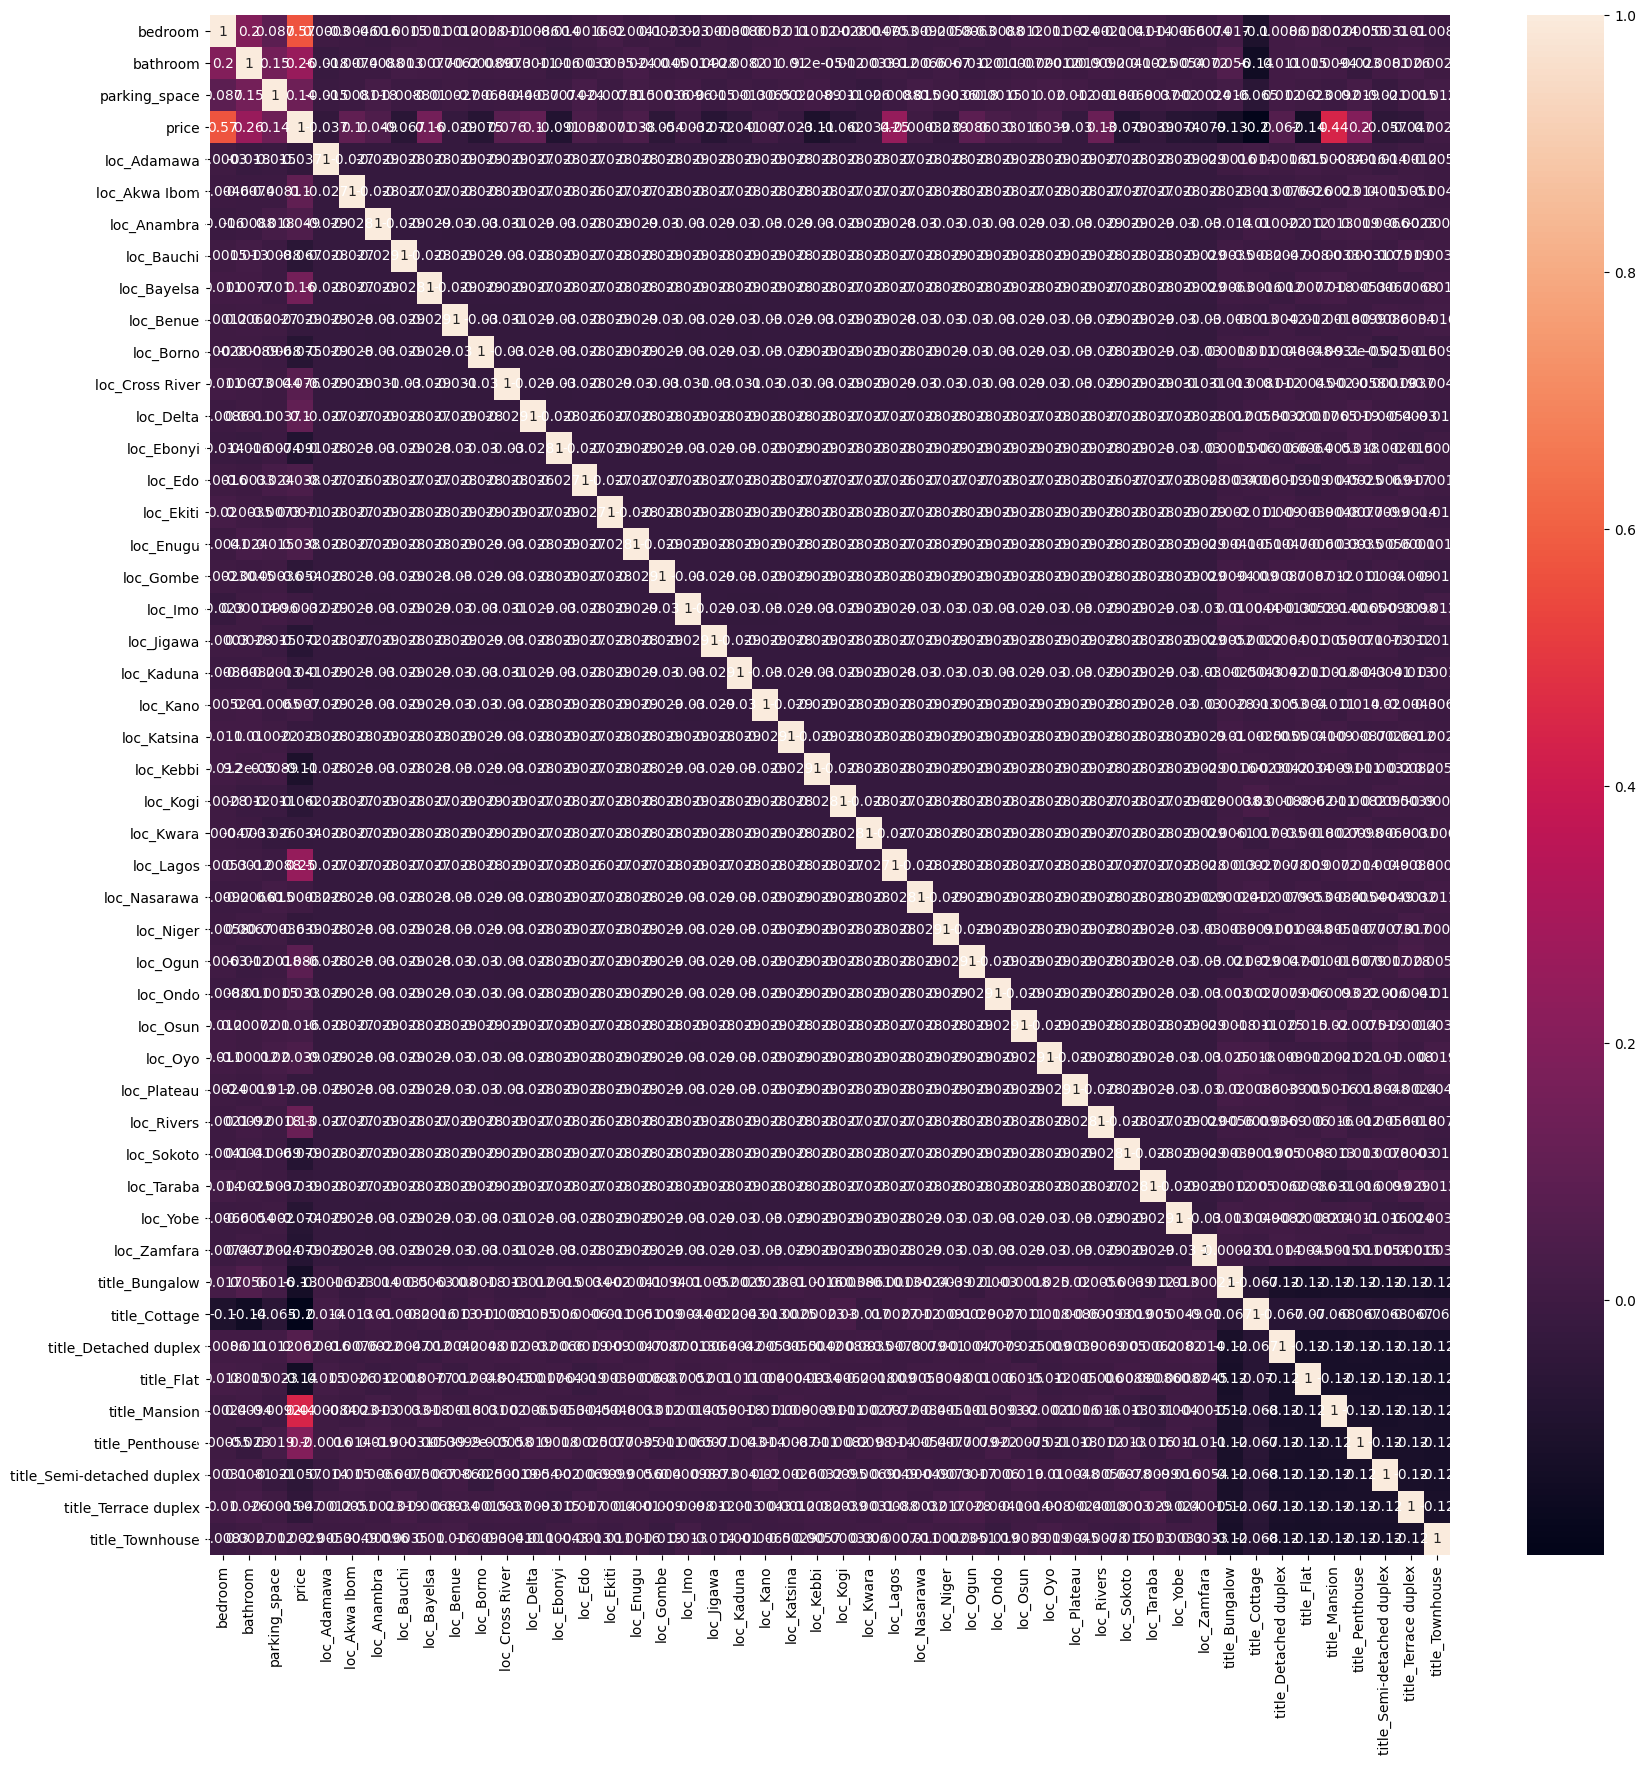

In [43]:
# plot relevant feature interactions
plt.figure(figsize=[20,20])
sns.heatmap(encoded_df.corr(), annot=True)

In [44]:
# feature engineering
ab = abs(correlation_matrix['price'])
rel = ab[ab >= .0]
ys = [index for index, value in rel.iteritems()]
ys.remove('price')
print(ys)
print(len(ys))

['bedroom', 'bathroom', 'parking_space', 'loc_Adamawa', 'loc_Akwa Ibom', 'loc_Anambra', 'loc_Bauchi', 'loc_Bayelsa', 'loc_Benue', 'loc_Borno', 'loc_Cross River', 'loc_Delta', 'loc_Ebonyi', 'loc_Edo', 'loc_Ekiti', 'loc_Enugu', 'loc_Gombe', 'loc_Imo', 'loc_Jigawa', 'loc_Kaduna', 'loc_Kano', 'loc_Katsina', 'loc_Kebbi', 'loc_Kogi', 'loc_Kwara', 'loc_Lagos', 'loc_Nasarawa', 'loc_Niger', 'loc_Ogun', 'loc_Ondo', 'loc_Osun', 'loc_Oyo', 'loc_Plateau', 'loc_Rivers', 'loc_Sokoto', 'loc_Taraba', 'loc_Yobe', 'loc_Zamfara', 'title_Bungalow', 'title_Cottage', 'title_Detached duplex', 'title_Flat', 'title_Mansion', 'title_Penthouse', 'title_Semi-detached duplex', 'title_Terrace duplex', 'title_Townhouse']
47


In [45]:
encoded_df = encoded_df[['ID', 'bedroom', 'bathroom', 'parking_space', 'loc_Adamawa', 'loc_Akwa Ibom', 'loc_Anambra', 'loc_Bauchi',
                         'loc_Bayelsa', 'loc_Benue', 'loc_Borno', 'loc_Cross River', 'loc_Delta', 'loc_Ebonyi', 'loc_Edo',
                         'loc_Ekiti', 'loc_Enugu', 'loc_Gombe', 'loc_Imo', 'loc_Jigawa', 'loc_Kaduna', 'loc_Kano', 'loc_Katsina', 
                         'loc_Kebbi', 'loc_Kogi', 'loc_Kwara', 'loc_Lagos', 'loc_Nasarawa', 'loc_Niger', 'loc_Ogun', 'loc_Ondo',
                         'loc_Osun', 'loc_Oyo', 'loc_Plateau', 'loc_Rivers', 'loc_Sokoto', 'loc_Taraba', 'loc_Yobe', 'loc_Zamfara',
                         'title_Bungalow', 'title_Cottage', 'title_Detached duplex', 'title_Flat', 
                         'title_Mansion', 'title_Penthouse', 'title_Semi-detached duplex', 'title_Terrace duplex', 'title_Townhouse', 'price']]

# Modeling


## Feature Spliting

In [46]:
# split data
X = encoded_df.drop(['price','ID'], axis=1)
y = encoded_df['price']

In [47]:
# bestfit = SelectKBest(score_func=chi2, k=10)
# fit = bestfit.fit(X,y)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)
# featscores = pd.concat([dfcolumns,dfscores], axis=1) 
# featscores.columns = ['Features', 'Score']
# new_X = featscores.sort_values('Score', ascending=False).head(41)
# new_X.tail(11)

In [48]:
# create targets and features dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:

display(f'Training predictor: {X_train.shape}')
display(f'Training target: {y_train.shape}')
display(f'Testing predictor: {X_test.shape}')
display(f'Testing target: {y_test.shape}')

'Training predictor: (8424, 47)'

'Training target: (8424,)'

'Testing predictor: (2107, 47)'

'Testing target: (2107,)'

## Creating Regression Models 

In [50]:
# Linear regression
reg = LinearRegression()
reg.fit(X_train,y_train)
predicts = reg.predict(X_test)
# train_pred = reg.predict(X_train)


In [51]:
# Lasso model

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_test)


In [52]:
# Build and train the Ridge regression model
ridge = Ridge(alpha=0.1)  # You can adjust the alpha parameter to control the regularization strength
ridge.fit(X_train, y_train)

# Make predictions on the test set
pred_ridge = ridge.predict(X_test)

In [53]:
# Decision Tree
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)

In [54]:
# Random forest
rf = RandomForestRegressor(n_estimators=200, max_depth=8)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [55]:
# Elastic Net Regression
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions_elastic_net = elastic_net.predict(X_test)



In [56]:
# Polynomial Regression
polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X_train)
poly_regression = LinearRegression()
poly_regression.fit(X_poly, y_train)
X_test_poly = polynomial_features.transform(X_test)
predictions_polynomial = poly_regression.predict(X_test_poly)



In [57]:
# Support Vector Regression
svr = SVR()
svr.fit(X_train, y_train)
predictions_svr = svr.predict(X_test)



In [58]:
# Gradient Boosting Regression
gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(X_train, y_train)
predictions_gradient_boosting = gradient_boosting.predict(X_test)



In [59]:
# Neural Network Regression
neural_network = MLPRegressor()
neural_network.fit(X_train, y_train)
predictions_neural_network = neural_network.predict(X_test)




In [60]:
# Bayesian Regression
bayesian_regression = GaussianProcessRegressor()
bayesian_regression.fit(X_train, y_train)
predictions_bayesian = bayesian_regression.predict(X_test)



In [61]:
# K-Nearest Neighbors Regression
knn_regression = KNeighborsRegressor()
knn_regression.fit(X_train, y_train)
predictions_knn = knn_regression.predict(X_test)



In [62]:
# XGBoost Regression
xgboost = xgb.XGBRegressor()
xgboost.fit(X_train, y_train)
predictions_xgboost = xgboost.predict(X_test)


In [63]:
# CatBoost Regression
catboost = cb.CatBoostRegressor()
catboost.fit(X_train, y_train)
predictions_catboost = catboost.predict(X_test)



Learning rate set to 0.057334
0:	learn: 0.4266224	total: 677ms	remaining: 11m 16s
1:	learn: 0.4126680	total: 689ms	remaining: 5m 43s
2:	learn: 0.4005234	total: 701ms	remaining: 3m 53s
3:	learn: 0.3886103	total: 709ms	remaining: 2m 56s
4:	learn: 0.3770652	total: 713ms	remaining: 2m 21s
5:	learn: 0.3666196	total: 718ms	remaining: 1m 58s
6:	learn: 0.3565075	total: 722ms	remaining: 1m 42s
7:	learn: 0.3472465	total: 727ms	remaining: 1m 30s
8:	learn: 0.3390621	total: 732ms	remaining: 1m 20s
9:	learn: 0.3311955	total: 736ms	remaining: 1m 12s
10:	learn: 0.3244538	total: 741ms	remaining: 1m 6s
11:	learn: 0.3183461	total: 745ms	remaining: 1m 1s
12:	learn: 0.3122397	total: 749ms	remaining: 56.9s
13:	learn: 0.3066441	total: 754ms	remaining: 53.1s
14:	learn: 0.3013822	total: 758ms	remaining: 49.8s
15:	learn: 0.2965621	total: 762ms	remaining: 46.9s
16:	learn: 0.2921664	total: 767ms	remaining: 44.4s
17:	learn: 0.2880968	total: 771ms	remaining: 42.1s
18:	learn: 0.2840021	total: 776ms	remaining: 40.1s


197:	learn: 0.1654710	total: 1.65s	remaining: 6.69s
198:	learn: 0.1653544	total: 1.66s	remaining: 6.67s
199:	learn: 0.1652443	total: 1.66s	remaining: 6.65s
200:	learn: 0.1651442	total: 1.67s	remaining: 6.63s
201:	learn: 0.1650220	total: 1.67s	remaining: 6.61s
202:	learn: 0.1649143	total: 1.68s	remaining: 6.59s
203:	learn: 0.1648146	total: 1.68s	remaining: 6.57s
204:	learn: 0.1647020	total: 1.69s	remaining: 6.55s
205:	learn: 0.1645917	total: 1.7s	remaining: 6.54s
206:	learn: 0.1644946	total: 1.7s	remaining: 6.51s
207:	learn: 0.1643924	total: 1.71s	remaining: 6.49s
208:	learn: 0.1643019	total: 1.71s	remaining: 6.47s
209:	learn: 0.1642064	total: 1.71s	remaining: 6.45s
210:	learn: 0.1641149	total: 1.72s	remaining: 6.43s
211:	learn: 0.1640192	total: 1.72s	remaining: 6.41s
212:	learn: 0.1639291	total: 1.73s	remaining: 6.39s
213:	learn: 0.1638094	total: 1.73s	remaining: 6.36s
214:	learn: 0.1636999	total: 1.74s	remaining: 6.34s
215:	learn: 0.1636153	total: 1.74s	remaining: 6.32s
216:	learn: 0.

362:	learn: 0.1543314	total: 2.43s	remaining: 4.26s
363:	learn: 0.1542680	total: 2.44s	remaining: 4.26s
364:	learn: 0.1541980	total: 2.44s	remaining: 4.25s
365:	learn: 0.1541347	total: 2.45s	remaining: 4.24s
366:	learn: 0.1540662	total: 2.45s	remaining: 4.23s
367:	learn: 0.1540368	total: 2.46s	remaining: 4.22s
368:	learn: 0.1539903	total: 2.46s	remaining: 4.22s
369:	learn: 0.1539545	total: 2.47s	remaining: 4.21s
370:	learn: 0.1539054	total: 2.48s	remaining: 4.2s
371:	learn: 0.1538713	total: 2.48s	remaining: 4.19s
372:	learn: 0.1538301	total: 2.48s	remaining: 4.18s
373:	learn: 0.1537800	total: 2.49s	remaining: 4.17s
374:	learn: 0.1537291	total: 2.49s	remaining: 4.16s
375:	learn: 0.1536813	total: 2.5s	remaining: 4.15s
376:	learn: 0.1536455	total: 2.5s	remaining: 4.14s
377:	learn: 0.1536064	total: 2.51s	remaining: 4.13s
378:	learn: 0.1535740	total: 2.51s	remaining: 4.12s
379:	learn: 0.1535432	total: 2.52s	remaining: 4.11s
380:	learn: 0.1535039	total: 2.52s	remaining: 4.1s
381:	learn: 0.15

532:	learn: 0.1480623	total: 3.22s	remaining: 2.83s
533:	learn: 0.1480399	total: 3.23s	remaining: 2.82s
534:	learn: 0.1480101	total: 3.23s	remaining: 2.81s
535:	learn: 0.1479718	total: 3.24s	remaining: 2.81s
536:	learn: 0.1479460	total: 3.25s	remaining: 2.8s
537:	learn: 0.1479265	total: 3.25s	remaining: 2.79s
538:	learn: 0.1479017	total: 3.26s	remaining: 2.79s
539:	learn: 0.1478683	total: 3.26s	remaining: 2.78s
540:	learn: 0.1478443	total: 3.27s	remaining: 2.77s
541:	learn: 0.1478111	total: 3.27s	remaining: 2.77s
542:	learn: 0.1477876	total: 3.28s	remaining: 2.76s
543:	learn: 0.1477713	total: 3.28s	remaining: 2.75s
544:	learn: 0.1477475	total: 3.29s	remaining: 2.75s
545:	learn: 0.1477082	total: 3.29s	remaining: 2.74s
546:	learn: 0.1476794	total: 3.3s	remaining: 2.73s
547:	learn: 0.1476397	total: 3.3s	remaining: 2.72s
548:	learn: 0.1476094	total: 3.31s	remaining: 2.71s
549:	learn: 0.1475816	total: 3.31s	remaining: 2.71s
550:	learn: 0.1475523	total: 3.31s	remaining: 2.7s
551:	learn: 0.14

696:	learn: 0.1439121	total: 3.99s	remaining: 1.74s
697:	learn: 0.1438892	total: 4s	remaining: 1.73s
698:	learn: 0.1438713	total: 4.01s	remaining: 1.73s
699:	learn: 0.1438487	total: 4.01s	remaining: 1.72s
700:	learn: 0.1438200	total: 4.02s	remaining: 1.71s
701:	learn: 0.1437894	total: 4.02s	remaining: 1.71s
702:	learn: 0.1437581	total: 4.03s	remaining: 1.7s
703:	learn: 0.1437387	total: 4.03s	remaining: 1.7s
704:	learn: 0.1437151	total: 4.04s	remaining: 1.69s
705:	learn: 0.1436928	total: 4.04s	remaining: 1.68s
706:	learn: 0.1436722	total: 4.05s	remaining: 1.68s
707:	learn: 0.1436468	total: 4.05s	remaining: 1.67s
708:	learn: 0.1436300	total: 4.05s	remaining: 1.66s
709:	learn: 0.1436074	total: 4.06s	remaining: 1.66s
710:	learn: 0.1435791	total: 4.06s	remaining: 1.65s
711:	learn: 0.1435460	total: 4.07s	remaining: 1.65s
712:	learn: 0.1435241	total: 4.07s	remaining: 1.64s
713:	learn: 0.1434918	total: 4.08s	remaining: 1.63s
714:	learn: 0.1434702	total: 4.08s	remaining: 1.63s
715:	learn: 0.143

864:	learn: 0.1404155	total: 4.78s	remaining: 746ms
865:	learn: 0.1403969	total: 4.79s	remaining: 741ms
866:	learn: 0.1403746	total: 4.79s	remaining: 735ms
867:	learn: 0.1403528	total: 4.8s	remaining: 730ms
868:	learn: 0.1403382	total: 4.8s	remaining: 724ms
869:	learn: 0.1403110	total: 4.81s	remaining: 719ms
870:	learn: 0.1402885	total: 4.82s	remaining: 713ms
871:	learn: 0.1402755	total: 4.82s	remaining: 708ms
872:	learn: 0.1402571	total: 4.83s	remaining: 702ms
873:	learn: 0.1402394	total: 4.83s	remaining: 696ms
874:	learn: 0.1402264	total: 4.83s	remaining: 691ms
875:	learn: 0.1402072	total: 4.84s	remaining: 685ms
876:	learn: 0.1401956	total: 4.84s	remaining: 680ms
877:	learn: 0.1401850	total: 4.85s	remaining: 674ms
878:	learn: 0.1401711	total: 4.85s	remaining: 668ms
879:	learn: 0.1401482	total: 4.86s	remaining: 663ms
880:	learn: 0.1401269	total: 4.86s	remaining: 657ms
881:	learn: 0.1401067	total: 4.87s	remaining: 651ms
882:	learn: 0.1400903	total: 4.87s	remaining: 646ms
883:	learn: 0.

In [64]:
# Huber Regression
huber_regression = HuberRegressor()
huber_regression.fit(X_train, y_train)
predictions_huber = huber_regression.predict(X_test)



In [65]:
# Theil-Sen Regression
theil_sen_regression = TheilSenRegressor()
theil_sen_regression.fit(X_train, y_train)
pred_sneil = huber_regression.predict(X_test)

## Model Evaluation

In [66]:
#Comparing the True value and the Predicted Value of our models
lin = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(predicts)})
lass = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(pred_lasso)})
ridge = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(pred_ridge)})
des_tree = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(pred_tree)})
rf2 = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(rf_pred)})
elastic = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(predictions_elastic_net)})
poly = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(predictions_polynomial)}) 
svr = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(predictions_svr)})
grad= pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(predictions_gradient_boosting)})
neural = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(predictions_neural_network)})
bay = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(predictions_bayesian)})
knn = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(predictions_knn)})
# gaus = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_gaussian_process})
xgb = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(predictions_xgboost)})
cat = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(predictions_catboost)})
hub = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(predictions_huber)})
theil = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(pred_sneil)})




In [67]:
#Linear Model 
print(f'lin: {lin.head(10)}') 
print('\n')

# Lasso Model
print(f'lass:{lass.head(10)}')
print('\n')

# Ridge Model
print(f'ridge: {ridge.head(10)}') 
print('\n')

#Decision Tree Model
print(f'tree: {des_tree.head(10)}') 
print('\n')

# Random Forest Model
print(f'random: {rf2.head(10)}') 
print('\n')

print(f'elastic: {elastic.head(10)}') 
print('\n')

print(f'poly: {poly.head(10)}') 
print('\n')

print(f'svr: {svr.head(10)}') 
print('\n')

print(f'grad: {grad.head(10)}') 
print('\n')

print(f'neural: {neural.head(10)}') 
print('\n')

print(f'bayessian: {bay.head(10)}') 
print('\n')


print(f'knn: {knn.head(10)}') 
print('\n')

# print(f'gaus: {gaus.head(10)}') 
# print('\n')

print(f'xgb: {xgb.head(10)}') 
print('\n')

print(f'cat: {cat.head(10)}') 
print('\n')

print(f'hub: {hub.head(10)}') 
print('\n')

print(f'sneil: {theil.head(10)}') 
print('\n')





lin:              Actual     Predicted
5616   2.100251e+06  3.497937e+06
2816   1.396578e+06  1.401222e+06
1862   2.172564e+06  2.156976e+06
7135   2.228775e+06  2.267185e+06
3815   3.212206e+06  3.217257e+06
10717  8.719912e+05  9.856270e+05
8850   1.541040e+06  1.568933e+06
5186   2.798413e+06  2.800943e+06
10286  1.997792e+06  1.905864e+06
4828   1.461064e+06  2.361663e+06


lass:             Actual     Predicted
5616   2.100251e+06  2.880561e+06
2816   1.396578e+06  1.501203e+06
1862   2.172564e+06  1.477283e+06
7135   2.228775e+06  1.867402e+06
3815   3.212206e+06  2.968798e+06
10717  8.719912e+05  1.301200e+06
8850   1.541040e+06  1.222410e+06
5186   2.798413e+06  2.780678e+06
10286  1.997792e+06  1.999603e+06
4828   1.461064e+06  2.356269e+06


ridge:              Actual     Predicted
5616   2.100251e+06  3.497193e+06
2816   1.396578e+06  1.401108e+06
1862   2.172564e+06  2.156442e+06
7135   2.228775e+06  2.266708e+06
3815   3.212206e+06  3.216844e+06
10717  8.719912e+05  9.8562

In [68]:
Model_Performance = { 
    
                      'Test RMSE':
                    
                        {"Linear model": np.sqrt(mse(y_test,predicts)),
                        "Ridge": np.sqrt(mse(y_test,pred_ridge)),
                        "Lasso" : np.sqrt(mse(y_test,pred_lasso)),
                        "Decision Tree" : np.sqrt(mse(y_test,pred_tree)),
                        "Random Forest" : np.sqrt(mse(y_test,rf_pred)),
                        "elastic net regression": np.sqrt(mse(y_test,predictions_elastic_net)),
                        "polynomial": np.sqrt(mse(y_test,predictions_polynomial)),
                        "support vector" : np.sqrt(mse(y_test,predictions_svr)),
                        "gradient boosting" : np.sqrt(mse(y_test,predictions_gradient_boosting)),
                        "neural network" : np.sqrt(mse(y_test,predictions_neural_network)),
                        "bayesian": np.sqrt(mse(y_test,predictions_bayesian)),
                        "k-nearest neighbour": np.sqrt(mse(y_test,predictions_knn)),
#                         "gaussian process" : np.sqrt(mse(y_test,predictions_gaussian_process)),
                        "Catboost" : np.sqrt(mse(y_test,predictions_catboost)),
                        "Huber" : np.sqrt(mse(y_test,predictions_huber)),
                        "Theil-Sen" : np.sqrt(mse(y_test,pred_sneil))}
                        
                    }

# create dataframe from dictionary
Model_Performance = pd.DataFrame(data=Model_Performance)
Model_Performance

Test RMSE
Catboost                 0.153969
Decision Tree            0.236211
Huber                    0.165429
Lasso                    0.263343
Linear model             0.162702
Random Forest            0.231082
Ridge                    0.162703
Theil-Sen                0.165429
bayesian                 1.391744
elastic net regression   0.434204
gradient boosting        0.186107
k-nearest neighbour      0.250263
neural network           0.161941
polynomial               0.157207
support vector           0.158915

elastic net regression
polynomial
support vector
random forest
gradient boosting
neural network
bayesian 
k-nearest neighbour
gaussian process
XGBoost 
CatBoost 
Huber 
Theil-Sen

In [69]:
px.bar(Model_Performance, y =Model_Performance['Test RMSE'],
       color = Model_Performance.index, width =700, height=400)


In [70]:
Model_Performance2 = { 
    
                      'Test MSE':
                    
                        {"Linear model": (mse(y_test,predicts)),
                        "Ridge": (mse(y_test,pred_ridge)),
                        "Lasso" : (mse(y_test,pred_lasso)),
                        "Decision Tree" : (mse(y_test,pred_tree)),
                        "Random Forest" : (mse(y_test,rf_pred)),
                        "elastic net regression": (mse(y_test,predictions_elastic_net)),
                        "polynomial": (mse(y_test,predictions_polynomial)),
                        "support vector" : (mse(y_test,predictions_svr)),
                        "gradient boosting" : (mse(y_test,predictions_gradient_boosting)),
                        "neural network" : (mse(y_test,predictions_neural_network)),
                        "bayesian": (mse(y_test,predictions_bayesian)),
                        "k-nearest neighbour": (mse(y_test,predictions_knn)),
#                         "gaussian process" : (mse(y_test,predictions_gaussian_process)),
                        "CatBoost" : (mse(y_test,predictions_catboost)),
                         "Huber" : (mse(y_test,predictions_huber)),
                        "Theil-Sen" : (mse(y_test,pred_sneil))}
                        
                    }

# create dataframe from dictionary
Model_Performance2 = pd.DataFrame(data=Model_Performance2)
Model_Performance2

Test MSE
CatBoost                0.023706
Decision Tree           0.055796
Huber                   0.027367
Lasso                   0.069350
Linear model            0.026472
Random Forest           0.053399
Ridge                   0.026472
Theil-Sen               0.027367
bayesian                1.936953
elastic net regression  0.188533
gradient boosting       0.034636
k-nearest neighbour     0.062632
neural network          0.026225
polynomial              0.024714
support vector          0.025254

In [71]:
px.bar(Model_Performance2, y =Model_Performance2['Test MSE'],
       color = Model_Performance2.index, width =700, height=400)


In [72]:
Model_Performance3= { 
    
                      'Test MAE':
                    
                        {"Linear model": (mae(y_test,predicts)),
                        "Ridge": (mae(y_test,pred_ridge)),
                        "Lasso" : (mae(y_test,pred_lasso)),
                        "Decision Tree" : (mae(y_test,pred_tree)),
                        "Random Forest" : (mae(y_test,rf_pred)),
                        "elastic net regression": (mae(y_test,predictions_elastic_net)),
                        "polynomial": (mae(y_test,predictions_polynomial)),
                        "support vector" : (mae(y_test,predictions_svr)),
                        "gradient boosting" : (mae(y_test,predictions_gradient_boosting)),
                        "neural network" : (mae(y_test,predictions_neural_network)),
                        "bayesian": (mae(y_test,predictions_bayesian)),
                        "k-nearest neighbour": (mae(y_test,predictions_knn)),
#                         "gaussian process" : (mae(y_test,predictions_gaussian_process)),
                        "CatBoost" : (mae(y_test,predictions_catboost)),
                        "Huber" : (mae(y_test,predictions_huber)),
                        "Theil-Sen" : (mae(y_test,pred_sneil))}
                        
                    }

# create dataframe from dictionary
Model_Performance3 = pd.DataFrame(data=Model_Performance3)
Model_Performance3

Test MAE
CatBoost                0.091257
Decision Tree           0.151423
Huber                   0.095641
Lasso                   0.204005
Linear model            0.098878
Random Forest           0.178709
Ridge                   0.098888
Theil-Sen               0.095641
bayesian                0.946796
elastic net regression  0.348200
gradient boosting       0.134204
k-nearest neighbour     0.183614
neural network          0.102336
polynomial              0.095345
support vector          0.098729

In [73]:
px.bar(Model_Performance3, y =Model_Performance3['Test MAE'],
       color = Model_Performance3.index, width =700, height=400)


In [74]:
Model_Performance4= { 
    
                      'Test R^2':
                    
                         {"Linear model": (r2_score(y_test,predicts)),
                        "Ridge": (r2_score(y_test,pred_ridge)),
                        "Lasso" : (r2_score(y_test,pred_lasso)),
                        "Decision Tree" : (r2_score(y_test,pred_tree)),
                        "Random Forest" : (r2_score(y_test,rf_pred)),
                        "elastic net regression": (r2_score(y_test,predictions_elastic_net)),
                        "polynomial": (r2_score(y_test,predictions_polynomial)),
                        "support vector" : (r2_score(y_test,predictions_svr)),
                        "gradient boosting" : (r2_score(y_test,predictions_gradient_boosting)),
                        "neural network" : (r2_score(y_test,predictions_neural_network)),
                        "bayesian": (r2_score(y_test,predictions_bayesian)),
                        "k-nearest neighbour": (r2_score(y_test,predictions_knn)),
#                         "gaussian process" : (r2_score(y_test,predictions_gaussian_process)),
                        "CatBoost" : (r2_score(y_test,predictions_catboost)),
                        "Huber" : (r2_score(y_test,predictions_huber)),
                        "Theil-Sen" : (r2_score(y_test,pred_sneil))}
                        
                    }

# create dataframe from dictionary
Model_Performance4 = pd.DataFrame(data=Model_Performance4)
Model_Performance4

Test R^2
CatBoost                0.882995
Decision Tree           0.724616
Huber                   0.864929
Lasso                   0.657719
Linear model            0.869346
Random Forest           0.736444
Ridge                   0.869344
Theil-Sen               0.864929
bayesian               -8.559998
elastic net regression  0.069477
gradient boosting       0.829052
k-nearest neighbour     0.690876
neural network          0.870565
polynomial              0.878022
support vector          0.875357

In [75]:
px.bar(Model_Performance4, y =Model_Performance4['Test R^2'],
       color = Model_Performance4.index, width =700, height=400)


In [77]:
df2 = pd.read_csv('Housing_dataset_test.csv')
df2.head()

ID      loc                 title  bedroom  bathroom  parking_space
0    845     Kano             Penthouse        4         1              2
1   1924  Adamawa             Apartment        2         2              4
2  10718  Adamawa              Bungalow        2         7              2
3  12076    Lagos               Mansion        9         5              2
4  12254    Gombe  Semi-detached duplex        5         6              1

In [78]:
df3 = pd.get_dummies(df2, columns=['loc', 'title'], drop_first=True)
df3.head()

ID  bedroom  bathroom  parking_space  loc_Adamawa  loc_Akwa Ibom  \
0    845        4         1              2            0              0   
1   1924        2         2              4            1              0   
2  10718        2         7              2            1              0   
3  12076        9         5              2            0              0   
4  12254        5         6              1            0              0   

   loc_Anambra  loc_Bauchi  loc_Bayelsa  loc_Benue  ...  loc_Zamfara  \
0            0           0            0          0  ...            0   
1            0           0            0          0  ...            0   
2            0           0            0          0  ...            0   
3            0           0            0          0  ...            0   
4            0           0            0          0  ...            0   

   title_Bungalow  title_Cottage  title_Detached duplex  title_Flat  \
0               0              0                      0           0   
1               0              0                      0           0   
2               1              0                      0           0   
3               0              0                      0           0   
4               0              0                      0           0   

   title_Mansion  title_Penthouse  title_Semi-detached duplex  \
0              0                1                           0   
1              0                0                           0   
2              0                0                           0   
3              1                0                           0   
4              0                0                           1   

   title_Terrace duplex  title_Townhouse  
0                     0                0  
1                     0                0  
2                     0                0  
3                     0                0  
4                     0                0  

[5 rows x 48 columns]

In [79]:
df2.shape

(6000, 6)

In [80]:
catboost = cb.CatBoostRegressor()
catboost.fit(X_train, y_train)
predictions_catboost = catboost.predict(X_test)


df3['price'] = catboost.predict(df3)

Learning rate set to 0.057334
0:	learn: 0.4266224	total: 7.97ms	remaining: 7.96s
1:	learn: 0.4126680	total: 14.4ms	remaining: 7.17s
2:	learn: 0.4005234	total: 21.3ms	remaining: 7.08s
3:	learn: 0.3886103	total: 28.7ms	remaining: 7.14s
4:	learn: 0.3770652	total: 35.7ms	remaining: 7.11s
5:	learn: 0.3666196	total: 43.1ms	remaining: 7.14s
6:	learn: 0.3565075	total: 48.8ms	remaining: 6.92s
7:	learn: 0.3472465	total: 57.7ms	remaining: 7.16s
8:	learn: 0.3390621	total: 64.3ms	remaining: 7.08s
9:	learn: 0.3311955	total: 72.1ms	remaining: 7.14s
10:	learn: 0.3244538	total: 78.1ms	remaining: 7.02s
11:	learn: 0.3183461	total: 84.7ms	remaining: 6.97s
12:	learn: 0.3122397	total: 91.1ms	remaining: 6.91s
13:	learn: 0.3066441	total: 96.3ms	remaining: 6.78s
14:	learn: 0.3013822	total: 105ms	remaining: 6.88s
15:	learn: 0.2965621	total: 110ms	remaining: 6.79s
16:	learn: 0.2921664	total: 119ms	remaining: 6.86s
17:	learn: 0.2880968	total: 125ms	remaining: 6.81s
18:	learn: 0.2840021	total: 132ms	remaining: 6.8

183:	learn: 0.1673535	total: 1.18s	remaining: 5.24s
184:	learn: 0.1672032	total: 1.19s	remaining: 5.23s
185:	learn: 0.1670549	total: 1.19s	remaining: 5.22s
186:	learn: 0.1668948	total: 1.2s	remaining: 5.21s
187:	learn: 0.1666959	total: 1.2s	remaining: 5.2s
188:	learn: 0.1665670	total: 1.21s	remaining: 5.2s
189:	learn: 0.1664492	total: 1.22s	remaining: 5.19s
190:	learn: 0.1663011	total: 1.22s	remaining: 5.18s
191:	learn: 0.1661664	total: 1.23s	remaining: 5.17s
192:	learn: 0.1660468	total: 1.23s	remaining: 5.16s
193:	learn: 0.1659220	total: 1.24s	remaining: 5.15s
194:	learn: 0.1658023	total: 1.25s	remaining: 5.14s
195:	learn: 0.1656911	total: 1.25s	remaining: 5.13s
196:	learn: 0.1655759	total: 1.26s	remaining: 5.12s
197:	learn: 0.1654710	total: 1.26s	remaining: 5.11s
198:	learn: 0.1653544	total: 1.27s	remaining: 5.1s
199:	learn: 0.1652443	total: 1.27s	remaining: 5.09s
200:	learn: 0.1651442	total: 1.28s	remaining: 5.08s
201:	learn: 0.1650220	total: 1.28s	remaining: 5.07s
202:	learn: 0.164

368:	learn: 0.1539903	total: 2.19s	remaining: 3.74s
369:	learn: 0.1539545	total: 2.19s	remaining: 3.73s
370:	learn: 0.1539054	total: 2.2s	remaining: 3.73s
371:	learn: 0.1538713	total: 2.21s	remaining: 3.72s
372:	learn: 0.1538301	total: 2.21s	remaining: 3.72s
373:	learn: 0.1537800	total: 2.22s	remaining: 3.71s
374:	learn: 0.1537291	total: 2.23s	remaining: 3.71s
375:	learn: 0.1536813	total: 2.23s	remaining: 3.71s
376:	learn: 0.1536455	total: 2.24s	remaining: 3.7s
377:	learn: 0.1536064	total: 2.25s	remaining: 3.7s
378:	learn: 0.1535740	total: 2.25s	remaining: 3.69s
379:	learn: 0.1535432	total: 2.26s	remaining: 3.69s
380:	learn: 0.1535039	total: 2.27s	remaining: 3.68s
381:	learn: 0.1534680	total: 2.27s	remaining: 3.67s
382:	learn: 0.1534319	total: 2.28s	remaining: 3.67s
383:	learn: 0.1533908	total: 2.28s	remaining: 3.66s
384:	learn: 0.1533603	total: 2.29s	remaining: 3.65s
385:	learn: 0.1533261	total: 2.29s	remaining: 3.65s
386:	learn: 0.1532910	total: 2.3s	remaining: 3.64s
387:	learn: 0.15

540:	learn: 0.1478443	total: 3.18s	remaining: 2.7s
541:	learn: 0.1478111	total: 3.19s	remaining: 2.69s
542:	learn: 0.1477876	total: 3.19s	remaining: 2.69s
543:	learn: 0.1477713	total: 3.2s	remaining: 2.68s
544:	learn: 0.1477475	total: 3.2s	remaining: 2.67s
545:	learn: 0.1477082	total: 3.21s	remaining: 2.67s
546:	learn: 0.1476794	total: 3.21s	remaining: 2.66s
547:	learn: 0.1476397	total: 3.22s	remaining: 2.66s
548:	learn: 0.1476094	total: 3.23s	remaining: 2.65s
549:	learn: 0.1475816	total: 3.23s	remaining: 2.64s
550:	learn: 0.1475523	total: 3.24s	remaining: 2.64s
551:	learn: 0.1475291	total: 3.24s	remaining: 2.63s
552:	learn: 0.1475117	total: 3.25s	remaining: 2.62s
553:	learn: 0.1474925	total: 3.25s	remaining: 2.62s
554:	learn: 0.1474466	total: 3.26s	remaining: 2.61s
555:	learn: 0.1474160	total: 3.26s	remaining: 2.6s
556:	learn: 0.1473936	total: 3.27s	remaining: 2.6s
557:	learn: 0.1473668	total: 3.27s	remaining: 2.59s
558:	learn: 0.1473275	total: 3.28s	remaining: 2.58s
559:	learn: 0.147

704:	learn: 0.1437151	total: 4.2s	remaining: 1.75s
705:	learn: 0.1436928	total: 4.21s	remaining: 1.75s
706:	learn: 0.1436722	total: 4.21s	remaining: 1.75s
707:	learn: 0.1436468	total: 4.22s	remaining: 1.74s
708:	learn: 0.1436300	total: 4.23s	remaining: 1.74s
709:	learn: 0.1436074	total: 4.23s	remaining: 1.73s
710:	learn: 0.1435791	total: 4.24s	remaining: 1.72s
711:	learn: 0.1435460	total: 4.25s	remaining: 1.72s
712:	learn: 0.1435241	total: 4.26s	remaining: 1.71s
713:	learn: 0.1434918	total: 4.27s	remaining: 1.71s
714:	learn: 0.1434702	total: 4.28s	remaining: 1.71s
715:	learn: 0.1434528	total: 4.29s	remaining: 1.7s
716:	learn: 0.1434285	total: 4.29s	remaining: 1.7s
717:	learn: 0.1434109	total: 4.3s	remaining: 1.69s
718:	learn: 0.1433840	total: 4.31s	remaining: 1.68s
719:	learn: 0.1433572	total: 4.32s	remaining: 1.68s
720:	learn: 0.1433303	total: 4.33s	remaining: 1.67s
721:	learn: 0.1433096	total: 4.33s	remaining: 1.67s
722:	learn: 0.1432926	total: 4.34s	remaining: 1.66s
723:	learn: 0.14

874:	learn: 0.1402264	total: 5.39s	remaining: 770ms
875:	learn: 0.1402072	total: 5.4s	remaining: 764ms
876:	learn: 0.1401956	total: 5.41s	remaining: 759ms
877:	learn: 0.1401850	total: 5.42s	remaining: 753ms
878:	learn: 0.1401711	total: 5.42s	remaining: 747ms
879:	learn: 0.1401482	total: 5.43s	remaining: 740ms
880:	learn: 0.1401269	total: 5.44s	remaining: 734ms
881:	learn: 0.1401067	total: 5.44s	remaining: 728ms
882:	learn: 0.1400903	total: 5.45s	remaining: 722ms
883:	learn: 0.1400689	total: 5.46s	remaining: 716ms
884:	learn: 0.1400541	total: 5.46s	remaining: 710ms
885:	learn: 0.1400414	total: 5.48s	remaining: 705ms
886:	learn: 0.1400190	total: 5.48s	remaining: 699ms
887:	learn: 0.1400041	total: 5.49s	remaining: 693ms
888:	learn: 0.1399897	total: 5.5s	remaining: 687ms
889:	learn: 0.1399777	total: 5.51s	remaining: 681ms
890:	learn: 0.1399580	total: 5.52s	remaining: 675ms
891:	learn: 0.1399426	total: 5.53s	remaining: 670ms
892:	learn: 0.1399141	total: 5.54s	remaining: 663ms
893:	learn: 0.

In [81]:
df3['price'] = np.expm1(df3['price'])

In [82]:
save_data = df3[['ID','price']]
save_data.to_csv(r'C:\Users\Dell\Documents\Data Science\Zindi\House_price_pred12.csv', index=False)
save_data.head(20)

ID         price
0     845  2.388096e+06
1    1924  1.075712e+06
2   10718  1.165173e+06
3   12076  8.604956e+06
4   12254  1.894184e+06
5    9950  3.041446e+06
6    1548  2.490408e+06
7     526  1.206965e+06
8    6776  1.003700e+06
9    1851  1.351822e+06
10   9188  2.066515e+06
11   3382  3.043302e+06
12    242  2.411747e+06
13   6439  1.843174e+06
14   1561  2.601282e+06
15   5339  2.317312e+06
16   7387  2.286273e+06
17  11576  1.980004e+06
18   5984  4.893586e+06
19   4486  1.748387e+06

In [83]:
# Create a KFold object
kfold = KFold(n_splits=6, shuffle=True, random_state=5)

# Perform cross-validation
cv_scores = cross_val_score(catboost, X, y, cv=kfold)

# Calculate and print average score and standard deviation
avg_score = cv_scores.mean()
std_dev = cv_scores.std()


Learning rate set to 0.057705
0:	learn: 0.4292735	total: 7ms	remaining: 6.99s
1:	learn: 0.4150533	total: 13.7ms	remaining: 6.86s
2:	learn: 0.4024600	total: 20.6ms	remaining: 6.84s
3:	learn: 0.3897227	total: 28ms	remaining: 6.98s
4:	learn: 0.3781696	total: 36.8ms	remaining: 7.32s
5:	learn: 0.3681293	total: 45ms	remaining: 7.45s
6:	learn: 0.3578839	total: 52.7ms	remaining: 7.47s
7:	learn: 0.3488404	total: 59.2ms	remaining: 7.34s
8:	learn: 0.3402682	total: 65.2ms	remaining: 7.18s
9:	learn: 0.3323025	total: 71.3ms	remaining: 7.06s
10:	learn: 0.3249580	total: 77ms	remaining: 6.92s
11:	learn: 0.3187646	total: 83.9ms	remaining: 6.9s
12:	learn: 0.3126340	total: 90.2ms	remaining: 6.85s
13:	learn: 0.3070183	total: 96.3ms	remaining: 6.78s
14:	learn: 0.3019542	total: 102ms	remaining: 6.72s
15:	learn: 0.2970299	total: 107ms	remaining: 6.59s
16:	learn: 0.2927327	total: 113ms	remaining: 6.54s
17:	learn: 0.2890376	total: 118ms	remaining: 6.44s
18:	learn: 0.2849450	total: 123ms	remaining: 6.36s
19:	lea

178:	learn: 0.1674191	total: 981ms	remaining: 4.5s
179:	learn: 0.1672788	total: 988ms	remaining: 4.5s
180:	learn: 0.1671407	total: 993ms	remaining: 4.5s
181:	learn: 0.1670025	total: 999ms	remaining: 4.49s
182:	learn: 0.1668734	total: 1s	remaining: 4.49s
183:	learn: 0.1667387	total: 1.01s	remaining: 4.48s
184:	learn: 0.1666143	total: 1.02s	remaining: 4.48s
185:	learn: 0.1663785	total: 1.02s	remaining: 4.48s
186:	learn: 0.1662225	total: 1.03s	remaining: 4.47s
187:	learn: 0.1660919	total: 1.03s	remaining: 4.47s
188:	learn: 0.1659613	total: 1.04s	remaining: 4.46s
189:	learn: 0.1657971	total: 1.04s	remaining: 4.45s
190:	learn: 0.1656813	total: 1.05s	remaining: 4.45s
191:	learn: 0.1655318	total: 1.05s	remaining: 4.44s
192:	learn: 0.1654111	total: 1.06s	remaining: 4.43s
193:	learn: 0.1652991	total: 1.06s	remaining: 4.42s
194:	learn: 0.1651481	total: 1.07s	remaining: 4.41s
195:	learn: 0.1650321	total: 1.07s	remaining: 4.4s
196:	learn: 0.1649190	total: 1.08s	remaining: 4.4s
197:	learn: 0.164806

364:	learn: 0.1535797	total: 1.98s	remaining: 3.44s
365:	learn: 0.1535453	total: 1.98s	remaining: 3.44s
366:	learn: 0.1535136	total: 1.99s	remaining: 3.43s
367:	learn: 0.1534649	total: 2s	remaining: 3.43s
368:	learn: 0.1534182	total: 2s	remaining: 3.42s
369:	learn: 0.1533806	total: 2.01s	remaining: 3.42s
370:	learn: 0.1533486	total: 2.02s	remaining: 3.42s
371:	learn: 0.1533126	total: 2.02s	remaining: 3.41s
372:	learn: 0.1532781	total: 2.03s	remaining: 3.41s
373:	learn: 0.1532403	total: 2.04s	remaining: 3.41s
374:	learn: 0.1532066	total: 2.04s	remaining: 3.4s
375:	learn: 0.1531835	total: 2.05s	remaining: 3.4s
376:	learn: 0.1531199	total: 2.06s	remaining: 3.4s
377:	learn: 0.1530668	total: 2.06s	remaining: 3.4s
378:	learn: 0.1530245	total: 2.07s	remaining: 3.39s
379:	learn: 0.1529825	total: 2.08s	remaining: 3.39s
380:	learn: 0.1529457	total: 2.08s	remaining: 3.38s
381:	learn: 0.1529014	total: 2.09s	remaining: 3.38s
382:	learn: 0.1528644	total: 2.09s	remaining: 3.37s
383:	learn: 0.1528241	

530:	learn: 0.1477277	total: 2.93s	remaining: 2.59s
531:	learn: 0.1477094	total: 2.94s	remaining: 2.59s
532:	learn: 0.1476888	total: 2.95s	remaining: 2.59s
533:	learn: 0.1476670	total: 2.96s	remaining: 2.58s
534:	learn: 0.1476391	total: 2.96s	remaining: 2.58s
535:	learn: 0.1476024	total: 2.97s	remaining: 2.57s
536:	learn: 0.1475700	total: 2.98s	remaining: 2.57s
537:	learn: 0.1475281	total: 2.98s	remaining: 2.56s
538:	learn: 0.1474856	total: 2.99s	remaining: 2.56s
539:	learn: 0.1474669	total: 3s	remaining: 2.56s
540:	learn: 0.1474488	total: 3.02s	remaining: 2.56s
541:	learn: 0.1474168	total: 3.02s	remaining: 2.55s
542:	learn: 0.1473855	total: 3.03s	remaining: 2.55s
543:	learn: 0.1473649	total: 3.04s	remaining: 2.55s
544:	learn: 0.1473334	total: 3.05s	remaining: 2.55s
545:	learn: 0.1473073	total: 3.06s	remaining: 2.54s
546:	learn: 0.1472789	total: 3.06s	remaining: 2.54s
547:	learn: 0.1472464	total: 3.07s	remaining: 2.53s
548:	learn: 0.1472137	total: 3.08s	remaining: 2.53s
549:	learn: 0.1

710:	learn: 0.1429226	total: 4.14s	remaining: 1.68s
711:	learn: 0.1429057	total: 4.15s	remaining: 1.68s
712:	learn: 0.1428880	total: 4.16s	remaining: 1.67s
713:	learn: 0.1428632	total: 4.17s	remaining: 1.67s
714:	learn: 0.1428375	total: 4.17s	remaining: 1.66s
715:	learn: 0.1428086	total: 4.18s	remaining: 1.66s
716:	learn: 0.1427926	total: 4.18s	remaining: 1.65s
717:	learn: 0.1427766	total: 4.19s	remaining: 1.65s
718:	learn: 0.1427479	total: 4.2s	remaining: 1.64s
719:	learn: 0.1427284	total: 4.21s	remaining: 1.64s
720:	learn: 0.1426989	total: 4.21s	remaining: 1.63s
721:	learn: 0.1426819	total: 4.22s	remaining: 1.63s
722:	learn: 0.1426634	total: 4.23s	remaining: 1.62s
723:	learn: 0.1426417	total: 4.23s	remaining: 1.61s
724:	learn: 0.1426210	total: 4.24s	remaining: 1.61s
725:	learn: 0.1426023	total: 4.24s	remaining: 1.6s
726:	learn: 0.1425852	total: 4.25s	remaining: 1.59s
727:	learn: 0.1425711	total: 4.25s	remaining: 1.59s
728:	learn: 0.1425477	total: 4.26s	remaining: 1.58s
729:	learn: 0.

885:	learn: 0.1393634	total: 5.12s	remaining: 659ms
886:	learn: 0.1393430	total: 5.13s	remaining: 654ms
887:	learn: 0.1393275	total: 5.13s	remaining: 648ms
888:	learn: 0.1393081	total: 5.14s	remaining: 642ms
889:	learn: 0.1392911	total: 5.15s	remaining: 636ms
890:	learn: 0.1392788	total: 5.15s	remaining: 630ms
891:	learn: 0.1392517	total: 5.16s	remaining: 625ms
892:	learn: 0.1392316	total: 5.17s	remaining: 619ms
893:	learn: 0.1392090	total: 5.17s	remaining: 613ms
894:	learn: 0.1391927	total: 5.18s	remaining: 607ms
895:	learn: 0.1391726	total: 5.18s	remaining: 601ms
896:	learn: 0.1391537	total: 5.19s	remaining: 596ms
897:	learn: 0.1391302	total: 5.19s	remaining: 590ms
898:	learn: 0.1391183	total: 5.2s	remaining: 584ms
899:	learn: 0.1390896	total: 5.2s	remaining: 578ms
900:	learn: 0.1390676	total: 5.21s	remaining: 572ms
901:	learn: 0.1390516	total: 5.21s	remaining: 566ms
902:	learn: 0.1390346	total: 5.22s	remaining: 560ms
903:	learn: 0.1390174	total: 5.22s	remaining: 554ms
904:	learn: 0.

48:	learn: 0.2206102	total: 385ms	remaining: 7.48s
49:	learn: 0.2192831	total: 394ms	remaining: 7.48s
50:	learn: 0.2183193	total: 399ms	remaining: 7.43s
51:	learn: 0.2172307	total: 407ms	remaining: 7.42s
52:	learn: 0.2161271	total: 413ms	remaining: 7.38s
53:	learn: 0.2152061	total: 419ms	remaining: 7.34s
54:	learn: 0.2142498	total: 425ms	remaining: 7.3s
55:	learn: 0.2133088	total: 431ms	remaining: 7.27s
56:	learn: 0.2124528	total: 437ms	remaining: 7.23s
57:	learn: 0.2115225	total: 442ms	remaining: 7.18s
58:	learn: 0.2105007	total: 447ms	remaining: 7.13s
59:	learn: 0.2095788	total: 452ms	remaining: 7.09s
60:	learn: 0.2088121	total: 458ms	remaining: 7.04s
61:	learn: 0.2079733	total: 463ms	remaining: 7s
62:	learn: 0.2071130	total: 468ms	remaining: 6.96s
63:	learn: 0.2063273	total: 473ms	remaining: 6.92s
64:	learn: 0.2055722	total: 478ms	remaining: 6.88s
65:	learn: 0.2047103	total: 483ms	remaining: 6.83s
66:	learn: 0.2040001	total: 487ms	remaining: 6.79s
67:	learn: 0.2032494	total: 492ms	r

230:	learn: 0.1596603	total: 1.36s	remaining: 4.52s
231:	learn: 0.1595703	total: 1.36s	remaining: 4.52s
232:	learn: 0.1594579	total: 1.37s	remaining: 4.51s
233:	learn: 0.1593852	total: 1.38s	remaining: 4.5s
234:	learn: 0.1593108	total: 1.38s	remaining: 4.5s
235:	learn: 0.1592474	total: 1.39s	remaining: 4.49s
236:	learn: 0.1591299	total: 1.39s	remaining: 4.49s
237:	learn: 0.1590543	total: 1.4s	remaining: 4.48s
238:	learn: 0.1589688	total: 1.41s	remaining: 4.48s
239:	learn: 0.1588863	total: 1.41s	remaining: 4.47s
240:	learn: 0.1588163	total: 1.42s	remaining: 4.47s
241:	learn: 0.1587139	total: 1.43s	remaining: 4.47s
242:	learn: 0.1586444	total: 1.43s	remaining: 4.47s
243:	learn: 0.1585697	total: 1.44s	remaining: 4.47s
244:	learn: 0.1585120	total: 1.45s	remaining: 4.47s
245:	learn: 0.1584299	total: 1.46s	remaining: 4.47s
246:	learn: 0.1583598	total: 1.47s	remaining: 4.48s
247:	learn: 0.1582509	total: 1.48s	remaining: 4.48s
248:	learn: 0.1581908	total: 1.49s	remaining: 4.48s
249:	learn: 0.1

409:	learn: 0.1494831	total: 2.38s	remaining: 3.43s
410:	learn: 0.1494539	total: 2.39s	remaining: 3.42s
411:	learn: 0.1493707	total: 2.4s	remaining: 3.42s
412:	learn: 0.1493426	total: 2.4s	remaining: 3.41s
413:	learn: 0.1493142	total: 2.41s	remaining: 3.41s
414:	learn: 0.1492794	total: 2.41s	remaining: 3.4s
415:	learn: 0.1492188	total: 2.42s	remaining: 3.39s
416:	learn: 0.1491721	total: 2.42s	remaining: 3.39s
417:	learn: 0.1491218	total: 2.43s	remaining: 3.38s
418:	learn: 0.1490912	total: 2.43s	remaining: 3.37s
419:	learn: 0.1490418	total: 2.44s	remaining: 3.36s
420:	learn: 0.1490148	total: 2.44s	remaining: 3.36s
421:	learn: 0.1489760	total: 2.45s	remaining: 3.35s
422:	learn: 0.1489254	total: 2.45s	remaining: 3.34s
423:	learn: 0.1488846	total: 2.46s	remaining: 3.34s
424:	learn: 0.1488517	total: 2.46s	remaining: 3.33s
425:	learn: 0.1488272	total: 2.47s	remaining: 3.33s
426:	learn: 0.1487851	total: 2.47s	remaining: 3.32s
427:	learn: 0.1487523	total: 2.48s	remaining: 3.31s
428:	learn: 0.1

599:	learn: 0.1434683	total: 3.36s	remaining: 2.24s
600:	learn: 0.1434184	total: 3.37s	remaining: 2.24s
601:	learn: 0.1433814	total: 3.38s	remaining: 2.23s
602:	learn: 0.1433572	total: 3.38s	remaining: 2.23s
603:	learn: 0.1433256	total: 3.39s	remaining: 2.22s
604:	learn: 0.1432866	total: 3.39s	remaining: 2.22s
605:	learn: 0.1432600	total: 3.4s	remaining: 2.21s
606:	learn: 0.1432424	total: 3.41s	remaining: 2.21s
607:	learn: 0.1432186	total: 3.41s	remaining: 2.2s
608:	learn: 0.1431902	total: 3.42s	remaining: 2.19s
609:	learn: 0.1431623	total: 3.42s	remaining: 2.19s
610:	learn: 0.1431427	total: 3.43s	remaining: 2.18s
611:	learn: 0.1431244	total: 3.44s	remaining: 2.18s
612:	learn: 0.1431027	total: 3.44s	remaining: 2.17s
613:	learn: 0.1430713	total: 3.44s	remaining: 2.17s
614:	learn: 0.1430513	total: 3.45s	remaining: 2.16s
615:	learn: 0.1430268	total: 3.45s	remaining: 2.15s
616:	learn: 0.1429864	total: 3.46s	remaining: 2.15s
617:	learn: 0.1429636	total: 3.46s	remaining: 2.14s
618:	learn: 0.

780:	learn: 0.1390891	total: 4.56s	remaining: 1.28s
781:	learn: 0.1390644	total: 4.58s	remaining: 1.27s
782:	learn: 0.1390488	total: 4.58s	remaining: 1.27s
783:	learn: 0.1390225	total: 4.59s	remaining: 1.26s
784:	learn: 0.1390066	total: 4.59s	remaining: 1.26s
785:	learn: 0.1389899	total: 4.6s	remaining: 1.25s
786:	learn: 0.1389700	total: 4.61s	remaining: 1.25s
787:	learn: 0.1389592	total: 4.62s	remaining: 1.24s
788:	learn: 0.1389403	total: 4.62s	remaining: 1.24s
789:	learn: 0.1389134	total: 4.63s	remaining: 1.23s
790:	learn: 0.1388824	total: 4.64s	remaining: 1.23s
791:	learn: 0.1388501	total: 4.64s	remaining: 1.22s
792:	learn: 0.1388342	total: 4.65s	remaining: 1.21s
793:	learn: 0.1388040	total: 4.66s	remaining: 1.21s
794:	learn: 0.1387870	total: 4.66s	remaining: 1.2s
795:	learn: 0.1387677	total: 4.67s	remaining: 1.2s
796:	learn: 0.1387521	total: 4.67s	remaining: 1.19s
797:	learn: 0.1387273	total: 4.67s	remaining: 1.18s
798:	learn: 0.1387053	total: 4.68s	remaining: 1.18s
799:	learn: 0.1

949:	learn: 0.1358128	total: 5.57s	remaining: 293ms
950:	learn: 0.1357868	total: 5.58s	remaining: 287ms
951:	learn: 0.1357729	total: 5.58s	remaining: 282ms
952:	learn: 0.1357611	total: 5.59s	remaining: 276ms
953:	learn: 0.1357486	total: 5.6s	remaining: 270ms
954:	learn: 0.1357317	total: 5.61s	remaining: 264ms
955:	learn: 0.1357205	total: 5.61s	remaining: 258ms
956:	learn: 0.1357033	total: 5.62s	remaining: 252ms
957:	learn: 0.1356737	total: 5.62s	remaining: 247ms
958:	learn: 0.1356235	total: 5.63s	remaining: 241ms
959:	learn: 0.1356109	total: 5.64s	remaining: 235ms
960:	learn: 0.1355999	total: 5.65s	remaining: 229ms
961:	learn: 0.1355778	total: 5.65s	remaining: 223ms
962:	learn: 0.1355478	total: 5.66s	remaining: 217ms
963:	learn: 0.1355320	total: 5.67s	remaining: 212ms
964:	learn: 0.1355062	total: 5.67s	remaining: 206ms
965:	learn: 0.1354870	total: 5.68s	remaining: 200ms
966:	learn: 0.1354642	total: 5.68s	remaining: 194ms
967:	learn: 0.1354495	total: 5.68s	remaining: 188ms
968:	learn: 0

116:	learn: 0.1805084	total: 812ms	remaining: 6.13s
117:	learn: 0.1801963	total: 819ms	remaining: 6.12s
118:	learn: 0.1799207	total: 826ms	remaining: 6.11s
119:	learn: 0.1796174	total: 832ms	remaining: 6.1s
120:	learn: 0.1793064	total: 840ms	remaining: 6.1s
121:	learn: 0.1790049	total: 846ms	remaining: 6.09s
122:	learn: 0.1784400	total: 854ms	remaining: 6.09s
123:	learn: 0.1781411	total: 862ms	remaining: 6.09s
124:	learn: 0.1778347	total: 869ms	remaining: 6.09s
125:	learn: 0.1775790	total: 876ms	remaining: 6.07s
126:	learn: 0.1772706	total: 882ms	remaining: 6.06s
127:	learn: 0.1770021	total: 888ms	remaining: 6.05s
128:	learn: 0.1767732	total: 893ms	remaining: 6.03s
129:	learn: 0.1765422	total: 898ms	remaining: 6.01s
130:	learn: 0.1763259	total: 903ms	remaining: 5.99s
131:	learn: 0.1760459	total: 907ms	remaining: 5.97s
132:	learn: 0.1757639	total: 912ms	remaining: 5.95s
133:	learn: 0.1754616	total: 917ms	remaining: 5.93s
134:	learn: 0.1751825	total: 922ms	remaining: 5.91s
135:	learn: 0.

294:	learn: 0.1566298	total: 1.99s	remaining: 4.77s
295:	learn: 0.1565574	total: 2s	remaining: 4.76s
296:	learn: 0.1565140	total: 2.01s	remaining: 4.76s
297:	learn: 0.1564360	total: 2.02s	remaining: 4.75s
298:	learn: 0.1563788	total: 2.02s	remaining: 4.74s
299:	learn: 0.1563367	total: 2.03s	remaining: 4.74s
300:	learn: 0.1562796	total: 2.04s	remaining: 4.73s
301:	learn: 0.1562242	total: 2.04s	remaining: 4.73s
302:	learn: 0.1561739	total: 2.05s	remaining: 4.72s
303:	learn: 0.1561141	total: 2.06s	remaining: 4.71s
304:	learn: 0.1560754	total: 2.06s	remaining: 4.71s
305:	learn: 0.1560242	total: 2.07s	remaining: 4.7s
306:	learn: 0.1559743	total: 2.08s	remaining: 4.69s
307:	learn: 0.1559371	total: 2.08s	remaining: 4.69s
308:	learn: 0.1558771	total: 2.09s	remaining: 4.68s
309:	learn: 0.1557863	total: 2.1s	remaining: 4.67s
310:	learn: 0.1557468	total: 2.11s	remaining: 4.67s
311:	learn: 0.1556844	total: 2.11s	remaining: 4.66s
312:	learn: 0.1555878	total: 2.12s	remaining: 4.65s
313:	learn: 0.155

472:	learn: 0.1488179	total: 3.17s	remaining: 3.53s
473:	learn: 0.1487851	total: 3.18s	remaining: 3.53s
474:	learn: 0.1487476	total: 3.19s	remaining: 3.52s
475:	learn: 0.1486992	total: 3.2s	remaining: 3.52s
476:	learn: 0.1486613	total: 3.21s	remaining: 3.51s
477:	learn: 0.1486309	total: 3.21s	remaining: 3.51s
478:	learn: 0.1485936	total: 3.22s	remaining: 3.5s
479:	learn: 0.1485656	total: 3.23s	remaining: 3.5s
480:	learn: 0.1485365	total: 3.23s	remaining: 3.49s
481:	learn: 0.1485064	total: 3.24s	remaining: 3.48s
482:	learn: 0.1484648	total: 3.24s	remaining: 3.47s
483:	learn: 0.1484457	total: 3.25s	remaining: 3.46s
484:	learn: 0.1484175	total: 3.25s	remaining: 3.46s
485:	learn: 0.1483823	total: 3.26s	remaining: 3.45s
486:	learn: 0.1483626	total: 3.27s	remaining: 3.44s
487:	learn: 0.1483049	total: 3.28s	remaining: 3.44s
488:	learn: 0.1482764	total: 3.28s	remaining: 3.43s
489:	learn: 0.1482491	total: 3.29s	remaining: 3.42s
490:	learn: 0.1482230	total: 3.29s	remaining: 3.41s
491:	learn: 0.1

644:	learn: 0.1437573	total: 4.37s	remaining: 2.4s
645:	learn: 0.1437277	total: 4.38s	remaining: 2.4s
646:	learn: 0.1437113	total: 4.39s	remaining: 2.39s
647:	learn: 0.1436682	total: 4.39s	remaining: 2.39s
648:	learn: 0.1436162	total: 4.4s	remaining: 2.38s
649:	learn: 0.1435776	total: 4.41s	remaining: 2.38s
650:	learn: 0.1435502	total: 4.42s	remaining: 2.37s
651:	learn: 0.1435122	total: 4.43s	remaining: 2.37s
652:	learn: 0.1434892	total: 4.44s	remaining: 2.36s
653:	learn: 0.1434712	total: 4.44s	remaining: 2.35s
654:	learn: 0.1434258	total: 4.45s	remaining: 2.34s
655:	learn: 0.1433992	total: 4.46s	remaining: 2.34s
656:	learn: 0.1433782	total: 4.46s	remaining: 2.33s
657:	learn: 0.1433539	total: 4.47s	remaining: 2.32s
658:	learn: 0.1433365	total: 4.48s	remaining: 2.32s
659:	learn: 0.1433179	total: 4.48s	remaining: 2.31s
660:	learn: 0.1432886	total: 4.49s	remaining: 2.3s
661:	learn: 0.1432627	total: 4.5s	remaining: 2.3s
662:	learn: 0.1432394	total: 4.5s	remaining: 2.29s
663:	learn: 0.14321

829:	learn: 0.1396228	total: 5.57s	remaining: 1.14s
830:	learn: 0.1396040	total: 5.58s	remaining: 1.13s
831:	learn: 0.1395805	total: 5.58s	remaining: 1.13s
832:	learn: 0.1395644	total: 5.59s	remaining: 1.12s
833:	learn: 0.1395562	total: 5.59s	remaining: 1.11s
834:	learn: 0.1395368	total: 5.6s	remaining: 1.11s
835:	learn: 0.1395139	total: 5.61s	remaining: 1.1s
836:	learn: 0.1394961	total: 5.61s	remaining: 1.09s
837:	learn: 0.1394794	total: 5.62s	remaining: 1.09s
838:	learn: 0.1394592	total: 5.63s	remaining: 1.08s
839:	learn: 0.1394489	total: 5.63s	remaining: 1.07s
840:	learn: 0.1394275	total: 5.64s	remaining: 1.06s
841:	learn: 0.1394102	total: 5.64s	remaining: 1.06s
842:	learn: 0.1393985	total: 5.65s	remaining: 1.05s
843:	learn: 0.1393807	total: 5.66s	remaining: 1.04s
844:	learn: 0.1393527	total: 5.66s	remaining: 1.04s
845:	learn: 0.1393364	total: 5.67s	remaining: 1.03s
846:	learn: 0.1393179	total: 5.67s	remaining: 1.02s
847:	learn: 0.1392982	total: 5.68s	remaining: 1.02s
848:	learn: 0.

Learning rate set to 0.057706
0:	learn: 0.4264978	total: 14.4ms	remaining: 14.4s
1:	learn: 0.4124421	total: 26.7ms	remaining: 13.3s
2:	learn: 0.4001713	total: 40.2ms	remaining: 13.4s
3:	learn: 0.3875136	total: 54.7ms	remaining: 13.6s
4:	learn: 0.3759733	total: 63.6ms	remaining: 12.7s
5:	learn: 0.3659906	total: 71.5ms	remaining: 11.8s
6:	learn: 0.3557538	total: 86.2ms	remaining: 12.2s
7:	learn: 0.3463832	total: 98.3ms	remaining: 12.2s
8:	learn: 0.3381536	total: 105ms	remaining: 11.6s
9:	learn: 0.3302778	total: 114ms	remaining: 11.3s
10:	learn: 0.3229553	total: 121ms	remaining: 10.9s
11:	learn: 0.3167534	total: 128ms	remaining: 10.5s
12:	learn: 0.3106574	total: 134ms	remaining: 10.2s
13:	learn: 0.3052271	total: 141ms	remaining: 9.95s
14:	learn: 0.3001994	total: 147ms	remaining: 9.68s
15:	learn: 0.2952957	total: 154ms	remaining: 9.46s
16:	learn: 0.2909083	total: 159ms	remaining: 9.22s
17:	learn: 0.2868877	total: 165ms	remaining: 8.99s
18:	learn: 0.2827023	total: 171ms	remaining: 8.85s
19:

189:	learn: 0.1658235	total: 1.41s	remaining: 6.01s
190:	learn: 0.1657000	total: 1.42s	remaining: 6s
191:	learn: 0.1655778	total: 1.42s	remaining: 5.98s
192:	learn: 0.1654605	total: 1.43s	remaining: 5.97s
193:	learn: 0.1653134	total: 1.43s	remaining: 5.96s
194:	learn: 0.1652003	total: 1.44s	remaining: 5.94s
195:	learn: 0.1650920	total: 1.45s	remaining: 5.93s
196:	learn: 0.1649894	total: 1.45s	remaining: 5.92s
197:	learn: 0.1648869	total: 1.46s	remaining: 5.9s
198:	learn: 0.1647770	total: 1.46s	remaining: 5.89s
199:	learn: 0.1646460	total: 1.47s	remaining: 5.88s
200:	learn: 0.1645537	total: 1.48s	remaining: 5.87s
201:	learn: 0.1644064	total: 1.49s	remaining: 5.87s
202:	learn: 0.1643079	total: 1.49s	remaining: 5.86s
203:	learn: 0.1642114	total: 1.5s	remaining: 5.85s
204:	learn: 0.1641101	total: 1.5s	remaining: 5.84s
205:	learn: 0.1639428	total: 1.51s	remaining: 5.83s
206:	learn: 0.1638511	total: 1.52s	remaining: 5.82s
207:	learn: 0.1637636	total: 1.52s	remaining: 5.8s
208:	learn: 0.16363

369:	learn: 0.1535927	total: 2.6s	remaining: 4.42s
370:	learn: 0.1535589	total: 2.6s	remaining: 4.42s
371:	learn: 0.1535249	total: 2.61s	remaining: 4.41s
372:	learn: 0.1534883	total: 2.62s	remaining: 4.41s
373:	learn: 0.1534394	total: 2.63s	remaining: 4.4s
374:	learn: 0.1534079	total: 2.64s	remaining: 4.4s
375:	learn: 0.1533733	total: 2.65s	remaining: 4.39s
376:	learn: 0.1533321	total: 2.65s	remaining: 4.38s
377:	learn: 0.1532869	total: 2.66s	remaining: 4.38s
378:	learn: 0.1532555	total: 2.67s	remaining: 4.37s
379:	learn: 0.1532187	total: 2.67s	remaining: 4.36s
380:	learn: 0.1531849	total: 2.68s	remaining: 4.35s
381:	learn: 0.1531572	total: 2.69s	remaining: 4.34s
382:	learn: 0.1531098	total: 2.69s	remaining: 4.33s
383:	learn: 0.1530868	total: 2.7s	remaining: 4.33s
384:	learn: 0.1530437	total: 2.71s	remaining: 4.32s
385:	learn: 0.1529983	total: 2.71s	remaining: 4.31s
386:	learn: 0.1529571	total: 2.72s	remaining: 4.31s
387:	learn: 0.1529165	total: 2.72s	remaining: 4.3s
388:	learn: 0.1528

553:	learn: 0.1473318	total: 3.78s	remaining: 3.04s
554:	learn: 0.1472968	total: 3.79s	remaining: 3.04s
555:	learn: 0.1472499	total: 3.79s	remaining: 3.03s
556:	learn: 0.1472255	total: 3.79s	remaining: 3.02s
557:	learn: 0.1471947	total: 3.8s	remaining: 3.01s
558:	learn: 0.1471712	total: 3.81s	remaining: 3s
559:	learn: 0.1471505	total: 3.81s	remaining: 3s
560:	learn: 0.1471099	total: 3.82s	remaining: 2.99s
561:	learn: 0.1470900	total: 3.83s	remaining: 2.98s
562:	learn: 0.1470658	total: 3.83s	remaining: 2.97s
563:	learn: 0.1470272	total: 3.84s	remaining: 2.97s
564:	learn: 0.1470007	total: 3.85s	remaining: 2.96s
565:	learn: 0.1469827	total: 3.85s	remaining: 2.95s
566:	learn: 0.1469680	total: 3.86s	remaining: 2.95s
567:	learn: 0.1469485	total: 3.87s	remaining: 2.94s
568:	learn: 0.1469185	total: 3.87s	remaining: 2.93s
569:	learn: 0.1468891	total: 3.88s	remaining: 2.93s
570:	learn: 0.1468716	total: 3.88s	remaining: 2.92s
571:	learn: 0.1468440	total: 3.89s	remaining: 2.91s
572:	learn: 0.14682

716:	learn: 0.1433352	total: 4.77s	remaining: 1.88s
717:	learn: 0.1433117	total: 4.77s	remaining: 1.87s
718:	learn: 0.1432835	total: 4.78s	remaining: 1.87s
719:	learn: 0.1432635	total: 4.78s	remaining: 1.86s
720:	learn: 0.1432333	total: 4.79s	remaining: 1.85s
721:	learn: 0.1432122	total: 4.8s	remaining: 1.85s
722:	learn: 0.1431877	total: 4.8s	remaining: 1.84s
723:	learn: 0.1431738	total: 4.81s	remaining: 1.83s
724:	learn: 0.1431560	total: 4.81s	remaining: 1.83s
725:	learn: 0.1431246	total: 4.82s	remaining: 1.82s
726:	learn: 0.1431094	total: 4.83s	remaining: 1.81s
727:	learn: 0.1430897	total: 4.83s	remaining: 1.8s
728:	learn: 0.1430638	total: 4.84s	remaining: 1.8s
729:	learn: 0.1430392	total: 4.85s	remaining: 1.79s
730:	learn: 0.1430169	total: 4.85s	remaining: 1.79s
731:	learn: 0.1430038	total: 4.86s	remaining: 1.78s
732:	learn: 0.1429737	total: 4.87s	remaining: 1.77s
733:	learn: 0.1429615	total: 4.87s	remaining: 1.76s
734:	learn: 0.1429442	total: 4.88s	remaining: 1.76s
735:	learn: 0.14

904:	learn: 0.1396222	total: 5.96s	remaining: 625ms
905:	learn: 0.1396038	total: 5.96s	remaining: 619ms
906:	learn: 0.1395834	total: 5.97s	remaining: 612ms
907:	learn: 0.1395694	total: 5.98s	remaining: 606ms
908:	learn: 0.1395518	total: 5.98s	remaining: 599ms
909:	learn: 0.1395211	total: 5.99s	remaining: 593ms
910:	learn: 0.1394861	total: 6s	remaining: 586ms
911:	learn: 0.1394682	total: 6s	remaining: 579ms
912:	learn: 0.1394511	total: 6.01s	remaining: 573ms
913:	learn: 0.1394404	total: 6.02s	remaining: 566ms
914:	learn: 0.1394218	total: 6.02s	remaining: 560ms
915:	learn: 0.1393923	total: 6.03s	remaining: 553ms
916:	learn: 0.1393701	total: 6.04s	remaining: 547ms
917:	learn: 0.1393569	total: 6.04s	remaining: 540ms
918:	learn: 0.1393410	total: 6.05s	remaining: 533ms
919:	learn: 0.1393296	total: 6.06s	remaining: 527ms
920:	learn: 0.1393156	total: 6.07s	remaining: 520ms
921:	learn: 0.1392878	total: 6.07s	remaining: 514ms
922:	learn: 0.1392673	total: 6.08s	remaining: 507ms
923:	learn: 0.1392

73:	learn: 0.2001727	total: 379ms	remaining: 4.74s
74:	learn: 0.1995348	total: 386ms	remaining: 4.76s
75:	learn: 0.1991166	total: 392ms	remaining: 4.76s
76:	learn: 0.1985165	total: 398ms	remaining: 4.77s
77:	learn: 0.1977503	total: 405ms	remaining: 4.79s
78:	learn: 0.1972135	total: 411ms	remaining: 4.79s
79:	learn: 0.1967798	total: 417ms	remaining: 4.79s
80:	learn: 0.1962277	total: 424ms	remaining: 4.8s
81:	learn: 0.1955784	total: 430ms	remaining: 4.81s
82:	learn: 0.1949956	total: 435ms	remaining: 4.8s
83:	learn: 0.1943864	total: 440ms	remaining: 4.79s
84:	learn: 0.1938914	total: 445ms	remaining: 4.79s
85:	learn: 0.1933399	total: 450ms	remaining: 4.78s
86:	learn: 0.1927851	total: 455ms	remaining: 4.78s
87:	learn: 0.1923202	total: 460ms	remaining: 4.77s
88:	learn: 0.1919159	total: 465ms	remaining: 4.76s
89:	learn: 0.1913826	total: 470ms	remaining: 4.75s
90:	learn: 0.1907953	total: 475ms	remaining: 4.74s
91:	learn: 0.1903154	total: 480ms	remaining: 4.74s
92:	learn: 0.1898821	total: 485ms

259:	learn: 0.1590821	total: 1.33s	remaining: 3.8s
260:	learn: 0.1590243	total: 1.34s	remaining: 3.8s
261:	learn: 0.1589603	total: 1.35s	remaining: 3.79s
262:	learn: 0.1589036	total: 1.35s	remaining: 3.79s
263:	learn: 0.1588548	total: 1.36s	remaining: 3.79s
264:	learn: 0.1588014	total: 1.36s	remaining: 3.78s
265:	learn: 0.1587442	total: 1.37s	remaining: 3.78s
266:	learn: 0.1586570	total: 1.38s	remaining: 3.78s
267:	learn: 0.1586075	total: 1.38s	remaining: 3.77s
268:	learn: 0.1585465	total: 1.39s	remaining: 3.77s
269:	learn: 0.1584895	total: 1.39s	remaining: 3.76s
270:	learn: 0.1584338	total: 1.4s	remaining: 3.75s
271:	learn: 0.1583440	total: 1.4s	remaining: 3.75s
272:	learn: 0.1582938	total: 1.41s	remaining: 3.74s
273:	learn: 0.1582332	total: 1.41s	remaining: 3.74s
274:	learn: 0.1581619	total: 1.41s	remaining: 3.73s
275:	learn: 0.1580793	total: 1.42s	remaining: 3.72s
276:	learn: 0.1580125	total: 1.42s	remaining: 3.72s
277:	learn: 0.1579730	total: 1.43s	remaining: 3.71s
278:	learn: 0.15

449:	learn: 0.1498701	total: 2.3s	remaining: 2.81s
450:	learn: 0.1498297	total: 2.31s	remaining: 2.81s
451:	learn: 0.1498028	total: 2.31s	remaining: 2.81s
452:	learn: 0.1497784	total: 2.32s	remaining: 2.8s
453:	learn: 0.1497355	total: 2.33s	remaining: 2.8s
454:	learn: 0.1497120	total: 2.33s	remaining: 2.79s
455:	learn: 0.1496724	total: 2.34s	remaining: 2.79s
456:	learn: 0.1496448	total: 2.34s	remaining: 2.78s
457:	learn: 0.1496167	total: 2.35s	remaining: 2.78s
458:	learn: 0.1495713	total: 2.35s	remaining: 2.77s
459:	learn: 0.1495397	total: 2.36s	remaining: 2.77s
460:	learn: 0.1495099	total: 2.36s	remaining: 2.76s
461:	learn: 0.1494709	total: 2.37s	remaining: 2.76s
462:	learn: 0.1494278	total: 2.37s	remaining: 2.75s
463:	learn: 0.1493814	total: 2.38s	remaining: 2.75s
464:	learn: 0.1493542	total: 2.38s	remaining: 2.74s
465:	learn: 0.1493125	total: 2.39s	remaining: 2.73s
466:	learn: 0.1492761	total: 2.39s	remaining: 2.73s
467:	learn: 0.1492490	total: 2.4s	remaining: 2.72s
468:	learn: 0.14

625:	learn: 0.1448240	total: 3.29s	remaining: 1.97s
626:	learn: 0.1448053	total: 3.3s	remaining: 1.96s
627:	learn: 0.1447744	total: 3.31s	remaining: 1.96s
628:	learn: 0.1447444	total: 3.31s	remaining: 1.95s
629:	learn: 0.1447170	total: 3.32s	remaining: 1.95s
630:	learn: 0.1446864	total: 3.33s	remaining: 1.95s
631:	learn: 0.1446677	total: 3.33s	remaining: 1.94s
632:	learn: 0.1446434	total: 3.34s	remaining: 1.94s
633:	learn: 0.1446070	total: 3.35s	remaining: 1.93s
634:	learn: 0.1445879	total: 3.35s	remaining: 1.93s
635:	learn: 0.1445718	total: 3.36s	remaining: 1.92s
636:	learn: 0.1445502	total: 3.37s	remaining: 1.92s
637:	learn: 0.1445260	total: 3.38s	remaining: 1.92s
638:	learn: 0.1445061	total: 3.39s	remaining: 1.91s
639:	learn: 0.1444815	total: 3.39s	remaining: 1.91s
640:	learn: 0.1444673	total: 3.4s	remaining: 1.91s
641:	learn: 0.1444271	total: 3.41s	remaining: 1.9s
642:	learn: 0.1444069	total: 3.42s	remaining: 1.9s
643:	learn: 0.1443908	total: 3.42s	remaining: 1.89s
644:	learn: 0.14

792:	learn: 0.1409982	total: 4.3s	remaining: 1.12s
793:	learn: 0.1409837	total: 4.3s	remaining: 1.12s
794:	learn: 0.1409636	total: 4.31s	remaining: 1.11s
795:	learn: 0.1409450	total: 4.32s	remaining: 1.11s
796:	learn: 0.1409287	total: 4.32s	remaining: 1.1s
797:	learn: 0.1409050	total: 4.33s	remaining: 1.09s
798:	learn: 0.1408817	total: 4.33s	remaining: 1.09s
799:	learn: 0.1408646	total: 4.34s	remaining: 1.08s
800:	learn: 0.1408445	total: 4.34s	remaining: 1.08s
801:	learn: 0.1408085	total: 4.35s	remaining: 1.07s
802:	learn: 0.1407950	total: 4.36s	remaining: 1.07s
803:	learn: 0.1407759	total: 4.36s	remaining: 1.06s
804:	learn: 0.1407556	total: 4.37s	remaining: 1.06s
805:	learn: 0.1407429	total: 4.37s	remaining: 1.05s
806:	learn: 0.1407111	total: 4.38s	remaining: 1.05s
807:	learn: 0.1406933	total: 4.38s	remaining: 1.04s
808:	learn: 0.1406745	total: 4.39s	remaining: 1.03s
809:	learn: 0.1406601	total: 4.39s	remaining: 1.03s
810:	learn: 0.1406437	total: 4.4s	remaining: 1.02s
811:	learn: 0.14

954:	learn: 0.1378616	total: 5.09s	remaining: 240ms
955:	learn: 0.1378509	total: 5.1s	remaining: 235ms
956:	learn: 0.1378356	total: 5.11s	remaining: 229ms
957:	learn: 0.1378204	total: 5.11s	remaining: 224ms
958:	learn: 0.1378004	total: 5.12s	remaining: 219ms
959:	learn: 0.1377886	total: 5.12s	remaining: 213ms
960:	learn: 0.1377709	total: 5.13s	remaining: 208ms
961:	learn: 0.1377477	total: 5.13s	remaining: 203ms
962:	learn: 0.1377379	total: 5.14s	remaining: 198ms
963:	learn: 0.1377254	total: 5.14s	remaining: 192ms
964:	learn: 0.1377018	total: 5.15s	remaining: 187ms
965:	learn: 0.1376768	total: 5.16s	remaining: 181ms
966:	learn: 0.1376608	total: 5.16s	remaining: 176ms
967:	learn: 0.1376501	total: 5.16s	remaining: 171ms
968:	learn: 0.1376383	total: 5.17s	remaining: 165ms
969:	learn: 0.1376215	total: 5.17s	remaining: 160ms
970:	learn: 0.1376070	total: 5.18s	remaining: 155ms
971:	learn: 0.1375946	total: 5.18s	remaining: 149ms
972:	learn: 0.1375571	total: 5.19s	remaining: 144ms
973:	learn: 0

117:	learn: 0.1790942	total: 755ms	remaining: 5.64s
118:	learn: 0.1788126	total: 761ms	remaining: 5.63s
119:	learn: 0.1783721	total: 766ms	remaining: 5.61s
120:	learn: 0.1780609	total: 770ms	remaining: 5.59s
121:	learn: 0.1777847	total: 776ms	remaining: 5.58s
122:	learn: 0.1774791	total: 781ms	remaining: 5.57s
123:	learn: 0.1771751	total: 786ms	remaining: 5.55s
124:	learn: 0.1766645	total: 790ms	remaining: 5.53s
125:	learn: 0.1763946	total: 795ms	remaining: 5.51s
126:	learn: 0.1760867	total: 800ms	remaining: 5.5s
127:	learn: 0.1758100	total: 804ms	remaining: 5.48s
128:	learn: 0.1755661	total: 809ms	remaining: 5.46s
129:	learn: 0.1752434	total: 813ms	remaining: 5.44s
130:	learn: 0.1750456	total: 818ms	remaining: 5.43s
131:	learn: 0.1747451	total: 823ms	remaining: 5.41s
132:	learn: 0.1744846	total: 828ms	remaining: 5.39s
133:	learn: 0.1742262	total: 832ms	remaining: 5.38s
134:	learn: 0.1739997	total: 837ms	remaining: 5.36s
135:	learn: 0.1737894	total: 841ms	remaining: 5.34s
136:	learn: 0

297:	learn: 0.1551856	total: 1.7s	remaining: 4s
298:	learn: 0.1551330	total: 1.7s	remaining: 3.99s
299:	learn: 0.1550590	total: 1.71s	remaining: 3.99s
300:	learn: 0.1550191	total: 1.72s	remaining: 3.98s
301:	learn: 0.1549725	total: 1.72s	remaining: 3.98s
302:	learn: 0.1549308	total: 1.73s	remaining: 3.98s
303:	learn: 0.1548406	total: 1.74s	remaining: 3.97s
304:	learn: 0.1547896	total: 1.74s	remaining: 3.97s
305:	learn: 0.1547285	total: 1.75s	remaining: 3.96s
306:	learn: 0.1546919	total: 1.75s	remaining: 3.96s
307:	learn: 0.1546242	total: 1.76s	remaining: 3.95s
308:	learn: 0.1545620	total: 1.76s	remaining: 3.94s
309:	learn: 0.1545221	total: 1.77s	remaining: 3.94s
310:	learn: 0.1544604	total: 1.77s	remaining: 3.93s
311:	learn: 0.1544123	total: 1.78s	remaining: 3.92s
312:	learn: 0.1543427	total: 1.78s	remaining: 3.92s
313:	learn: 0.1542770	total: 1.79s	remaining: 3.91s
314:	learn: 0.1542141	total: 1.79s	remaining: 3.9s
315:	learn: 0.1541589	total: 1.8s	remaining: 3.89s
316:	learn: 0.15409

493:	learn: 0.1470040	total: 2.66s	remaining: 2.73s
494:	learn: 0.1469792	total: 2.67s	remaining: 2.72s
495:	learn: 0.1469568	total: 2.67s	remaining: 2.72s
496:	learn: 0.1469252	total: 2.68s	remaining: 2.71s
497:	learn: 0.1468926	total: 2.69s	remaining: 2.71s
498:	learn: 0.1468545	total: 2.69s	remaining: 2.7s
499:	learn: 0.1468267	total: 2.7s	remaining: 2.7s
500:	learn: 0.1468033	total: 2.7s	remaining: 2.69s
501:	learn: 0.1467813	total: 2.71s	remaining: 2.69s
502:	learn: 0.1467536	total: 2.72s	remaining: 2.68s
503:	learn: 0.1467282	total: 2.72s	remaining: 2.68s
504:	learn: 0.1467104	total: 2.73s	remaining: 2.67s
505:	learn: 0.1466862	total: 2.73s	remaining: 2.67s
506:	learn: 0.1466552	total: 2.73s	remaining: 2.66s
507:	learn: 0.1466388	total: 2.74s	remaining: 2.65s
508:	learn: 0.1466140	total: 2.74s	remaining: 2.65s
509:	learn: 0.1465861	total: 2.75s	remaining: 2.64s
510:	learn: 0.1465327	total: 2.75s	remaining: 2.63s
511:	learn: 0.1465054	total: 2.76s	remaining: 2.63s
512:	learn: 0.14

655:	learn: 0.1425615	total: 3.45s	remaining: 1.81s
656:	learn: 0.1425334	total: 3.46s	remaining: 1.8s
657:	learn: 0.1425154	total: 3.46s	remaining: 1.8s
658:	learn: 0.1424820	total: 3.47s	remaining: 1.79s
659:	learn: 0.1424564	total: 3.48s	remaining: 1.79s
660:	learn: 0.1424384	total: 3.48s	remaining: 1.78s
661:	learn: 0.1424119	total: 3.49s	remaining: 1.78s
662:	learn: 0.1423924	total: 3.49s	remaining: 1.77s
663:	learn: 0.1423632	total: 3.5s	remaining: 1.77s
664:	learn: 0.1423271	total: 3.5s	remaining: 1.76s
665:	learn: 0.1423078	total: 3.51s	remaining: 1.76s
666:	learn: 0.1422885	total: 3.52s	remaining: 1.75s
667:	learn: 0.1422547	total: 3.52s	remaining: 1.75s
668:	learn: 0.1422272	total: 3.53s	remaining: 1.75s
669:	learn: 0.1422040	total: 3.54s	remaining: 1.74s
670:	learn: 0.1421848	total: 3.54s	remaining: 1.74s
671:	learn: 0.1421535	total: 3.54s	remaining: 1.73s
672:	learn: 0.1421335	total: 3.55s	remaining: 1.72s
673:	learn: 0.1421159	total: 3.55s	remaining: 1.72s
674:	learn: 0.14

814:	learn: 0.1390475	total: 4.24s	remaining: 962ms
815:	learn: 0.1390270	total: 4.25s	remaining: 958ms
816:	learn: 0.1390049	total: 4.25s	remaining: 952ms
817:	learn: 0.1389767	total: 4.26s	remaining: 947ms
818:	learn: 0.1389621	total: 4.26s	remaining: 942ms
819:	learn: 0.1389406	total: 4.27s	remaining: 937ms
820:	learn: 0.1389176	total: 4.27s	remaining: 932ms
821:	learn: 0.1389034	total: 4.28s	remaining: 927ms
822:	learn: 0.1388852	total: 4.29s	remaining: 922ms
823:	learn: 0.1388623	total: 4.29s	remaining: 917ms
824:	learn: 0.1388369	total: 4.29s	remaining: 911ms
825:	learn: 0.1388126	total: 4.3s	remaining: 906ms
826:	learn: 0.1387929	total: 4.3s	remaining: 901ms
827:	learn: 0.1387633	total: 4.31s	remaining: 895ms
828:	learn: 0.1387437	total: 4.31s	remaining: 890ms
829:	learn: 0.1387249	total: 4.32s	remaining: 885ms
830:	learn: 0.1387091	total: 4.32s	remaining: 879ms
831:	learn: 0.1386932	total: 4.33s	remaining: 874ms
832:	learn: 0.1386715	total: 4.33s	remaining: 869ms
833:	learn: 0.

980:	learn: 0.1359797	total: 5.04s	remaining: 97.6ms
981:	learn: 0.1359602	total: 5.05s	remaining: 92.5ms
982:	learn: 0.1359433	total: 5.05s	remaining: 87.4ms
983:	learn: 0.1359317	total: 5.06s	remaining: 82.2ms
984:	learn: 0.1359241	total: 5.06s	remaining: 77.1ms
985:	learn: 0.1359089	total: 5.07s	remaining: 72ms
986:	learn: 0.1358978	total: 5.07s	remaining: 66.8ms
987:	learn: 0.1358866	total: 5.08s	remaining: 61.7ms
988:	learn: 0.1358799	total: 5.08s	remaining: 56.6ms
989:	learn: 0.1358709	total: 5.09s	remaining: 51.4ms
990:	learn: 0.1358554	total: 5.09s	remaining: 46.3ms
991:	learn: 0.1358301	total: 5.1s	remaining: 41.1ms
992:	learn: 0.1358095	total: 5.1s	remaining: 36ms
993:	learn: 0.1357851	total: 5.11s	remaining: 30.8ms
994:	learn: 0.1357660	total: 5.11s	remaining: 25.7ms
995:	learn: 0.1357481	total: 5.12s	remaining: 20.6ms
996:	learn: 0.1357293	total: 5.12s	remaining: 15.4ms
997:	learn: 0.1357068	total: 5.13s	remaining: 10.3ms
998:	learn: 0.1356841	total: 5.13s	remaining: 5.14ms

In [84]:
print("Cross-Validation Scores:", cv_scores)
print("Average Score:", avg_score)
print("Standard Deviation:", std_dev)

Cross-Validation Scores: [0.87046107 0.86194432 0.86070166 0.88018557 0.86805886 0.86091971]
Average Score: 0.8670451985525355
Standard Deviation: 0.006941974062949228


In [85]:
catboost = cb.CatBoostRegressor()

# Define a grid of hyperparameters to search (without alpha)
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.5],
    'iterations': [100, 200, 300]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Retrieve the best CatBoost model with the best hyperparameters
best_catboost = grid_search.best_estimator_


0:	learn: 0.4374272	total: 4ms	remaining: 396ms
1:	learn: 0.4351167	total: 7.99ms	remaining: 392ms
2:	learn: 0.4329789	total: 11.9ms	remaining: 386ms
3:	learn: 0.4306114	total: 15.6ms	remaining: 373ms
4:	learn: 0.4283863	total: 19.2ms	remaining: 365ms
5:	learn: 0.4260807	total: 22.8ms	remaining: 358ms
6:	learn: 0.4240538	total: 26.8ms	remaining: 356ms
7:	learn: 0.4219565	total: 30.4ms	remaining: 349ms
8:	learn: 0.4198408	total: 33.9ms	remaining: 343ms
9:	learn: 0.4177700	total: 37.4ms	remaining: 337ms
10:	learn: 0.4157558	total: 41.2ms	remaining: 333ms
11:	learn: 0.4137185	total: 44.8ms	remaining: 329ms
12:	learn: 0.4116007	total: 48.2ms	remaining: 322ms
13:	learn: 0.4095646	total: 51.7ms	remaining: 317ms
14:	learn: 0.4076898	total: 55.3ms	remaining: 313ms
15:	learn: 0.4057350	total: 58.9ms	remaining: 309ms
16:	learn: 0.4037194	total: 62.4ms	remaining: 305ms
17:	learn: 0.4017337	total: 65.9ms	remaining: 300ms
18:	learn: 0.3997777	total: 69.5ms	remaining: 296ms
19:	learn: 0.3979717	tota

0:	learn: 0.4378099	total: 3.26ms	remaining: 323ms
1:	learn: 0.4355554	total: 6.95ms	remaining: 341ms
2:	learn: 0.4334241	total: 10.1ms	remaining: 326ms
3:	learn: 0.4310599	total: 13.1ms	remaining: 315ms
4:	learn: 0.4288781	total: 16.2ms	remaining: 307ms
5:	learn: 0.4266756	total: 19.2ms	remaining: 301ms
6:	learn: 0.4245520	total: 22.5ms	remaining: 299ms
7:	learn: 0.4224593	total: 25.6ms	remaining: 295ms
8:	learn: 0.4203415	total: 28.8ms	remaining: 291ms
9:	learn: 0.4184500	total: 31.9ms	remaining: 287ms
10:	learn: 0.4164410	total: 34.9ms	remaining: 283ms
11:	learn: 0.4144616	total: 38ms	remaining: 279ms
12:	learn: 0.4123313	total: 41ms	remaining: 274ms
13:	learn: 0.4102803	total: 44ms	remaining: 270ms
14:	learn: 0.4084615	total: 47.1ms	remaining: 267ms
15:	learn: 0.4065587	total: 50.3ms	remaining: 264ms
16:	learn: 0.4045327	total: 53.5ms	remaining: 261ms
17:	learn: 0.4025369	total: 56.8ms	remaining: 259ms
18:	learn: 0.4005708	total: 59.8ms	remaining: 255ms
19:	learn: 0.3987768	total: 

0:	learn: 0.4403943	total: 3.3ms	remaining: 326ms
1:	learn: 0.4381127	total: 6.92ms	remaining: 339ms
2:	learn: 0.4358122	total: 10ms	remaining: 324ms
3:	learn: 0.4334041	total: 13ms	remaining: 313ms
4:	learn: 0.4311790	total: 16.1ms	remaining: 306ms
5:	learn: 0.4289070	total: 19.1ms	remaining: 300ms
6:	learn: 0.4267606	total: 22.2ms	remaining: 295ms
7:	learn: 0.4246453	total: 25.4ms	remaining: 292ms
8:	learn: 0.4225083	total: 28.5ms	remaining: 288ms
9:	learn: 0.4202693	total: 31.6ms	remaining: 284ms
10:	learn: 0.4183123	total: 34.7ms	remaining: 280ms
11:	learn: 0.4163037	total: 37.8ms	remaining: 277ms
12:	learn: 0.4141433	total: 40.8ms	remaining: 273ms
13:	learn: 0.4120812	total: 43.8ms	remaining: 269ms
14:	learn: 0.4102400	total: 46.8ms	remaining: 265ms
15:	learn: 0.4082533	total: 49.9ms	remaining: 262ms
16:	learn: 0.4061956	total: 53ms	remaining: 259ms
17:	learn: 0.4041684	total: 56ms	remaining: 255ms
18:	learn: 0.4021714	total: 59.1ms	remaining: 252ms
19:	learn: 0.4003469	total: 62.

60:	learn: 0.1997072	total: 188ms	remaining: 120ms
61:	learn: 0.1989501	total: 193ms	remaining: 118ms
62:	learn: 0.1982130	total: 196ms	remaining: 115ms
63:	learn: 0.1974510	total: 199ms	remaining: 112ms
64:	learn: 0.1965784	total: 203ms	remaining: 109ms
65:	learn: 0.1959362	total: 207ms	remaining: 106ms
66:	learn: 0.1951989	total: 210ms	remaining: 103ms
67:	learn: 0.1945959	total: 214ms	remaining: 101ms
68:	learn: 0.1939110	total: 217ms	remaining: 97.5ms
69:	learn: 0.1933201	total: 220ms	remaining: 94.4ms
70:	learn: 0.1927536	total: 224ms	remaining: 91.4ms
71:	learn: 0.1921361	total: 228ms	remaining: 88.8ms
72:	learn: 0.1914780	total: 232ms	remaining: 85.8ms
73:	learn: 0.1909513	total: 236ms	remaining: 82.8ms
74:	learn: 0.1903234	total: 239ms	remaining: 79.6ms
75:	learn: 0.1899235	total: 242ms	remaining: 76.3ms
76:	learn: 0.1893287	total: 245ms	remaining: 73.2ms
77:	learn: 0.1887587	total: 248ms	remaining: 70ms
78:	learn: 0.1882126	total: 251ms	remaining: 66.8ms
79:	learn: 0.1877206	t

58:	learn: 0.2033500	total: 186ms	remaining: 129ms
59:	learn: 0.2025197	total: 190ms	remaining: 127ms
60:	learn: 0.2018433	total: 194ms	remaining: 124ms
61:	learn: 0.2011188	total: 197ms	remaining: 121ms
62:	learn: 0.2004819	total: 201ms	remaining: 118ms
63:	learn: 0.1997603	total: 205ms	remaining: 115ms
64:	learn: 0.1989377	total: 208ms	remaining: 112ms
65:	learn: 0.1982623	total: 211ms	remaining: 109ms
66:	learn: 0.1974940	total: 215ms	remaining: 106ms
67:	learn: 0.1969237	total: 218ms	remaining: 103ms
68:	learn: 0.1962102	total: 222ms	remaining: 99.6ms
69:	learn: 0.1956737	total: 225ms	remaining: 96.4ms
70:	learn: 0.1950831	total: 229ms	remaining: 93.7ms
71:	learn: 0.1944672	total: 233ms	remaining: 90.6ms
72:	learn: 0.1938285	total: 237ms	remaining: 87.8ms
73:	learn: 0.1933373	total: 240ms	remaining: 84.5ms
74:	learn: 0.1927151	total: 244ms	remaining: 81.2ms
75:	learn: 0.1921932	total: 247ms	remaining: 77.9ms
76:	learn: 0.1916425	total: 250ms	remaining: 74.6ms
77:	learn: 0.1910492	t

57:	learn: 0.2055001	total: 188ms	remaining: 136ms
58:	learn: 0.2045344	total: 193ms	remaining: 134ms
59:	learn: 0.2039046	total: 196ms	remaining: 131ms
60:	learn: 0.2030939	total: 201ms	remaining: 129ms
61:	learn: 0.2022782	total: 205ms	remaining: 125ms
62:	learn: 0.2016674	total: 208ms	remaining: 122ms
63:	learn: 0.2009705	total: 211ms	remaining: 119ms
64:	learn: 0.2001292	total: 215ms	remaining: 116ms
65:	learn: 0.1994305	total: 219ms	remaining: 113ms
66:	learn: 0.1987224	total: 222ms	remaining: 110ms
67:	learn: 0.1981502	total: 226ms	remaining: 106ms
68:	learn: 0.1973589	total: 230ms	remaining: 103ms
69:	learn: 0.1967990	total: 234ms	remaining: 100ms
70:	learn: 0.1962090	total: 238ms	remaining: 97.1ms
71:	learn: 0.1955725	total: 242ms	remaining: 94ms
72:	learn: 0.1949053	total: 245ms	remaining: 90.6ms
73:	learn: 0.1944911	total: 248ms	remaining: 87.2ms
74:	learn: 0.1939570	total: 251ms	remaining: 83.7ms
75:	learn: 0.1934801	total: 255ms	remaining: 80.5ms
76:	learn: 0.1929373	total:

59:	learn: 0.1564661	total: 193ms	remaining: 128ms
60:	learn: 0.1563153	total: 197ms	remaining: 126ms
61:	learn: 0.1561039	total: 200ms	remaining: 123ms
62:	learn: 0.1558627	total: 204ms	remaining: 120ms
63:	learn: 0.1557063	total: 208ms	remaining: 117ms
64:	learn: 0.1554559	total: 211ms	remaining: 114ms
65:	learn: 0.1551268	total: 214ms	remaining: 110ms
66:	learn: 0.1548300	total: 218ms	remaining: 107ms
67:	learn: 0.1545969	total: 221ms	remaining: 104ms
68:	learn: 0.1544341	total: 224ms	remaining: 101ms
69:	learn: 0.1542186	total: 228ms	remaining: 97.6ms
70:	learn: 0.1540472	total: 231ms	remaining: 94.5ms
71:	learn: 0.1538792	total: 236ms	remaining: 91.8ms
72:	learn: 0.1537501	total: 240ms	remaining: 88.9ms
73:	learn: 0.1535640	total: 245ms	remaining: 86ms
74:	learn: 0.1533995	total: 248ms	remaining: 82.6ms
75:	learn: 0.1531895	total: 251ms	remaining: 79.3ms
76:	learn: 0.1529606	total: 254ms	remaining: 76ms
77:	learn: 0.1528203	total: 257ms	remaining: 72.6ms
78:	learn: 0.1526635	total

56:	learn: 0.1578992	total: 192ms	remaining: 145ms
57:	learn: 0.1575457	total: 196ms	remaining: 142ms
58:	learn: 0.1573380	total: 200ms	remaining: 139ms
59:	learn: 0.1571845	total: 204ms	remaining: 136ms
60:	learn: 0.1569882	total: 208ms	remaining: 133ms
61:	learn: 0.1567783	total: 212ms	remaining: 130ms
62:	learn: 0.1565650	total: 216ms	remaining: 127ms
63:	learn: 0.1564181	total: 220ms	remaining: 124ms
64:	learn: 0.1562649	total: 224ms	remaining: 120ms
65:	learn: 0.1560803	total: 228ms	remaining: 117ms
66:	learn: 0.1559643	total: 232ms	remaining: 114ms
67:	learn: 0.1557524	total: 237ms	remaining: 112ms
68:	learn: 0.1555841	total: 241ms	remaining: 108ms
69:	learn: 0.1553811	total: 245ms	remaining: 105ms
70:	learn: 0.1550882	total: 249ms	remaining: 102ms
71:	learn: 0.1548118	total: 253ms	remaining: 98.2ms
72:	learn: 0.1546744	total: 256ms	remaining: 94.7ms
73:	learn: 0.1545346	total: 260ms	remaining: 91.2ms
74:	learn: 0.1544082	total: 263ms	remaining: 87.7ms
75:	learn: 0.1542689	total:

53:	learn: 0.3473970	total: 187ms	remaining: 504ms
54:	learn: 0.3462827	total: 191ms	remaining: 503ms
55:	learn: 0.3450755	total: 195ms	remaining: 501ms
56:	learn: 0.3439323	total: 198ms	remaining: 497ms
57:	learn: 0.3427833	total: 202ms	remaining: 494ms
58:	learn: 0.3417637	total: 205ms	remaining: 490ms
59:	learn: 0.3406445	total: 208ms	remaining: 486ms
60:	learn: 0.3395617	total: 212ms	remaining: 482ms
61:	learn: 0.3385239	total: 215ms	remaining: 479ms
62:	learn: 0.3375056	total: 219ms	remaining: 476ms
63:	learn: 0.3364450	total: 222ms	remaining: 472ms
64:	learn: 0.3354742	total: 226ms	remaining: 469ms
65:	learn: 0.3345241	total: 232ms	remaining: 470ms
66:	learn: 0.3335497	total: 236ms	remaining: 469ms
67:	learn: 0.3325591	total: 240ms	remaining: 466ms
68:	learn: 0.3315997	total: 243ms	remaining: 462ms
69:	learn: 0.3306014	total: 247ms	remaining: 459ms
70:	learn: 0.3296700	total: 251ms	remaining: 455ms
71:	learn: 0.3287473	total: 254ms	remaining: 451ms
72:	learn: 0.3278162	total: 257

42:	learn: 0.3634979	total: 164ms	remaining: 598ms
43:	learn: 0.3621417	total: 168ms	remaining: 597ms
44:	learn: 0.3607450	total: 172ms	remaining: 592ms
45:	learn: 0.3594534	total: 176ms	remaining: 588ms
46:	learn: 0.3580916	total: 179ms	remaining: 583ms
47:	learn: 0.3567796	total: 183ms	remaining: 579ms
48:	learn: 0.3555102	total: 186ms	remaining: 574ms
49:	learn: 0.3542494	total: 190ms	remaining: 570ms
50:	learn: 0.3529903	total: 194ms	remaining: 566ms
51:	learn: 0.3517143	total: 197ms	remaining: 561ms
52:	learn: 0.3504173	total: 201ms	remaining: 557ms
53:	learn: 0.3492616	total: 206ms	remaining: 556ms
54:	learn: 0.3480682	total: 210ms	remaining: 553ms
55:	learn: 0.3469093	total: 213ms	remaining: 549ms
56:	learn: 0.3457189	total: 217ms	remaining: 543ms
57:	learn: 0.3445532	total: 220ms	remaining: 538ms
58:	learn: 0.3434710	total: 223ms	remaining: 534ms
59:	learn: 0.3423421	total: 226ms	remaining: 528ms
60:	learn: 0.3412245	total: 230ms	remaining: 523ms
61:	learn: 0.3401484	total: 233

56:	learn: 0.3446431	total: 194ms	remaining: 487ms
57:	learn: 0.3435039	total: 199ms	remaining: 486ms
58:	learn: 0.3424309	total: 202ms	remaining: 484ms
59:	learn: 0.3412909	total: 206ms	remaining: 481ms
60:	learn: 0.3402065	total: 209ms	remaining: 477ms
61:	learn: 0.3391854	total: 213ms	remaining: 474ms
62:	learn: 0.3380895	total: 216ms	remaining: 471ms
63:	learn: 0.3370114	total: 220ms	remaining: 467ms
64:	learn: 0.3360500	total: 223ms	remaining: 464ms
65:	learn: 0.3350943	total: 227ms	remaining: 461ms
66:	learn: 0.3340973	total: 230ms	remaining: 457ms
67:	learn: 0.3330962	total: 234ms	remaining: 454ms
68:	learn: 0.3321483	total: 239ms	remaining: 453ms
69:	learn: 0.3311420	total: 243ms	remaining: 452ms
70:	learn: 0.3301919	total: 248ms	remaining: 450ms
71:	learn: 0.3292638	total: 251ms	remaining: 446ms
72:	learn: 0.3283285	total: 254ms	remaining: 442ms
73:	learn: 0.3274332	total: 257ms	remaining: 438ms
74:	learn: 0.3264961	total: 260ms	remaining: 434ms
75:	learn: 0.3255975	total: 264

54:	learn: 0.3482125	total: 181ms	remaining: 476ms
55:	learn: 0.3470664	total: 186ms	remaining: 478ms
56:	learn: 0.3458956	total: 191ms	remaining: 479ms
57:	learn: 0.3447447	total: 194ms	remaining: 476ms
58:	learn: 0.3437267	total: 198ms	remaining: 474ms
59:	learn: 0.3425850	total: 202ms	remaining: 472ms
60:	learn: 0.3414867	total: 206ms	remaining: 469ms
61:	learn: 0.3404081	total: 210ms	remaining: 466ms
62:	learn: 0.3393754	total: 213ms	remaining: 464ms
63:	learn: 0.3382961	total: 217ms	remaining: 461ms
64:	learn: 0.3373224	total: 220ms	remaining: 458ms
65:	learn: 0.3363626	total: 224ms	remaining: 455ms
66:	learn: 0.3353622	total: 229ms	remaining: 454ms
67:	learn: 0.3343622	total: 233ms	remaining: 453ms
68:	learn: 0.3333960	total: 237ms	remaining: 450ms
69:	learn: 0.3323744	total: 240ms	remaining: 446ms
70:	learn: 0.3314322	total: 244ms	remaining: 443ms
71:	learn: 0.3304985	total: 247ms	remaining: 439ms
72:	learn: 0.3295629	total: 250ms	remaining: 435ms
73:	learn: 0.3286354	total: 253

59:	learn: 0.3420359	total: 188ms	remaining: 438ms
60:	learn: 0.3409292	total: 191ms	remaining: 436ms
61:	learn: 0.3398493	total: 196ms	remaining: 435ms
62:	learn: 0.3388014	total: 199ms	remaining: 433ms
63:	learn: 0.3377176	total: 203ms	remaining: 431ms
64:	learn: 0.3367499	total: 206ms	remaining: 428ms
65:	learn: 0.3357841	total: 210ms	remaining: 426ms
66:	learn: 0.3347954	total: 214ms	remaining: 424ms
67:	learn: 0.3337898	total: 217ms	remaining: 422ms
68:	learn: 0.3328143	total: 221ms	remaining: 419ms
69:	learn: 0.3318513	total: 224ms	remaining: 417ms
70:	learn: 0.3309037	total: 228ms	remaining: 414ms
71:	learn: 0.3299809	total: 232ms	remaining: 413ms
72:	learn: 0.3290344	total: 236ms	remaining: 411ms
73:	learn: 0.3281242	total: 241ms	remaining: 410ms
74:	learn: 0.3272244	total: 244ms	remaining: 406ms
75:	learn: 0.3263681	total: 247ms	remaining: 403ms
76:	learn: 0.3254747	total: 250ms	remaining: 400ms
77:	learn: 0.3245961	total: 253ms	remaining: 396ms
78:	learn: 0.3236936	total: 257

60:	learn: 0.1997072	total: 188ms	remaining: 428ms
61:	learn: 0.1989501	total: 192ms	remaining: 427ms
62:	learn: 0.1982130	total: 195ms	remaining: 425ms
63:	learn: 0.1974510	total: 199ms	remaining: 422ms
64:	learn: 0.1965784	total: 202ms	remaining: 420ms
65:	learn: 0.1959362	total: 206ms	remaining: 418ms
66:	learn: 0.1951989	total: 209ms	remaining: 416ms
67:	learn: 0.1945959	total: 213ms	remaining: 413ms
68:	learn: 0.1939110	total: 216ms	remaining: 410ms
69:	learn: 0.1933201	total: 219ms	remaining: 408ms
70:	learn: 0.1927536	total: 223ms	remaining: 405ms
71:	learn: 0.1921361	total: 226ms	remaining: 402ms
72:	learn: 0.1914780	total: 230ms	remaining: 399ms
73:	learn: 0.1909513	total: 234ms	remaining: 399ms
74:	learn: 0.1903234	total: 238ms	remaining: 397ms
75:	learn: 0.1899235	total: 242ms	remaining: 395ms
76:	learn: 0.1893287	total: 245ms	remaining: 391ms
77:	learn: 0.1887587	total: 248ms	remaining: 388ms
78:	learn: 0.1882126	total: 251ms	remaining: 385ms
79:	learn: 0.1877206	total: 255

60:	learn: 0.2021509	total: 189ms	remaining: 431ms
61:	learn: 0.2014248	total: 194ms	remaining: 431ms
62:	learn: 0.2007562	total: 197ms	remaining: 429ms
63:	learn: 0.2000362	total: 201ms	remaining: 427ms
64:	learn: 0.1992319	total: 204ms	remaining: 424ms
65:	learn: 0.1985639	total: 208ms	remaining: 422ms
66:	learn: 0.1978339	total: 211ms	remaining: 420ms
67:	learn: 0.1972490	total: 215ms	remaining: 417ms
68:	learn: 0.1965320	total: 218ms	remaining: 415ms
69:	learn: 0.1958918	total: 222ms	remaining: 412ms
70:	learn: 0.1953415	total: 225ms	remaining: 410ms
71:	learn: 0.1947810	total: 229ms	remaining: 407ms
72:	learn: 0.1940662	total: 233ms	remaining: 406ms
73:	learn: 0.1935910	total: 237ms	remaining: 404ms
74:	learn: 0.1929846	total: 241ms	remaining: 401ms
75:	learn: 0.1924669	total: 244ms	remaining: 398ms
76:	learn: 0.1919050	total: 247ms	remaining: 395ms
77:	learn: 0.1913007	total: 250ms	remaining: 392ms
78:	learn: 0.1907232	total: 253ms	remaining: 388ms
79:	learn: 0.1902167	total: 257

45:	learn: 0.2150501	total: 156ms	remaining: 521ms
46:	learn: 0.2140747	total: 160ms	remaining: 520ms
47:	learn: 0.2131571	total: 163ms	remaining: 517ms
48:	learn: 0.2122506	total: 167ms	remaining: 514ms
49:	learn: 0.2112753	total: 170ms	remaining: 511ms
50:	learn: 0.2101363	total: 174ms	remaining: 508ms
51:	learn: 0.2091383	total: 177ms	remaining: 505ms
52:	learn: 0.2083669	total: 181ms	remaining: 502ms
53:	learn: 0.2075124	total: 184ms	remaining: 498ms
54:	learn: 0.2066351	total: 188ms	remaining: 496ms
55:	learn: 0.2057284	total: 192ms	remaining: 492ms
56:	learn: 0.2049480	total: 196ms	remaining: 492ms
57:	learn: 0.2041225	total: 200ms	remaining: 489ms
58:	learn: 0.2033500	total: 204ms	remaining: 487ms
59:	learn: 0.2025197	total: 207ms	remaining: 483ms
60:	learn: 0.2018433	total: 210ms	remaining: 478ms
61:	learn: 0.2011188	total: 213ms	remaining: 474ms
62:	learn: 0.2004819	total: 216ms	remaining: 470ms
63:	learn: 0.1997603	total: 219ms	remaining: 466ms
64:	learn: 0.1989377	total: 223

60:	learn: 0.2027704	total: 188ms	remaining: 429ms
61:	learn: 0.2020332	total: 193ms	remaining: 429ms
62:	learn: 0.2013991	total: 196ms	remaining: 427ms
63:	learn: 0.2006852	total: 200ms	remaining: 425ms
64:	learn: 0.1997501	total: 203ms	remaining: 422ms
65:	learn: 0.1990039	total: 207ms	remaining: 420ms
66:	learn: 0.1982283	total: 210ms	remaining: 418ms
67:	learn: 0.1975912	total: 214ms	remaining: 415ms
68:	learn: 0.1968898	total: 217ms	remaining: 413ms
69:	learn: 0.1962116	total: 221ms	remaining: 410ms
70:	learn: 0.1955654	total: 224ms	remaining: 408ms
71:	learn: 0.1949866	total: 228ms	remaining: 405ms
72:	learn: 0.1943701	total: 231ms	remaining: 402ms
73:	learn: 0.1938440	total: 236ms	remaining: 402ms
74:	learn: 0.1932433	total: 240ms	remaining: 400ms
75:	learn: 0.1927686	total: 244ms	remaining: 398ms
76:	learn: 0.1922358	total: 247ms	remaining: 394ms
77:	learn: 0.1916638	total: 250ms	remaining: 391ms
78:	learn: 0.1911342	total: 253ms	remaining: 388ms
79:	learn: 0.1906357	total: 256

59:	learn: 0.2039046	total: 185ms	remaining: 432ms
60:	learn: 0.2030939	total: 190ms	remaining: 433ms
61:	learn: 0.2022782	total: 193ms	remaining: 430ms
62:	learn: 0.2016674	total: 197ms	remaining: 428ms
63:	learn: 0.2009705	total: 201ms	remaining: 426ms
64:	learn: 0.2001292	total: 204ms	remaining: 424ms
65:	learn: 0.1994305	total: 208ms	remaining: 422ms
66:	learn: 0.1987224	total: 211ms	remaining: 419ms
67:	learn: 0.1981502	total: 215ms	remaining: 417ms
68:	learn: 0.1973589	total: 218ms	remaining: 414ms
69:	learn: 0.1967990	total: 222ms	remaining: 412ms
70:	learn: 0.1962090	total: 225ms	remaining: 409ms
71:	learn: 0.1955725	total: 230ms	remaining: 409ms
72:	learn: 0.1949053	total: 234ms	remaining: 407ms
73:	learn: 0.1944911	total: 237ms	remaining: 404ms
74:	learn: 0.1939570	total: 241ms	remaining: 401ms
75:	learn: 0.1934801	total: 244ms	remaining: 398ms
76:	learn: 0.1929373	total: 247ms	remaining: 395ms
77:	learn: 0.1924138	total: 250ms	remaining: 391ms
78:	learn: 0.1918361	total: 253

60:	learn: 0.1537182	total: 193ms	remaining: 439ms
61:	learn: 0.1533102	total: 197ms	remaining: 439ms
62:	learn: 0.1530533	total: 201ms	remaining: 437ms
63:	learn: 0.1528617	total: 204ms	remaining: 434ms
64:	learn: 0.1526671	total: 208ms	remaining: 432ms
65:	learn: 0.1524547	total: 211ms	remaining: 429ms
66:	learn: 0.1522766	total: 215ms	remaining: 427ms
67:	learn: 0.1520779	total: 219ms	remaining: 424ms
68:	learn: 0.1519003	total: 222ms	remaining: 422ms
69:	learn: 0.1515870	total: 226ms	remaining: 419ms
70:	learn: 0.1513514	total: 229ms	remaining: 416ms
71:	learn: 0.1512164	total: 233ms	remaining: 414ms
72:	learn: 0.1509977	total: 237ms	remaining: 412ms
73:	learn: 0.1508318	total: 241ms	remaining: 411ms
74:	learn: 0.1505932	total: 245ms	remaining: 408ms
75:	learn: 0.1503924	total: 249ms	remaining: 406ms
76:	learn: 0.1502527	total: 252ms	remaining: 402ms
77:	learn: 0.1501072	total: 255ms	remaining: 399ms
78:	learn: 0.1499753	total: 258ms	remaining: 395ms
79:	learn: 0.1498544	total: 261

61:	learn: 0.1561039	total: 192ms	remaining: 428ms
62:	learn: 0.1558627	total: 197ms	remaining: 428ms
63:	learn: 0.1557063	total: 201ms	remaining: 426ms
64:	learn: 0.1554559	total: 204ms	remaining: 424ms
65:	learn: 0.1551268	total: 208ms	remaining: 422ms
66:	learn: 0.1548300	total: 211ms	remaining: 419ms
67:	learn: 0.1545969	total: 214ms	remaining: 416ms
68:	learn: 0.1544341	total: 218ms	remaining: 414ms
69:	learn: 0.1542186	total: 221ms	remaining: 411ms
70:	learn: 0.1540472	total: 225ms	remaining: 409ms
71:	learn: 0.1538792	total: 229ms	remaining: 407ms
72:	learn: 0.1537501	total: 232ms	remaining: 404ms
73:	learn: 0.1535640	total: 236ms	remaining: 402ms
74:	learn: 0.1533995	total: 240ms	remaining: 399ms
75:	learn: 0.1531895	total: 243ms	remaining: 396ms
76:	learn: 0.1529606	total: 246ms	remaining: 393ms
77:	learn: 0.1528203	total: 249ms	remaining: 389ms
78:	learn: 0.1526635	total: 252ms	remaining: 386ms
79:	learn: 0.1525236	total: 255ms	remaining: 383ms
80:	learn: 0.1524024	total: 259

61:	learn: 0.1559734	total: 192ms	remaining: 427ms
62:	learn: 0.1557888	total: 196ms	remaining: 427ms
63:	learn: 0.1556484	total: 200ms	remaining: 425ms
64:	learn: 0.1553616	total: 203ms	remaining: 422ms
65:	learn: 0.1551083	total: 207ms	remaining: 420ms
66:	learn: 0.1549601	total: 210ms	remaining: 418ms
67:	learn: 0.1548310	total: 214ms	remaining: 415ms
68:	learn: 0.1546822	total: 217ms	remaining: 412ms
69:	learn: 0.1544296	total: 221ms	remaining: 410ms
70:	learn: 0.1542518	total: 224ms	remaining: 408ms
71:	learn: 0.1540629	total: 228ms	remaining: 405ms
72:	learn: 0.1539486	total: 231ms	remaining: 402ms
73:	learn: 0.1537560	total: 235ms	remaining: 400ms
74:	learn: 0.1535776	total: 239ms	remaining: 398ms
75:	learn: 0.1534434	total: 243ms	remaining: 396ms
76:	learn: 0.1532556	total: 246ms	remaining: 393ms
77:	learn: 0.1531004	total: 249ms	remaining: 390ms
78:	learn: 0.1529836	total: 252ms	remaining: 386ms
79:	learn: 0.1528574	total: 255ms	remaining: 383ms
80:	learn: 0.1527657	total: 259

58:	learn: 0.1573380	total: 193ms	remaining: 461ms
59:	learn: 0.1571845	total: 197ms	remaining: 459ms
60:	learn: 0.1569882	total: 201ms	remaining: 458ms
61:	learn: 0.1567783	total: 204ms	remaining: 455ms
62:	learn: 0.1565650	total: 208ms	remaining: 452ms
63:	learn: 0.1564181	total: 211ms	remaining: 449ms
64:	learn: 0.1562649	total: 215ms	remaining: 447ms
65:	learn: 0.1560803	total: 219ms	remaining: 445ms
66:	learn: 0.1559643	total: 223ms	remaining: 442ms
67:	learn: 0.1557524	total: 226ms	remaining: 439ms
68:	learn: 0.1555841	total: 230ms	remaining: 436ms
69:	learn: 0.1553811	total: 233ms	remaining: 433ms
70:	learn: 0.1550882	total: 237ms	remaining: 430ms
71:	learn: 0.1548118	total: 241ms	remaining: 428ms
72:	learn: 0.1546744	total: 245ms	remaining: 426ms
73:	learn: 0.1545346	total: 249ms	remaining: 424ms
74:	learn: 0.1544082	total: 252ms	remaining: 420ms
75:	learn: 0.1542689	total: 255ms	remaining: 417ms
76:	learn: 0.1541463	total: 259ms	remaining: 413ms
77:	learn: 0.1539826	total: 262

52:	learn: 0.1603071	total: 188ms	remaining: 520ms
53:	learn: 0.1601398	total: 192ms	remaining: 519ms
54:	learn: 0.1599576	total: 196ms	remaining: 516ms
55:	learn: 0.1597947	total: 199ms	remaining: 512ms
56:	learn: 0.1595598	total: 203ms	remaining: 508ms
57:	learn: 0.1593667	total: 206ms	remaining: 505ms
58:	learn: 0.1592003	total: 210ms	remaining: 502ms
59:	learn: 0.1590213	total: 213ms	remaining: 498ms
60:	learn: 0.1586649	total: 217ms	remaining: 494ms
61:	learn: 0.1584357	total: 220ms	remaining: 491ms
62:	learn: 0.1582959	total: 224ms	remaining: 487ms
63:	learn: 0.1580757	total: 227ms	remaining: 483ms
64:	learn: 0.1579308	total: 232ms	remaining: 481ms
65:	learn: 0.1577716	total: 236ms	remaining: 479ms
66:	learn: 0.1575772	total: 240ms	remaining: 476ms
67:	learn: 0.1572405	total: 243ms	remaining: 472ms
68:	learn: 0.1568336	total: 246ms	remaining: 467ms
69:	learn: 0.1566456	total: 249ms	remaining: 463ms
70:	learn: 0.1565151	total: 253ms	remaining: 459ms
71:	learn: 0.1563225	total: 256

45:	learn: 0.3573030	total: 189ms	remaining: 1.04s
46:	learn: 0.3560110	total: 193ms	remaining: 1.04s
47:	learn: 0.3547333	total: 198ms	remaining: 1.04s
48:	learn: 0.3534842	total: 203ms	remaining: 1.04s
49:	learn: 0.3522531	total: 208ms	remaining: 1.04s
50:	learn: 0.3510274	total: 214ms	remaining: 1.04s
51:	learn: 0.3497872	total: 218ms	remaining: 1.04s
52:	learn: 0.3485334	total: 222ms	remaining: 1.03s
53:	learn: 0.3473970	total: 226ms	remaining: 1.03s
54:	learn: 0.3462827	total: 231ms	remaining: 1.03s
55:	learn: 0.3450755	total: 234ms	remaining: 1.02s
56:	learn: 0.3439323	total: 240ms	remaining: 1.02s
57:	learn: 0.3427833	total: 243ms	remaining: 1.01s
58:	learn: 0.3417637	total: 247ms	remaining: 1.01s
59:	learn: 0.3406445	total: 251ms	remaining: 1s
60:	learn: 0.3395617	total: 254ms	remaining: 994ms
61:	learn: 0.3385239	total: 257ms	remaining: 988ms
62:	learn: 0.3375056	total: 260ms	remaining: 980ms
63:	learn: 0.3364450	total: 264ms	remaining: 972ms
64:	learn: 0.3354742	total: 267ms	

214:	learn: 0.2595150	total: 757ms	remaining: 299ms
215:	learn: 0.2592377	total: 761ms	remaining: 296ms
216:	learn: 0.2589772	total: 765ms	remaining: 292ms
217:	learn: 0.2587117	total: 768ms	remaining: 289ms
218:	learn: 0.2583907	total: 773ms	remaining: 286ms
219:	learn: 0.2581007	total: 776ms	remaining: 282ms
220:	learn: 0.2578325	total: 780ms	remaining: 279ms
221:	learn: 0.2575665	total: 783ms	remaining: 275ms
222:	learn: 0.2572476	total: 787ms	remaining: 272ms
223:	learn: 0.2569925	total: 790ms	remaining: 268ms
224:	learn: 0.2567415	total: 794ms	remaining: 265ms
225:	learn: 0.2564993	total: 798ms	remaining: 261ms
226:	learn: 0.2562448	total: 802ms	remaining: 258ms
227:	learn: 0.2559937	total: 806ms	remaining: 255ms
228:	learn: 0.2557038	total: 809ms	remaining: 251ms
229:	learn: 0.2554444	total: 812ms	remaining: 247ms
230:	learn: 0.2552086	total: 815ms	remaining: 244ms
231:	learn: 0.2549410	total: 819ms	remaining: 240ms
232:	learn: 0.2546817	total: 822ms	remaining: 236ms
233:	learn: 

118:	learn: 0.2963614	total: 386ms	remaining: 588ms
119:	learn: 0.2958042	total: 391ms	remaining: 587ms
120:	learn: 0.2952754	total: 394ms	remaining: 584ms
121:	learn: 0.2947608	total: 398ms	remaining: 580ms
122:	learn: 0.2942372	total: 401ms	remaining: 577ms
123:	learn: 0.2937174	total: 405ms	remaining: 574ms
124:	learn: 0.2931799	total: 408ms	remaining: 571ms
125:	learn: 0.2926719	total: 411ms	remaining: 568ms
126:	learn: 0.2921276	total: 415ms	remaining: 565ms
127:	learn: 0.2916000	total: 418ms	remaining: 562ms
128:	learn: 0.2911060	total: 422ms	remaining: 559ms
129:	learn: 0.2906552	total: 425ms	remaining: 556ms
130:	learn: 0.2901630	total: 428ms	remaining: 553ms
131:	learn: 0.2896692	total: 433ms	remaining: 551ms
132:	learn: 0.2891966	total: 436ms	remaining: 548ms
133:	learn: 0.2887164	total: 440ms	remaining: 546ms
134:	learn: 0.2882630	total: 444ms	remaining: 542ms
135:	learn: 0.2878374	total: 447ms	remaining: 539ms
136:	learn: 0.2873934	total: 450ms	remaining: 536ms
137:	learn: 

290:	learn: 0.2429531	total: 953ms	remaining: 29.5ms
291:	learn: 0.2427710	total: 958ms	remaining: 26.2ms
292:	learn: 0.2425880	total: 962ms	remaining: 23ms
293:	learn: 0.2423914	total: 966ms	remaining: 19.7ms
294:	learn: 0.2422069	total: 969ms	remaining: 16.4ms
295:	learn: 0.2419784	total: 973ms	remaining: 13.1ms
296:	learn: 0.2417888	total: 976ms	remaining: 9.86ms
297:	learn: 0.2415784	total: 980ms	remaining: 6.58ms
298:	learn: 0.2413832	total: 983ms	remaining: 3.29ms
299:	learn: 0.2412326	total: 987ms	remaining: 0us
0:	learn: 0.4378099	total: 3.33ms	remaining: 997ms
1:	learn: 0.4355554	total: 6.71ms	remaining: 1s
2:	learn: 0.4334241	total: 10.5ms	remaining: 1.04s
3:	learn: 0.4310599	total: 14ms	remaining: 1.03s
4:	learn: 0.4288781	total: 17.1ms	remaining: 1.01s
5:	learn: 0.4266756	total: 20.2ms	remaining: 992ms
6:	learn: 0.4245520	total: 23.4ms	remaining: 979ms
7:	learn: 0.4224593	total: 26.6ms	remaining: 970ms
8:	learn: 0.4203415	total: 29.8ms	remaining: 963ms
9:	learn: 0.4184500	t

169:	learn: 0.2737812	total: 564ms	remaining: 431ms
170:	learn: 0.2734254	total: 569ms	remaining: 429ms
171:	learn: 0.2731118	total: 572ms	remaining: 426ms
172:	learn: 0.2727454	total: 576ms	remaining: 423ms
173:	learn: 0.2724274	total: 579ms	remaining: 419ms
174:	learn: 0.2721175	total: 583ms	remaining: 416ms
175:	learn: 0.2717712	total: 587ms	remaining: 413ms
176:	learn: 0.2714182	total: 590ms	remaining: 410ms
177:	learn: 0.2710890	total: 593ms	remaining: 407ms
178:	learn: 0.2707921	total: 597ms	remaining: 403ms
179:	learn: 0.2704598	total: 600ms	remaining: 400ms
180:	learn: 0.2701276	total: 604ms	remaining: 397ms
181:	learn: 0.2697814	total: 608ms	remaining: 394ms
182:	learn: 0.2694466	total: 612ms	remaining: 391ms
183:	learn: 0.2691037	total: 616ms	remaining: 388ms
184:	learn: 0.2688031	total: 619ms	remaining: 385ms
185:	learn: 0.2684787	total: 622ms	remaining: 381ms
186:	learn: 0.2681798	total: 625ms	remaining: 378ms
187:	learn: 0.2678072	total: 628ms	remaining: 374ms
188:	learn: 

60:	learn: 0.3414867	total: 192ms	remaining: 752ms
61:	learn: 0.3404081	total: 196ms	remaining: 750ms
62:	learn: 0.3393754	total: 200ms	remaining: 751ms
63:	learn: 0.3382961	total: 203ms	remaining: 749ms
64:	learn: 0.3373224	total: 207ms	remaining: 747ms
65:	learn: 0.3363626	total: 210ms	remaining: 745ms
66:	learn: 0.3353622	total: 214ms	remaining: 744ms
67:	learn: 0.3343622	total: 217ms	remaining: 741ms
68:	learn: 0.3333960	total: 221ms	remaining: 741ms
69:	learn: 0.3323744	total: 225ms	remaining: 739ms
70:	learn: 0.3314322	total: 228ms	remaining: 737ms
71:	learn: 0.3304985	total: 232ms	remaining: 735ms
72:	learn: 0.3295629	total: 236ms	remaining: 733ms
73:	learn: 0.3286354	total: 240ms	remaining: 733ms
74:	learn: 0.3277549	total: 244ms	remaining: 731ms
75:	learn: 0.3268096	total: 247ms	remaining: 729ms
76:	learn: 0.3259702	total: 251ms	remaining: 726ms
77:	learn: 0.3250578	total: 254ms	remaining: 722ms
78:	learn: 0.3241653	total: 257ms	remaining: 719ms
79:	learn: 0.3233059	total: 260

238:	learn: 0.2545349	total: 770ms	remaining: 196ms
239:	learn: 0.2542221	total: 774ms	remaining: 194ms
240:	learn: 0.2539881	total: 778ms	remaining: 191ms
241:	learn: 0.2537630	total: 782ms	remaining: 187ms
242:	learn: 0.2535615	total: 788ms	remaining: 185ms
243:	learn: 0.2532902	total: 792ms	remaining: 182ms
244:	learn: 0.2530587	total: 796ms	remaining: 179ms
245:	learn: 0.2528318	total: 799ms	remaining: 175ms
246:	learn: 0.2526040	total: 803ms	remaining: 172ms
247:	learn: 0.2523807	total: 806ms	remaining: 169ms
248:	learn: 0.2521601	total: 810ms	remaining: 166ms
249:	learn: 0.2518840	total: 814ms	remaining: 163ms
250:	learn: 0.2516496	total: 818ms	remaining: 160ms
251:	learn: 0.2514273	total: 822ms	remaining: 157ms
252:	learn: 0.2512192	total: 825ms	remaining: 153ms
253:	learn: 0.2510127	total: 828ms	remaining: 150ms
254:	learn: 0.2508032	total: 832ms	remaining: 147ms
255:	learn: 0.2506032	total: 835ms	remaining: 143ms
256:	learn: 0.2503357	total: 838ms	remaining: 140ms
257:	learn: 

110:	learn: 0.3006771	total: 375ms	remaining: 639ms
111:	learn: 0.3000690	total: 379ms	remaining: 637ms
112:	learn: 0.2995013	total: 384ms	remaining: 635ms
113:	learn: 0.2989168	total: 389ms	remaining: 635ms
114:	learn: 0.2983332	total: 393ms	remaining: 632ms
115:	learn: 0.2977635	total: 397ms	remaining: 630ms
116:	learn: 0.2971973	total: 401ms	remaining: 627ms
117:	learn: 0.2966365	total: 406ms	remaining: 626ms
118:	learn: 0.2960985	total: 409ms	remaining: 622ms
119:	learn: 0.2955457	total: 413ms	remaining: 619ms
120:	learn: 0.2950205	total: 417ms	remaining: 617ms
121:	learn: 0.2944821	total: 444ms	remaining: 648ms
122:	learn: 0.2939228	total: 449ms	remaining: 646ms
123:	learn: 0.2934915	total: 453ms	remaining: 644ms
124:	learn: 0.2929569	total: 458ms	remaining: 642ms
125:	learn: 0.2924574	total: 463ms	remaining: 639ms
126:	learn: 0.2919371	total: 470ms	remaining: 640ms
127:	learn: 0.2914446	total: 486ms	remaining: 653ms
128:	learn: 0.2909488	total: 490ms	remaining: 650ms
129:	learn: 

0:	learn: 0.4177414	total: 4.46ms	remaining: 1.33s
1:	learn: 0.3971693	total: 9.35ms	remaining: 1.39s
2:	learn: 0.3805877	total: 13.5ms	remaining: 1.33s
3:	learn: 0.3641153	total: 17.6ms	remaining: 1.3s
4:	learn: 0.3509523	total: 22.7ms	remaining: 1.34s
5:	learn: 0.3390986	total: 27.9ms	remaining: 1.37s
6:	learn: 0.3287466	total: 31.9ms	remaining: 1.34s
7:	learn: 0.3207048	total: 35.9ms	remaining: 1.31s
8:	learn: 0.3124988	total: 45ms	remaining: 1.45s
9:	learn: 0.3051582	total: 49.1ms	remaining: 1.42s
10:	learn: 0.2992142	total: 53.5ms	remaining: 1.41s
11:	learn: 0.2935130	total: 58.1ms	remaining: 1.39s
12:	learn: 0.2883086	total: 61.8ms	remaining: 1.36s
13:	learn: 0.2835622	total: 65.5ms	remaining: 1.34s
14:	learn: 0.2795808	total: 69.3ms	remaining: 1.32s
15:	learn: 0.2756370	total: 73.4ms	remaining: 1.3s
16:	learn: 0.2724990	total: 77.2ms	remaining: 1.28s
17:	learn: 0.2688126	total: 81ms	remaining: 1.27s
18:	learn: 0.2652052	total: 85ms	remaining: 1.26s
19:	learn: 0.2624041	total: 89

177:	learn: 0.1623509	total: 771ms	remaining: 528ms
178:	learn: 0.1622611	total: 776ms	remaining: 524ms
179:	learn: 0.1621577	total: 780ms	remaining: 520ms
180:	learn: 0.1620649	total: 790ms	remaining: 520ms
181:	learn: 0.1619706	total: 799ms	remaining: 518ms
182:	learn: 0.1618693	total: 806ms	remaining: 515ms
183:	learn: 0.1617661	total: 811ms	remaining: 511ms
184:	learn: 0.1616362	total: 816ms	remaining: 507ms
185:	learn: 0.1615478	total: 821ms	remaining: 503ms
186:	learn: 0.1614317	total: 826ms	remaining: 499ms
187:	learn: 0.1613473	total: 839ms	remaining: 500ms
188:	learn: 0.1612669	total: 844ms	remaining: 496ms
189:	learn: 0.1611842	total: 849ms	remaining: 492ms
190:	learn: 0.1610622	total: 854ms	remaining: 487ms
191:	learn: 0.1609545	total: 859ms	remaining: 483ms
192:	learn: 0.1608725	total: 864ms	remaining: 479ms
193:	learn: 0.1607424	total: 870ms	remaining: 475ms
194:	learn: 0.1606637	total: 875ms	remaining: 471ms
195:	learn: 0.1605815	total: 880ms	remaining: 467ms
196:	learn: 

50:	learn: 0.2106884	total: 184ms	remaining: 901ms
51:	learn: 0.2098709	total: 189ms	remaining: 904ms
52:	learn: 0.2089688	total: 193ms	remaining: 901ms
53:	learn: 0.2080641	total: 199ms	remaining: 905ms
54:	learn: 0.2071246	total: 206ms	remaining: 917ms
55:	learn: 0.2063516	total: 210ms	remaining: 913ms
56:	learn: 0.2055452	total: 214ms	remaining: 911ms
57:	learn: 0.2047289	total: 217ms	remaining: 907ms
58:	learn: 0.2037513	total: 221ms	remaining: 903ms
59:	learn: 0.2030196	total: 226ms	remaining: 906ms
60:	learn: 0.2021509	total: 232ms	remaining: 909ms
61:	learn: 0.2014248	total: 237ms	remaining: 910ms
62:	learn: 0.2007562	total: 241ms	remaining: 907ms
63:	learn: 0.2000362	total: 244ms	remaining: 901ms
64:	learn: 0.1992319	total: 248ms	remaining: 897ms
65:	learn: 0.1985639	total: 252ms	remaining: 892ms
66:	learn: 0.1978339	total: 255ms	remaining: 887ms
67:	learn: 0.1972490	total: 258ms	remaining: 881ms
68:	learn: 0.1965320	total: 262ms	remaining: 877ms
69:	learn: 0.1958918	total: 265

248:	learn: 0.1594323	total: 945ms	remaining: 193ms
249:	learn: 0.1593860	total: 949ms	remaining: 190ms
250:	learn: 0.1593368	total: 953ms	remaining: 186ms
251:	learn: 0.1592801	total: 957ms	remaining: 182ms
252:	learn: 0.1592294	total: 960ms	remaining: 178ms
253:	learn: 0.1591127	total: 964ms	remaining: 175ms
254:	learn: 0.1590639	total: 968ms	remaining: 171ms
255:	learn: 0.1589600	total: 972ms	remaining: 167ms
256:	learn: 0.1588897	total: 976ms	remaining: 163ms
257:	learn: 0.1588322	total: 980ms	remaining: 159ms
258:	learn: 0.1587767	total: 984ms	remaining: 156ms
259:	learn: 0.1587307	total: 988ms	remaining: 152ms
260:	learn: 0.1586641	total: 995ms	remaining: 149ms
261:	learn: 0.1586211	total: 999ms	remaining: 145ms
262:	learn: 0.1585807	total: 1s	remaining: 141ms
263:	learn: 0.1585394	total: 1s	remaining: 137ms
264:	learn: 0.1584902	total: 1.01s	remaining: 133ms
265:	learn: 0.1584263	total: 1.01s	remaining: 129ms
266:	learn: 0.1583473	total: 1.01s	remaining: 126ms
267:	learn: 0.1583

150:	learn: 0.1686966	total: 526ms	remaining: 519ms
151:	learn: 0.1685549	total: 531ms	remaining: 517ms
152:	learn: 0.1683628	total: 535ms	remaining: 514ms
153:	learn: 0.1682201	total: 539ms	remaining: 511ms
154:	learn: 0.1680851	total: 543ms	remaining: 508ms
155:	learn: 0.1679439	total: 547ms	remaining: 504ms
156:	learn: 0.1678032	total: 550ms	remaining: 501ms
157:	learn: 0.1676801	total: 554ms	remaining: 498ms
158:	learn: 0.1675543	total: 558ms	remaining: 495ms
159:	learn: 0.1674172	total: 562ms	remaining: 492ms
160:	learn: 0.1672957	total: 566ms	remaining: 489ms
161:	learn: 0.1671691	total: 570ms	remaining: 485ms
162:	learn: 0.1670447	total: 575ms	remaining: 483ms
163:	learn: 0.1669211	total: 579ms	remaining: 480ms
164:	learn: 0.1668171	total: 583ms	remaining: 477ms
165:	learn: 0.1667004	total: 587ms	remaining: 474ms
166:	learn: 0.1665917	total: 591ms	remaining: 471ms
167:	learn: 0.1664810	total: 595ms	remaining: 467ms
168:	learn: 0.1663799	total: 599ms	remaining: 464ms
169:	learn: 

52:	learn: 0.2091964	total: 190ms	remaining: 887ms
53:	learn: 0.2083804	total: 195ms	remaining: 888ms
54:	learn: 0.2075077	total: 199ms	remaining: 885ms
55:	learn: 0.2067192	total: 203ms	remaining: 883ms
56:	learn: 0.2059996	total: 206ms	remaining: 879ms
57:	learn: 0.2051634	total: 210ms	remaining: 877ms
58:	learn: 0.2041613	total: 214ms	remaining: 874ms
59:	learn: 0.2035884	total: 220ms	remaining: 879ms
60:	learn: 0.2027704	total: 226ms	remaining: 884ms
61:	learn: 0.2020332	total: 231ms	remaining: 885ms
62:	learn: 0.2013991	total: 236ms	remaining: 886ms
63:	learn: 0.2006852	total: 243ms	remaining: 895ms
64:	learn: 0.1997501	total: 250ms	remaining: 903ms
65:	learn: 0.1990039	total: 254ms	remaining: 900ms
66:	learn: 0.1982283	total: 258ms	remaining: 896ms
67:	learn: 0.1975912	total: 261ms	remaining: 891ms
68:	learn: 0.1968898	total: 264ms	remaining: 885ms
69:	learn: 0.1962116	total: 268ms	remaining: 880ms
70:	learn: 0.1955654	total: 271ms	remaining: 874ms
71:	learn: 0.1949866	total: 275

256:	learn: 0.1600386	total: 961ms	remaining: 161ms
257:	learn: 0.1599745	total: 966ms	remaining: 157ms
258:	learn: 0.1599187	total: 970ms	remaining: 153ms
259:	learn: 0.1598659	total: 974ms	remaining: 150ms
260:	learn: 0.1598124	total: 977ms	remaining: 146ms
261:	learn: 0.1597195	total: 981ms	remaining: 142ms
262:	learn: 0.1596754	total: 985ms	remaining: 139ms
263:	learn: 0.1596239	total: 989ms	remaining: 135ms
264:	learn: 0.1595617	total: 993ms	remaining: 131ms
265:	learn: 0.1595099	total: 996ms	remaining: 127ms
266:	learn: 0.1594660	total: 1s	remaining: 124ms
267:	learn: 0.1594230	total: 1s	remaining: 120ms
268:	learn: 0.1593712	total: 1.01s	remaining: 116ms
269:	learn: 0.1593234	total: 1.01s	remaining: 113ms
270:	learn: 0.1592708	total: 1.02s	remaining: 109ms
271:	learn: 0.1592332	total: 1.02s	remaining: 105ms
272:	learn: 0.1591861	total: 1.02s	remaining: 101ms
273:	learn: 0.1591384	total: 1.03s	remaining: 97.5ms
274:	learn: 0.1590902	total: 1.03s	remaining: 93.8ms
275:	learn: 0.15

120:	learn: 0.1762781	total: 383ms	remaining: 567ms
121:	learn: 0.1760258	total: 388ms	remaining: 566ms
122:	learn: 0.1757745	total: 391ms	remaining: 563ms
123:	learn: 0.1755454	total: 395ms	remaining: 560ms
124:	learn: 0.1753184	total: 398ms	remaining: 558ms
125:	learn: 0.1751018	total: 402ms	remaining: 555ms
126:	learn: 0.1748854	total: 405ms	remaining: 552ms
127:	learn: 0.1746100	total: 408ms	remaining: 549ms
128:	learn: 0.1743130	total: 412ms	remaining: 546ms
129:	learn: 0.1741021	total: 415ms	remaining: 543ms
130:	learn: 0.1738688	total: 419ms	remaining: 540ms
131:	learn: 0.1736085	total: 422ms	remaining: 537ms
132:	learn: 0.1734017	total: 427ms	remaining: 537ms
133:	learn: 0.1731950	total: 431ms	remaining: 534ms
134:	learn: 0.1729952	total: 435ms	remaining: 532ms
135:	learn: 0.1727752	total: 438ms	remaining: 528ms
136:	learn: 0.1725853	total: 442ms	remaining: 525ms
137:	learn: 0.1724139	total: 445ms	remaining: 522ms
138:	learn: 0.1721642	total: 449ms	remaining: 520ms
139:	learn: 

296:	learn: 0.1588303	total: 959ms	remaining: 9.68ms
297:	learn: 0.1587847	total: 963ms	remaining: 6.46ms
298:	learn: 0.1587532	total: 967ms	remaining: 3.23ms
299:	learn: 0.1587089	total: 970ms	remaining: 0us
0:	learn: 0.3445045	total: 6.04ms	remaining: 1.81s
1:	learn: 0.2945905	total: 10ms	remaining: 1.49s
2:	learn: 0.2712714	total: 13.4ms	remaining: 1.33s
3:	learn: 0.2558171	total: 16.9ms	remaining: 1.25s
4:	learn: 0.2409829	total: 20.8ms	remaining: 1.23s
5:	learn: 0.2298681	total: 23.9ms	remaining: 1.17s
6:	learn: 0.2217048	total: 27ms	remaining: 1.13s
7:	learn: 0.2138833	total: 30.2ms	remaining: 1.1s
8:	learn: 0.2082650	total: 33.2ms	remaining: 1.07s
9:	learn: 0.2045522	total: 36.2ms	remaining: 1.05s
10:	learn: 0.2001625	total: 39.5ms	remaining: 1.04s
11:	learn: 0.1957613	total: 42.6ms	remaining: 1.02s
12:	learn: 0.1923725	total: 45.8ms	remaining: 1.01s
13:	learn: 0.1887388	total: 48.9ms	remaining: 998ms
14:	learn: 0.1851587	total: 52ms	remaining: 989ms
15:	learn: 0.1823218	total: 

174:	learn: 0.1400552	total: 578ms	remaining: 413ms
175:	learn: 0.1399749	total: 583ms	remaining: 410ms
176:	learn: 0.1399049	total: 586ms	remaining: 408ms
177:	learn: 0.1398123	total: 590ms	remaining: 404ms
178:	learn: 0.1397954	total: 594ms	remaining: 401ms
179:	learn: 0.1397361	total: 597ms	remaining: 398ms
180:	learn: 0.1396968	total: 600ms	remaining: 395ms
181:	learn: 0.1396143	total: 604ms	remaining: 391ms
182:	learn: 0.1395479	total: 607ms	remaining: 388ms
183:	learn: 0.1394952	total: 611ms	remaining: 385ms
184:	learn: 0.1394193	total: 614ms	remaining: 382ms
185:	learn: 0.1393540	total: 618ms	remaining: 379ms
186:	learn: 0.1392809	total: 622ms	remaining: 376ms
187:	learn: 0.1392013	total: 626ms	remaining: 373ms
188:	learn: 0.1391125	total: 630ms	remaining: 370ms
189:	learn: 0.1390700	total: 633ms	remaining: 367ms
190:	learn: 0.1390141	total: 637ms	remaining: 363ms
191:	learn: 0.1389633	total: 640ms	remaining: 360ms
192:	learn: 0.1387882	total: 643ms	remaining: 356ms
193:	learn: 

52:	learn: 0.1581670	total: 190ms	remaining: 883ms
53:	learn: 0.1578308	total: 194ms	remaining: 882ms
54:	learn: 0.1576432	total: 197ms	remaining: 879ms
55:	learn: 0.1574508	total: 201ms	remaining: 875ms
56:	learn: 0.1572235	total: 204ms	remaining: 872ms
57:	learn: 0.1568839	total: 208ms	remaining: 868ms
58:	learn: 0.1566763	total: 212ms	remaining: 865ms
59:	learn: 0.1564661	total: 215ms	remaining: 861ms
60:	learn: 0.1563153	total: 219ms	remaining: 857ms
61:	learn: 0.1561039	total: 222ms	remaining: 854ms
62:	learn: 0.1558627	total: 226ms	remaining: 849ms
63:	learn: 0.1557063	total: 229ms	remaining: 846ms
64:	learn: 0.1554559	total: 233ms	remaining: 841ms
65:	learn: 0.1551268	total: 237ms	remaining: 840ms
66:	learn: 0.1548300	total: 241ms	remaining: 838ms
67:	learn: 0.1545969	total: 245ms	remaining: 836ms
68:	learn: 0.1544341	total: 248ms	remaining: 831ms
69:	learn: 0.1542186	total: 251ms	remaining: 826ms
70:	learn: 0.1540472	total: 255ms	remaining: 821ms
71:	learn: 0.1538792	total: 258

223:	learn: 0.1395760	total: 750ms	remaining: 254ms
224:	learn: 0.1394356	total: 754ms	remaining: 251ms
225:	learn: 0.1393918	total: 758ms	remaining: 248ms
226:	learn: 0.1393631	total: 761ms	remaining: 245ms
227:	learn: 0.1393065	total: 765ms	remaining: 242ms
228:	learn: 0.1392608	total: 768ms	remaining: 238ms
229:	learn: 0.1392349	total: 772ms	remaining: 235ms
230:	learn: 0.1390645	total: 775ms	remaining: 232ms
231:	learn: 0.1390099	total: 779ms	remaining: 228ms
232:	learn: 0.1389436	total: 782ms	remaining: 225ms
233:	learn: 0.1388928	total: 785ms	remaining: 221ms
234:	learn: 0.1388173	total: 789ms	remaining: 218ms
235:	learn: 0.1386356	total: 792ms	remaining: 215ms
236:	learn: 0.1385710	total: 797ms	remaining: 212ms
237:	learn: 0.1385318	total: 801ms	remaining: 209ms
238:	learn: 0.1384440	total: 805ms	remaining: 205ms
239:	learn: 0.1384303	total: 808ms	remaining: 202ms
240:	learn: 0.1383877	total: 811ms	remaining: 198ms
241:	learn: 0.1383332	total: 814ms	remaining: 195ms
242:	learn: 

115:	learn: 0.1483918	total: 381ms	remaining: 605ms
116:	learn: 0.1482725	total: 386ms	remaining: 603ms
117:	learn: 0.1481730	total: 389ms	remaining: 600ms
118:	learn: 0.1480577	total: 393ms	remaining: 597ms
119:	learn: 0.1479597	total: 396ms	remaining: 594ms
120:	learn: 0.1478428	total: 400ms	remaining: 591ms
121:	learn: 0.1477774	total: 403ms	remaining: 589ms
122:	learn: 0.1477084	total: 407ms	remaining: 586ms
123:	learn: 0.1476148	total: 410ms	remaining: 583ms
124:	learn: 0.1474853	total: 414ms	remaining: 580ms
125:	learn: 0.1474243	total: 418ms	remaining: 577ms
126:	learn: 0.1473027	total: 421ms	remaining: 573ms
127:	learn: 0.1471846	total: 425ms	remaining: 570ms
128:	learn: 0.1470940	total: 428ms	remaining: 568ms
129:	learn: 0.1470268	total: 433ms	remaining: 566ms
130:	learn: 0.1469356	total: 437ms	remaining: 564ms
131:	learn: 0.1468718	total: 441ms	remaining: 561ms
132:	learn: 0.1468105	total: 444ms	remaining: 557ms
133:	learn: 0.1467506	total: 447ms	remaining: 554ms
134:	learn: 

293:	learn: 0.1358177	total: 958ms	remaining: 19.5ms
294:	learn: 0.1357894	total: 962ms	remaining: 16.3ms
295:	learn: 0.1357534	total: 966ms	remaining: 13.1ms
296:	learn: 0.1356821	total: 969ms	remaining: 9.79ms
297:	learn: 0.1356479	total: 973ms	remaining: 6.53ms
298:	learn: 0.1355769	total: 976ms	remaining: 3.27ms
299:	learn: 0.1355549	total: 980ms	remaining: 0us
0:	learn: 0.3467450	total: 8.56ms	remaining: 2.56s
1:	learn: 0.2973331	total: 17.3ms	remaining: 2.58s
2:	learn: 0.2727045	total: 25.1ms	remaining: 2.49s
3:	learn: 0.2555501	total: 33.2ms	remaining: 2.46s
4:	learn: 0.2408683	total: 40.5ms	remaining: 2.39s
5:	learn: 0.2316695	total: 43.7ms	remaining: 2.14s
6:	learn: 0.2243679	total: 46.9ms	remaining: 1.96s
7:	learn: 0.2173600	total: 50.2ms	remaining: 1.83s
8:	learn: 0.2113850	total: 53.4ms	remaining: 1.73s
9:	learn: 0.2070889	total: 56.5ms	remaining: 1.64s
10:	learn: 0.2030236	total: 59.5ms	remaining: 1.56s
11:	learn: 0.1984254	total: 62.8ms	remaining: 1.51s
12:	learn: 0.19492

167:	learn: 0.1451423	total: 569ms	remaining: 447ms
168:	learn: 0.1450734	total: 573ms	remaining: 444ms
169:	learn: 0.1450069	total: 577ms	remaining: 441ms
170:	learn: 0.1449198	total: 580ms	remaining: 438ms
171:	learn: 0.1448436	total: 583ms	remaining: 434ms
172:	learn: 0.1447783	total: 587ms	remaining: 431ms
173:	learn: 0.1447415	total: 591ms	remaining: 428ms
174:	learn: 0.1446885	total: 594ms	remaining: 424ms
175:	learn: 0.1445950	total: 598ms	remaining: 421ms
176:	learn: 0.1445654	total: 601ms	remaining: 418ms
177:	learn: 0.1444885	total: 605ms	remaining: 414ms
178:	learn: 0.1444192	total: 608ms	remaining: 411ms
179:	learn: 0.1443666	total: 612ms	remaining: 408ms
180:	learn: 0.1443056	total: 616ms	remaining: 405ms
181:	learn: 0.1442617	total: 620ms	remaining: 402ms
182:	learn: 0.1442100	total: 624ms	remaining: 399ms
183:	learn: 0.1441690	total: 627ms	remaining: 395ms
184:	learn: 0.1441398	total: 630ms	remaining: 391ms
185:	learn: 0.1440968	total: 633ms	remaining: 388ms
186:	learn: 

58:	learn: 0.1592003	total: 190ms	remaining: 778ms
59:	learn: 0.1590213	total: 194ms	remaining: 777ms
60:	learn: 0.1586649	total: 198ms	remaining: 778ms
61:	learn: 0.1584357	total: 202ms	remaining: 776ms
62:	learn: 0.1582959	total: 205ms	remaining: 773ms
63:	learn: 0.1580757	total: 209ms	remaining: 772ms
64:	learn: 0.1579308	total: 213ms	remaining: 771ms
65:	learn: 0.1577716	total: 217ms	remaining: 769ms
66:	learn: 0.1575772	total: 220ms	remaining: 766ms
67:	learn: 0.1572405	total: 224ms	remaining: 764ms
68:	learn: 0.1568336	total: 228ms	remaining: 762ms
69:	learn: 0.1566456	total: 231ms	remaining: 759ms
70:	learn: 0.1565151	total: 235ms	remaining: 757ms
71:	learn: 0.1563225	total: 238ms	remaining: 755ms
72:	learn: 0.1561029	total: 242ms	remaining: 753ms
73:	learn: 0.1559541	total: 246ms	remaining: 751ms
74:	learn: 0.1558332	total: 250ms	remaining: 749ms
75:	learn: 0.1556159	total: 253ms	remaining: 744ms
76:	learn: 0.1554568	total: 256ms	remaining: 741ms
77:	learn: 0.1552855	total: 259

226:	learn: 0.1416512	total: 738ms	remaining: 237ms
227:	learn: 0.1415984	total: 742ms	remaining: 234ms
228:	learn: 0.1415521	total: 746ms	remaining: 231ms
229:	learn: 0.1415156	total: 750ms	remaining: 228ms
230:	learn: 0.1414688	total: 754ms	remaining: 225ms
231:	learn: 0.1413848	total: 757ms	remaining: 222ms
232:	learn: 0.1413197	total: 761ms	remaining: 219ms
233:	learn: 0.1412193	total: 764ms	remaining: 216ms
234:	learn: 0.1411578	total: 768ms	remaining: 212ms
235:	learn: 0.1411290	total: 771ms	remaining: 209ms
236:	learn: 0.1410777	total: 775ms	remaining: 206ms
237:	learn: 0.1410365	total: 778ms	remaining: 203ms
238:	learn: 0.1409574	total: 783ms	remaining: 200ms
239:	learn: 0.1409067	total: 787ms	remaining: 197ms
240:	learn: 0.1408799	total: 791ms	remaining: 194ms
241:	learn: 0.1408651	total: 794ms	remaining: 190ms
242:	learn: 0.1408048	total: 798ms	remaining: 187ms
243:	learn: 0.1407716	total: 801ms	remaining: 184ms
244:	learn: 0.1406931	total: 804ms	remaining: 180ms
245:	learn: 

0:	learn: 0.4412803	total: 4.56ms	remaining: 451ms
1:	learn: 0.4388153	total: 9.13ms	remaining: 448ms
2:	learn: 0.4363889	total: 13.3ms	remaining: 430ms
3:	learn: 0.4338453	total: 17.8ms	remaining: 427ms
4:	learn: 0.4312225	total: 21.9ms	remaining: 416ms
5:	learn: 0.4288744	total: 26.1ms	remaining: 408ms
6:	learn: 0.4262674	total: 30.8ms	remaining: 409ms
7:	learn: 0.4237542	total: 35.4ms	remaining: 407ms
8:	learn: 0.4213832	total: 39.8ms	remaining: 403ms
9:	learn: 0.4189628	total: 43.8ms	remaining: 394ms
10:	learn: 0.4165742	total: 48.1ms	remaining: 390ms
11:	learn: 0.4142946	total: 52.3ms	remaining: 384ms
12:	learn: 0.4121865	total: 56.4ms	remaining: 377ms
13:	learn: 0.4098790	total: 60.6ms	remaining: 372ms
14:	learn: 0.4076457	total: 64.6ms	remaining: 366ms
15:	learn: 0.4053765	total: 68.8ms	remaining: 361ms
16:	learn: 0.4031473	total: 73.2ms	remaining: 357ms
17:	learn: 0.4009854	total: 77.6ms	remaining: 354ms
18:	learn: 0.3987696	total: 81.9ms	remaining: 349ms
19:	learn: 0.3966078	t

85:	learn: 0.3033851	total: 364ms	remaining: 59.3ms
86:	learn: 0.3025342	total: 369ms	remaining: 55.2ms
87:	learn: 0.3016761	total: 374ms	remaining: 51ms
88:	learn: 0.3008620	total: 378ms	remaining: 46.8ms
89:	learn: 0.2999958	total: 383ms	remaining: 42.5ms
90:	learn: 0.2991898	total: 389ms	remaining: 38.4ms
91:	learn: 0.2983701	total: 393ms	remaining: 34.2ms
92:	learn: 0.2976177	total: 398ms	remaining: 30ms
93:	learn: 0.2967582	total: 402ms	remaining: 25.7ms
94:	learn: 0.2958980	total: 406ms	remaining: 21.4ms
95:	learn: 0.2951020	total: 411ms	remaining: 17.1ms
96:	learn: 0.2942838	total: 415ms	remaining: 12.8ms
97:	learn: 0.2935129	total: 419ms	remaining: 8.54ms
98:	learn: 0.2927489	total: 423ms	remaining: 4.27ms
99:	learn: 0.2919760	total: 427ms	remaining: 0us
0:	learn: 0.4406195	total: 4.32ms	remaining: 428ms
1:	learn: 0.4381598	total: 9.05ms	remaining: 443ms
2:	learn: 0.4356853	total: 13.2ms	remaining: 426ms
3:	learn: 0.4331443	total: 17.4ms	remaining: 416ms
4:	learn: 0.4305496	tot

78:	learn: 0.3111946	total: 389ms	remaining: 104ms
79:	learn: 0.3102059	total: 396ms	remaining: 98.9ms
80:	learn: 0.3092324	total: 402ms	remaining: 94.2ms
81:	learn: 0.3082967	total: 407ms	remaining: 89.3ms
82:	learn: 0.3074053	total: 412ms	remaining: 84.4ms
83:	learn: 0.3064619	total: 417ms	remaining: 79.5ms
84:	learn: 0.3055710	total: 423ms	remaining: 74.7ms
85:	learn: 0.3046853	total: 431ms	remaining: 70.2ms
86:	learn: 0.3037586	total: 436ms	remaining: 65.1ms
87:	learn: 0.3028720	total: 440ms	remaining: 60ms
88:	learn: 0.3019946	total: 445ms	remaining: 55ms
89:	learn: 0.3010912	total: 450ms	remaining: 50ms
90:	learn: 0.3002569	total: 454ms	remaining: 44.9ms
91:	learn: 0.2994881	total: 460ms	remaining: 40ms
92:	learn: 0.2986466	total: 464ms	remaining: 35ms
93:	learn: 0.2978529	total: 469ms	remaining: 29.9ms
94:	learn: 0.2970260	total: 473ms	remaining: 24.9ms
95:	learn: 0.2961705	total: 479ms	remaining: 20ms
96:	learn: 0.2954603	total: 483ms	remaining: 14.9ms
97:	learn: 0.2946817	tota

45:	learn: 0.1976222	total: 208ms	remaining: 244ms
46:	learn: 0.1967131	total: 214ms	remaining: 242ms
47:	learn: 0.1954787	total: 219ms	remaining: 238ms
48:	learn: 0.1944805	total: 225ms	remaining: 235ms
49:	learn: 0.1934604	total: 231ms	remaining: 231ms
50:	learn: 0.1925863	total: 236ms	remaining: 227ms
51:	learn: 0.1917078	total: 241ms	remaining: 223ms
52:	learn: 0.1908711	total: 246ms	remaining: 218ms
53:	learn: 0.1901150	total: 251ms	remaining: 214ms
54:	learn: 0.1892278	total: 257ms	remaining: 211ms
55:	learn: 0.1884459	total: 264ms	remaining: 207ms
56:	learn: 0.1877081	total: 270ms	remaining: 203ms
57:	learn: 0.1871358	total: 275ms	remaining: 199ms
58:	learn: 0.1864628	total: 279ms	remaining: 194ms
59:	learn: 0.1856975	total: 284ms	remaining: 189ms
60:	learn: 0.1851573	total: 288ms	remaining: 184ms
61:	learn: 0.1843513	total: 293ms	remaining: 179ms
62:	learn: 0.1836519	total: 297ms	remaining: 174ms
63:	learn: 0.1829016	total: 301ms	remaining: 170ms
64:	learn: 0.1822241	total: 306

45:	learn: 0.1981844	total: 206ms	remaining: 242ms
46:	learn: 0.1971995	total: 212ms	remaining: 239ms
47:	learn: 0.1962059	total: 216ms	remaining: 234ms
48:	learn: 0.1953204	total: 220ms	remaining: 229ms
49:	learn: 0.1942716	total: 225ms	remaining: 225ms
50:	learn: 0.1932336	total: 230ms	remaining: 221ms
51:	learn: 0.1923534	total: 235ms	remaining: 217ms
52:	learn: 0.1915269	total: 240ms	remaining: 213ms
53:	learn: 0.1906737	total: 245ms	remaining: 209ms
54:	learn: 0.1897309	total: 250ms	remaining: 204ms
55:	learn: 0.1888537	total: 255ms	remaining: 200ms
56:	learn: 0.1881719	total: 259ms	remaining: 196ms
57:	learn: 0.1875859	total: 264ms	remaining: 191ms
58:	learn: 0.1868779	total: 270ms	remaining: 188ms
59:	learn: 0.1860949	total: 276ms	remaining: 184ms
60:	learn: 0.1854691	total: 281ms	remaining: 180ms
61:	learn: 0.1846136	total: 287ms	remaining: 176ms
62:	learn: 0.1839435	total: 293ms	remaining: 172ms
63:	learn: 0.1833408	total: 298ms	remaining: 168ms
64:	learn: 0.1828261	total: 304

27:	learn: 0.1571551	total: 197ms	remaining: 506ms
28:	learn: 0.1566169	total: 203ms	remaining: 497ms
29:	learn: 0.1555887	total: 208ms	remaining: 485ms
30:	learn: 0.1551873	total: 214ms	remaining: 477ms
31:	learn: 0.1547323	total: 220ms	remaining: 468ms
32:	learn: 0.1542868	total: 225ms	remaining: 457ms
33:	learn: 0.1531403	total: 231ms	remaining: 448ms
34:	learn: 0.1525068	total: 236ms	remaining: 439ms
35:	learn: 0.1519104	total: 243ms	remaining: 431ms
36:	learn: 0.1511917	total: 249ms	remaining: 424ms
37:	learn: 0.1507233	total: 256ms	remaining: 417ms
38:	learn: 0.1502309	total: 261ms	remaining: 409ms
39:	learn: 0.1498032	total: 268ms	remaining: 402ms
40:	learn: 0.1492324	total: 274ms	remaining: 394ms
41:	learn: 0.1489149	total: 279ms	remaining: 386ms
42:	learn: 0.1485164	total: 286ms	remaining: 379ms
43:	learn: 0.1481285	total: 291ms	remaining: 371ms
44:	learn: 0.1476429	total: 298ms	remaining: 364ms
45:	learn: 0.1471403	total: 304ms	remaining: 356ms
46:	learn: 0.1468930	total: 309

0:	learn: 0.3238203	total: 4.32ms	remaining: 428ms
1:	learn: 0.2780804	total: 9.14ms	remaining: 448ms
2:	learn: 0.2491509	total: 13.4ms	remaining: 432ms
3:	learn: 0.2317263	total: 17.8ms	remaining: 427ms
4:	learn: 0.2171080	total: 22.2ms	remaining: 421ms
5:	learn: 0.2083412	total: 26.6ms	remaining: 417ms
6:	learn: 0.2020559	total: 30.8ms	remaining: 409ms
7:	learn: 0.1954253	total: 35.1ms	remaining: 404ms
8:	learn: 0.1904263	total: 39.2ms	remaining: 397ms
9:	learn: 0.1859042	total: 43.5ms	remaining: 391ms
10:	learn: 0.1823536	total: 47.6ms	remaining: 385ms
11:	learn: 0.1794646	total: 51.6ms	remaining: 379ms
12:	learn: 0.1758879	total: 56ms	remaining: 375ms
13:	learn: 0.1742314	total: 60.2ms	remaining: 370ms
14:	learn: 0.1724404	total: 64.7ms	remaining: 366ms
15:	learn: 0.1708677	total: 68.9ms	remaining: 362ms
16:	learn: 0.1691009	total: 73.1ms	remaining: 357ms
17:	learn: 0.1678573	total: 77.2ms	remaining: 352ms
18:	learn: 0.1665711	total: 81.6ms	remaining: 348ms
19:	learn: 0.1649973	tot

79:	learn: 0.1415747	total: 384ms	remaining: 96ms
80:	learn: 0.1413727	total: 392ms	remaining: 91.8ms
81:	learn: 0.1412294	total: 396ms	remaining: 87ms
82:	learn: 0.1410530	total: 401ms	remaining: 82.2ms
83:	learn: 0.1408343	total: 408ms	remaining: 77.6ms
84:	learn: 0.1404669	total: 412ms	remaining: 72.8ms
85:	learn: 0.1403023	total: 418ms	remaining: 68.1ms
86:	learn: 0.1401583	total: 423ms	remaining: 63.3ms
87:	learn: 0.1399187	total: 428ms	remaining: 58.4ms
88:	learn: 0.1396106	total: 433ms	remaining: 53.5ms
89:	learn: 0.1394067	total: 439ms	remaining: 48.7ms
90:	learn: 0.1392706	total: 444ms	remaining: 43.9ms
91:	learn: 0.1390050	total: 450ms	remaining: 39.1ms
92:	learn: 0.1389010	total: 459ms	remaining: 34.6ms
93:	learn: 0.1386636	total: 464ms	remaining: 29.6ms
94:	learn: 0.1385363	total: 468ms	remaining: 24.6ms
95:	learn: 0.1384352	total: 473ms	remaining: 19.7ms
96:	learn: 0.1382694	total: 477ms	remaining: 14.7ms
97:	learn: 0.1381285	total: 481ms	remaining: 9.81ms
98:	learn: 0.137

41:	learn: 0.3544801	total: 195ms	remaining: 734ms
42:	learn: 0.3529214	total: 202ms	remaining: 736ms
43:	learn: 0.3515260	total: 207ms	remaining: 735ms
44:	learn: 0.3500314	total: 213ms	remaining: 733ms
45:	learn: 0.3485963	total: 218ms	remaining: 730ms
46:	learn: 0.3471291	total: 223ms	remaining: 727ms
47:	learn: 0.3456905	total: 229ms	remaining: 725ms
48:	learn: 0.3443374	total: 234ms	remaining: 722ms
49:	learn: 0.3430903	total: 240ms	remaining: 720ms
50:	learn: 0.3416793	total: 247ms	remaining: 720ms
51:	learn: 0.3402352	total: 254ms	remaining: 722ms
52:	learn: 0.3389697	total: 259ms	remaining: 717ms
53:	learn: 0.3375562	total: 263ms	remaining: 712ms
54:	learn: 0.3362538	total: 268ms	remaining: 708ms
55:	learn: 0.3349297	total: 273ms	remaining: 702ms
56:	learn: 0.3336343	total: 278ms	remaining: 697ms
57:	learn: 0.3323845	total: 283ms	remaining: 692ms
58:	learn: 0.3311854	total: 288ms	remaining: 688ms
59:	learn: 0.3299425	total: 292ms	remaining: 682ms
60:	learn: 0.3287373	total: 297

0:	learn: 0.4412803	total: 4.43ms	remaining: 882ms
1:	learn: 0.4388153	total: 9.12ms	remaining: 903ms
2:	learn: 0.4363889	total: 13.6ms	remaining: 890ms
3:	learn: 0.4338453	total: 17.7ms	remaining: 865ms
4:	learn: 0.4312225	total: 22ms	remaining: 859ms
5:	learn: 0.4288744	total: 26.4ms	remaining: 852ms
6:	learn: 0.4262674	total: 30.7ms	remaining: 847ms
7:	learn: 0.4237542	total: 35.3ms	remaining: 846ms
8:	learn: 0.4213832	total: 39.5ms	remaining: 839ms
9:	learn: 0.4189628	total: 43.8ms	remaining: 832ms
10:	learn: 0.4165742	total: 48ms	remaining: 824ms
11:	learn: 0.4142946	total: 52.3ms	remaining: 819ms
12:	learn: 0.4121865	total: 56.4ms	remaining: 811ms
13:	learn: 0.4098790	total: 60.9ms	remaining: 808ms
14:	learn: 0.4076457	total: 64.9ms	remaining: 800ms
15:	learn: 0.4053765	total: 69.5ms	remaining: 800ms
16:	learn: 0.4031473	total: 73.8ms	remaining: 795ms
17:	learn: 0.4009854	total: 78.3ms	remaining: 791ms
18:	learn: 0.3987696	total: 82.4ms	remaining: 785ms
19:	learn: 0.3966078	total

198:	learn: 0.2452960	total: 861ms	remaining: 4.33ms
199:	learn: 0.2449837	total: 867ms	remaining: 0us
0:	learn: 0.4374008	total: 4.23ms	remaining: 842ms
1:	learn: 0.4349741	total: 8.77ms	remaining: 868ms
2:	learn: 0.4325881	total: 13ms	remaining: 851ms
3:	learn: 0.4301097	total: 17ms	remaining: 834ms
4:	learn: 0.4275411	total: 21ms	remaining: 818ms
5:	learn: 0.4252340	total: 25ms	remaining: 809ms
6:	learn: 0.4226823	total: 29ms	remaining: 801ms
7:	learn: 0.4202241	total: 33.2ms	remaining: 798ms
8:	learn: 0.4178991	total: 37.2ms	remaining: 789ms
9:	learn: 0.4155242	total: 41.3ms	remaining: 784ms
10:	learn: 0.4131811	total: 45.4ms	remaining: 781ms
11:	learn: 0.4110075	total: 49.4ms	remaining: 774ms
12:	learn: 0.4089563	total: 53.3ms	remaining: 767ms
13:	learn: 0.4067869	total: 57.4ms	remaining: 763ms
14:	learn: 0.4044758	total: 61.6ms	remaining: 760ms
15:	learn: 0.4022569	total: 65.8ms	remaining: 757ms
16:	learn: 0.4000733	total: 69.8ms	remaining: 752ms
17:	learn: 0.3979959	total: 74ms	

182:	learn: 0.2494948	total: 780ms	remaining: 72.5ms
183:	learn: 0.2491596	total: 785ms	remaining: 68.3ms
184:	learn: 0.2488017	total: 790ms	remaining: 64ms
185:	learn: 0.2484554	total: 795ms	remaining: 59.8ms
186:	learn: 0.2481178	total: 799ms	remaining: 55.6ms
187:	learn: 0.2478090	total: 804ms	remaining: 51.3ms
188:	learn: 0.2474820	total: 808ms	remaining: 47ms
189:	learn: 0.2471432	total: 813ms	remaining: 42.8ms
190:	learn: 0.2468273	total: 818ms	remaining: 38.5ms
191:	learn: 0.2464909	total: 822ms	remaining: 34.2ms
192:	learn: 0.2461647	total: 826ms	remaining: 30ms
193:	learn: 0.2458023	total: 831ms	remaining: 25.7ms
194:	learn: 0.2454873	total: 836ms	remaining: 21.4ms
195:	learn: 0.2451169	total: 842ms	remaining: 17.2ms
196:	learn: 0.2447490	total: 846ms	remaining: 12.9ms
197:	learn: 0.2444767	total: 851ms	remaining: 8.59ms
198:	learn: 0.2441675	total: 855ms	remaining: 4.29ms
199:	learn: 0.2438663	total: 859ms	remaining: 0us
0:	learn: 0.4406195	total: 4.44ms	remaining: 884ms
1:	l

177:	learn: 0.2524275	total: 758ms	remaining: 93.7ms
178:	learn: 0.2520480	total: 763ms	remaining: 89.6ms
179:	learn: 0.2516708	total: 768ms	remaining: 85.4ms
180:	learn: 0.2512436	total: 773ms	remaining: 81.1ms
181:	learn: 0.2509165	total: 777ms	remaining: 76.9ms
182:	learn: 0.2505835	total: 782ms	remaining: 72.7ms
183:	learn: 0.2502198	total: 787ms	remaining: 68.4ms
184:	learn: 0.2498826	total: 793ms	remaining: 64.3ms
185:	learn: 0.2495071	total: 797ms	remaining: 60ms
186:	learn: 0.2491526	total: 802ms	remaining: 55.8ms
187:	learn: 0.2487697	total: 807ms	remaining: 51.5ms
188:	learn: 0.2484709	total: 812ms	remaining: 47.3ms
189:	learn: 0.2480887	total: 816ms	remaining: 43ms
190:	learn: 0.2477370	total: 820ms	remaining: 38.6ms
191:	learn: 0.2474110	total: 825ms	remaining: 34.4ms
192:	learn: 0.2470811	total: 828ms	remaining: 30ms
193:	learn: 0.2467251	total: 833ms	remaining: 25.7ms
194:	learn: 0.2463608	total: 836ms	remaining: 21.4ms
195:	learn: 0.2460527	total: 841ms	remaining: 17.2ms

176:	learn: 0.2529295	total: 766ms	remaining: 99.6ms
177:	learn: 0.2525833	total: 771ms	remaining: 95.3ms
178:	learn: 0.2522292	total: 777ms	remaining: 91.1ms
179:	learn: 0.2518298	total: 782ms	remaining: 86.9ms
180:	learn: 0.2514654	total: 787ms	remaining: 82.6ms
181:	learn: 0.2511486	total: 791ms	remaining: 78.2ms
182:	learn: 0.2508053	total: 795ms	remaining: 73.8ms
183:	learn: 0.2504052	total: 799ms	remaining: 69.5ms
184:	learn: 0.2500698	total: 804ms	remaining: 65.2ms
185:	learn: 0.2497460	total: 808ms	remaining: 60.8ms
186:	learn: 0.2494319	total: 813ms	remaining: 56.5ms
187:	learn: 0.2490954	total: 817ms	remaining: 52.2ms
188:	learn: 0.2487380	total: 821ms	remaining: 47.8ms
189:	learn: 0.2483992	total: 825ms	remaining: 43.4ms
190:	learn: 0.2480597	total: 830ms	remaining: 39.1ms
191:	learn: 0.2477359	total: 834ms	remaining: 34.7ms
192:	learn: 0.2474020	total: 838ms	remaining: 30.4ms
193:	learn: 0.2470692	total: 842ms	remaining: 26ms
194:	learn: 0.2467816	total: 846ms	remaining: 21

179:	learn: 0.1525834	total: 761ms	remaining: 84.6ms
180:	learn: 0.1525083	total: 767ms	remaining: 80.5ms
181:	learn: 0.1524343	total: 772ms	remaining: 76.3ms
182:	learn: 0.1523062	total: 776ms	remaining: 72.1ms
183:	learn: 0.1521981	total: 781ms	remaining: 67.9ms
184:	learn: 0.1520361	total: 786ms	remaining: 63.7ms
185:	learn: 0.1519428	total: 790ms	remaining: 59.5ms
186:	learn: 0.1518255	total: 795ms	remaining: 55.3ms
187:	learn: 0.1517486	total: 800ms	remaining: 51ms
188:	learn: 0.1515946	total: 804ms	remaining: 46.8ms
189:	learn: 0.1514598	total: 809ms	remaining: 42.6ms
190:	learn: 0.1513307	total: 814ms	remaining: 38.3ms
191:	learn: 0.1511694	total: 819ms	remaining: 34.1ms
192:	learn: 0.1509984	total: 824ms	remaining: 29.9ms
193:	learn: 0.1508875	total: 828ms	remaining: 25.6ms
194:	learn: 0.1508136	total: 832ms	remaining: 21.3ms
195:	learn: 0.1507418	total: 837ms	remaining: 17.1ms
196:	learn: 0.1506469	total: 841ms	remaining: 12.8ms
197:	learn: 0.1505504	total: 845ms	remaining: 8.

140:	learn: 0.1598468	total: 591ms	remaining: 247ms
141:	learn: 0.1597057	total: 596ms	remaining: 244ms
142:	learn: 0.1595171	total: 601ms	remaining: 240ms
143:	learn: 0.1593911	total: 606ms	remaining: 236ms
144:	learn: 0.1592906	total: 610ms	remaining: 232ms
145:	learn: 0.1591876	total: 615ms	remaining: 228ms
146:	learn: 0.1590753	total: 620ms	remaining: 223ms
147:	learn: 0.1589791	total: 624ms	remaining: 219ms
148:	learn: 0.1587644	total: 628ms	remaining: 215ms
149:	learn: 0.1585514	total: 633ms	remaining: 211ms
150:	learn: 0.1583989	total: 639ms	remaining: 207ms
151:	learn: 0.1582997	total: 645ms	remaining: 204ms
152:	learn: 0.1581592	total: 651ms	remaining: 200ms
153:	learn: 0.1580609	total: 656ms	remaining: 196ms
154:	learn: 0.1578758	total: 661ms	remaining: 192ms
155:	learn: 0.1577728	total: 666ms	remaining: 188ms
156:	learn: 0.1575576	total: 670ms	remaining: 184ms
157:	learn: 0.1574069	total: 675ms	remaining: 179ms
158:	learn: 0.1573046	total: 680ms	remaining: 175ms
159:	learn: 

137:	learn: 0.1601217	total: 583ms	remaining: 262ms
138:	learn: 0.1599765	total: 589ms	remaining: 258ms
139:	learn: 0.1598809	total: 593ms	remaining: 254ms
140:	learn: 0.1596477	total: 598ms	remaining: 250ms
141:	learn: 0.1595166	total: 602ms	remaining: 246ms
142:	learn: 0.1593676	total: 607ms	remaining: 242ms
143:	learn: 0.1592709	total: 611ms	remaining: 238ms
144:	learn: 0.1591073	total: 616ms	remaining: 234ms
145:	learn: 0.1590040	total: 621ms	remaining: 230ms
146:	learn: 0.1589122	total: 625ms	remaining: 225ms
147:	learn: 0.1587475	total: 630ms	remaining: 221ms
148:	learn: 0.1586598	total: 634ms	remaining: 217ms
149:	learn: 0.1585379	total: 639ms	remaining: 213ms
150:	learn: 0.1583365	total: 645ms	remaining: 209ms
151:	learn: 0.1582434	total: 649ms	remaining: 205ms
152:	learn: 0.1581514	total: 653ms	remaining: 201ms
153:	learn: 0.1580276	total: 657ms	remaining: 196ms
154:	learn: 0.1579185	total: 661ms	remaining: 192ms
155:	learn: 0.1578117	total: 665ms	remaining: 188ms
156:	learn: 

137:	learn: 0.1612594	total: 590ms	remaining: 265ms
138:	learn: 0.1611250	total: 596ms	remaining: 261ms
139:	learn: 0.1610185	total: 601ms	remaining: 257ms
140:	learn: 0.1609061	total: 605ms	remaining: 253ms
141:	learn: 0.1607889	total: 610ms	remaining: 249ms
142:	learn: 0.1606659	total: 615ms	remaining: 245ms
143:	learn: 0.1605724	total: 619ms	remaining: 241ms
144:	learn: 0.1604308	total: 624ms	remaining: 237ms
145:	learn: 0.1603356	total: 628ms	remaining: 232ms
146:	learn: 0.1602294	total: 633ms	remaining: 228ms
147:	learn: 0.1600838	total: 637ms	remaining: 224ms
148:	learn: 0.1599858	total: 642ms	remaining: 220ms
149:	learn: 0.1598874	total: 648ms	remaining: 216ms
150:	learn: 0.1597900	total: 652ms	remaining: 212ms
151:	learn: 0.1596308	total: 657ms	remaining: 207ms
152:	learn: 0.1595062	total: 661ms	remaining: 203ms
153:	learn: 0.1593529	total: 665ms	remaining: 199ms
154:	learn: 0.1592713	total: 669ms	remaining: 194ms
155:	learn: 0.1591616	total: 673ms	remaining: 190ms
156:	learn: 

125:	learn: 0.1637049	total: 573ms	remaining: 336ms
126:	learn: 0.1635220	total: 578ms	remaining: 332ms
127:	learn: 0.1633756	total: 583ms	remaining: 328ms
128:	learn: 0.1631845	total: 588ms	remaining: 324ms
129:	learn: 0.1630064	total: 593ms	remaining: 319ms
130:	learn: 0.1628121	total: 597ms	remaining: 315ms
131:	learn: 0.1626465	total: 602ms	remaining: 310ms
132:	learn: 0.1625192	total: 607ms	remaining: 306ms
133:	learn: 0.1623790	total: 612ms	remaining: 301ms
134:	learn: 0.1622224	total: 617ms	remaining: 297ms
135:	learn: 0.1620729	total: 622ms	remaining: 293ms
136:	learn: 0.1619228	total: 627ms	remaining: 288ms
137:	learn: 0.1617685	total: 632ms	remaining: 284ms
138:	learn: 0.1616629	total: 637ms	remaining: 279ms
139:	learn: 0.1615400	total: 641ms	remaining: 275ms
140:	learn: 0.1613827	total: 646ms	remaining: 270ms
141:	learn: 0.1612032	total: 650ms	remaining: 266ms
142:	learn: 0.1610943	total: 655ms	remaining: 261ms
143:	learn: 0.1609878	total: 659ms	remaining: 256ms
144:	learn: 

103:	learn: 0.1318687	total: 592ms	remaining: 546ms
104:	learn: 0.1316835	total: 597ms	remaining: 540ms
105:	learn: 0.1315740	total: 605ms	remaining: 537ms
106:	learn: 0.1314273	total: 612ms	remaining: 532ms
107:	learn: 0.1311633	total: 617ms	remaining: 526ms
108:	learn: 0.1310253	total: 623ms	remaining: 520ms
109:	learn: 0.1308700	total: 628ms	remaining: 514ms
110:	learn: 0.1306702	total: 633ms	remaining: 507ms
111:	learn: 0.1305695	total: 638ms	remaining: 501ms
112:	learn: 0.1304088	total: 643ms	remaining: 495ms
113:	learn: 0.1302941	total: 648ms	remaining: 489ms
114:	learn: 0.1301474	total: 655ms	remaining: 484ms
115:	learn: 0.1299773	total: 664ms	remaining: 481ms
116:	learn: 0.1298512	total: 671ms	remaining: 476ms
117:	learn: 0.1296951	total: 677ms	remaining: 470ms
118:	learn: 0.1295076	total: 681ms	remaining: 464ms
119:	learn: 0.1293460	total: 687ms	remaining: 458ms
120:	learn: 0.1292053	total: 692ms	remaining: 452ms
121:	learn: 0.1290260	total: 697ms	remaining: 446ms
122:	learn: 

87:	learn: 0.1372953	total: 414ms	remaining: 527ms
88:	learn: 0.1371859	total: 420ms	remaining: 523ms
89:	learn: 0.1369384	total: 425ms	remaining: 519ms
90:	learn: 0.1367025	total: 429ms	remaining: 514ms
91:	learn: 0.1365541	total: 434ms	remaining: 510ms
92:	learn: 0.1364460	total: 439ms	remaining: 505ms
93:	learn: 0.1362827	total: 444ms	remaining: 500ms
94:	learn: 0.1359997	total: 448ms	remaining: 496ms
95:	learn: 0.1358281	total: 453ms	remaining: 491ms
96:	learn: 0.1356421	total: 458ms	remaining: 486ms
97:	learn: 0.1354658	total: 463ms	remaining: 482ms
98:	learn: 0.1352500	total: 468ms	remaining: 477ms
99:	learn: 0.1350506	total: 473ms	remaining: 473ms
100:	learn: 0.1349299	total: 478ms	remaining: 468ms
101:	learn: 0.1346845	total: 484ms	remaining: 465ms
102:	learn: 0.1344657	total: 488ms	remaining: 460ms
103:	learn: 0.1343383	total: 493ms	remaining: 455ms
104:	learn: 0.1341528	total: 497ms	remaining: 450ms
105:	learn: 0.1340091	total: 502ms	remaining: 445ms
106:	learn: 0.1338270	tot

81:	learn: 0.1403583	total: 394ms	remaining: 568ms
82:	learn: 0.1400794	total: 401ms	remaining: 565ms
83:	learn: 0.1398323	total: 405ms	remaining: 559ms
84:	learn: 0.1395781	total: 412ms	remaining: 557ms
85:	learn: 0.1393616	total: 417ms	remaining: 553ms
86:	learn: 0.1391292	total: 422ms	remaining: 548ms
87:	learn: 0.1389256	total: 428ms	remaining: 544ms
88:	learn: 0.1387068	total: 432ms	remaining: 539ms
89:	learn: 0.1385476	total: 438ms	remaining: 536ms
90:	learn: 0.1383916	total: 443ms	remaining: 531ms
91:	learn: 0.1382054	total: 449ms	remaining: 527ms
92:	learn: 0.1380008	total: 454ms	remaining: 523ms
93:	learn: 0.1378882	total: 460ms	remaining: 519ms
94:	learn: 0.1376205	total: 465ms	remaining: 514ms
95:	learn: 0.1375041	total: 469ms	remaining: 508ms
96:	learn: 0.1373783	total: 474ms	remaining: 503ms
97:	learn: 0.1372434	total: 478ms	remaining: 497ms
98:	learn: 0.1370121	total: 482ms	remaining: 492ms
99:	learn: 0.1367888	total: 486ms	remaining: 486ms
100:	learn: 0.1365524	total: 49

40:	learn: 0.1529523	total: 209ms	remaining: 811ms
41:	learn: 0.1526608	total: 214ms	remaining: 807ms
42:	learn: 0.1523797	total: 220ms	remaining: 802ms
43:	learn: 0.1520087	total: 224ms	remaining: 796ms
44:	learn: 0.1515642	total: 230ms	remaining: 791ms
45:	learn: 0.1512147	total: 234ms	remaining: 785ms
46:	learn: 0.1508581	total: 239ms	remaining: 778ms
47:	learn: 0.1505317	total: 244ms	remaining: 773ms
48:	learn: 0.1502318	total: 248ms	remaining: 766ms
49:	learn: 0.1499848	total: 253ms	remaining: 760ms
50:	learn: 0.1497002	total: 259ms	remaining: 756ms
51:	learn: 0.1492922	total: 264ms	remaining: 752ms
52:	learn: 0.1487852	total: 269ms	remaining: 745ms
53:	learn: 0.1483901	total: 273ms	remaining: 739ms
54:	learn: 0.1480669	total: 278ms	remaining: 732ms
55:	learn: 0.1476685	total: 282ms	remaining: 725ms
56:	learn: 0.1474472	total: 286ms	remaining: 718ms
57:	learn: 0.1472594	total: 291ms	remaining: 712ms
58:	learn: 0.1470024	total: 295ms	remaining: 704ms
59:	learn: 0.1466564	total: 299

0:	learn: 0.3249600	total: 4.37ms	remaining: 869ms
1:	learn: 0.2778756	total: 9.03ms	remaining: 894ms
2:	learn: 0.2493167	total: 13.6ms	remaining: 893ms
3:	learn: 0.2336053	total: 18.1ms	remaining: 887ms
4:	learn: 0.2197148	total: 22.8ms	remaining: 890ms
5:	learn: 0.2110938	total: 27.5ms	remaining: 890ms
6:	learn: 0.2030029	total: 32.1ms	remaining: 886ms
7:	learn: 0.1965744	total: 36.8ms	remaining: 884ms
8:	learn: 0.1908154	total: 41.7ms	remaining: 884ms
9:	learn: 0.1873189	total: 46.4ms	remaining: 882ms
10:	learn: 0.1832793	total: 51.5ms	remaining: 885ms
11:	learn: 0.1798246	total: 56.2ms	remaining: 881ms
12:	learn: 0.1776802	total: 60.9ms	remaining: 875ms
13:	learn: 0.1758967	total: 65.4ms	remaining: 869ms
14:	learn: 0.1742355	total: 69.5ms	remaining: 857ms
15:	learn: 0.1722796	total: 73.8ms	remaining: 848ms
16:	learn: 0.1705438	total: 78.2ms	remaining: 841ms
17:	learn: 0.1693327	total: 82.3ms	remaining: 832ms
18:	learn: 0.1681301	total: 86.7ms	remaining: 826ms
19:	learn: 0.1667485	t

198:	learn: 0.1226154	total: 969ms	remaining: 4.87ms
199:	learn: 0.1225472	total: 975ms	remaining: 0us
0:	learn: 0.4370120	total: 4.37ms	remaining: 1.31s
1:	learn: 0.4345867	total: 8.96ms	remaining: 1.33s
2:	learn: 0.4322096	total: 12.9ms	remaining: 1.28s
3:	learn: 0.4296045	total: 17ms	remaining: 1.26s
4:	learn: 0.4270496	total: 21.1ms	remaining: 1.24s
5:	learn: 0.4247401	total: 25.1ms	remaining: 1.23s
6:	learn: 0.4221931	total: 29.2ms	remaining: 1.22s
7:	learn: 0.4197466	total: 33.3ms	remaining: 1.22s
8:	learn: 0.4172663	total: 37.3ms	remaining: 1.21s
9:	learn: 0.4149110	total: 41.3ms	remaining: 1.2s
10:	learn: 0.4125794	total: 45.3ms	remaining: 1.19s
11:	learn: 0.4104995	total: 49.3ms	remaining: 1.18s
12:	learn: 0.4084523	total: 53.3ms	remaining: 1.18s
13:	learn: 0.4061951	total: 57.4ms	remaining: 1.17s
14:	learn: 0.4040706	total: 61.5ms	remaining: 1.17s
15:	learn: 0.4018601	total: 65.5ms	remaining: 1.16s
16:	learn: 0.3998699	total: 68.9ms	remaining: 1.15s
17:	learn: 0.3977712	total

176:	learn: 0.2514981	total: 749ms	remaining: 520ms
177:	learn: 0.2511335	total: 754ms	remaining: 517ms
178:	learn: 0.2507690	total: 758ms	remaining: 513ms
179:	learn: 0.2503623	total: 763ms	remaining: 509ms
180:	learn: 0.2499773	total: 767ms	remaining: 505ms
181:	learn: 0.2496481	total: 771ms	remaining: 500ms
182:	learn: 0.2492572	total: 775ms	remaining: 496ms
183:	learn: 0.2488429	total: 780ms	remaining: 492ms
184:	learn: 0.2485143	total: 784ms	remaining: 487ms
185:	learn: 0.2481893	total: 788ms	remaining: 483ms
186:	learn: 0.2478603	total: 792ms	remaining: 479ms
187:	learn: 0.2475491	total: 796ms	remaining: 474ms
188:	learn: 0.2472084	total: 800ms	remaining: 470ms
189:	learn: 0.2468815	total: 804ms	remaining: 465ms
190:	learn: 0.2465323	total: 808ms	remaining: 461ms
191:	learn: 0.2462086	total: 812ms	remaining: 457ms
192:	learn: 0.2458722	total: 816ms	remaining: 452ms
193:	learn: 0.2455218	total: 820ms	remaining: 448ms
194:	learn: 0.2452407	total: 824ms	remaining: 444ms
195:	learn: 

42:	learn: 0.3548643	total: 184ms	remaining: 1.1s
43:	learn: 0.3533506	total: 189ms	remaining: 1.1s
44:	learn: 0.3518890	total: 194ms	remaining: 1.1s
45:	learn: 0.3503734	total: 198ms	remaining: 1.09s
46:	learn: 0.3488394	total: 203ms	remaining: 1.09s
47:	learn: 0.3474426	total: 209ms	remaining: 1.09s
48:	learn: 0.3460637	total: 213ms	remaining: 1.09s
49:	learn: 0.3446628	total: 218ms	remaining: 1.09s
50:	learn: 0.3433159	total: 222ms	remaining: 1.08s
51:	learn: 0.3421233	total: 227ms	remaining: 1.08s
52:	learn: 0.3407123	total: 232ms	remaining: 1.08s
53:	learn: 0.3392954	total: 237ms	remaining: 1.08s
54:	learn: 0.3379083	total: 242ms	remaining: 1.08s
55:	learn: 0.3366843	total: 247ms	remaining: 1.07s
56:	learn: 0.3353566	total: 251ms	remaining: 1.07s
57:	learn: 0.3342284	total: 255ms	remaining: 1.06s
58:	learn: 0.3329516	total: 259ms	remaining: 1.06s
59:	learn: 0.3317246	total: 263ms	remaining: 1.05s
60:	learn: 0.3304814	total: 268ms	remaining: 1.05s
61:	learn: 0.3292756	total: 272ms	

228:	learn: 0.2364899	total: 978ms	remaining: 303ms
229:	learn: 0.2362241	total: 984ms	remaining: 299ms
230:	learn: 0.2359673	total: 989ms	remaining: 295ms
231:	learn: 0.2357209	total: 993ms	remaining: 291ms
232:	learn: 0.2354589	total: 998ms	remaining: 287ms
233:	learn: 0.2352194	total: 1s	remaining: 283ms
234:	learn: 0.2349454	total: 1.01s	remaining: 279ms
235:	learn: 0.2347047	total: 1.01s	remaining: 275ms
236:	learn: 0.2344846	total: 1.02s	remaining: 271ms
237:	learn: 0.2342512	total: 1.02s	remaining: 266ms
238:	learn: 0.2339834	total: 1.03s	remaining: 262ms
239:	learn: 0.2337468	total: 1.03s	remaining: 258ms
240:	learn: 0.2335081	total: 1.04s	remaining: 254ms
241:	learn: 0.2332050	total: 1.04s	remaining: 250ms
242:	learn: 0.2329518	total: 1.04s	remaining: 245ms
243:	learn: 0.2327547	total: 1.05s	remaining: 241ms
244:	learn: 0.2325163	total: 1.05s	remaining: 237ms
245:	learn: 0.2322564	total: 1.06s	remaining: 232ms
246:	learn: 0.2320358	total: 1.06s	remaining: 228ms
247:	learn: 0.2

122:	learn: 0.2766394	total: 570ms	remaining: 820ms
123:	learn: 0.2760646	total: 576ms	remaining: 817ms
124:	learn: 0.2755280	total: 580ms	remaining: 812ms
125:	learn: 0.2749258	total: 585ms	remaining: 808ms
126:	learn: 0.2743347	total: 590ms	remaining: 803ms
127:	learn: 0.2737877	total: 595ms	remaining: 799ms
128:	learn: 0.2732496	total: 600ms	remaining: 795ms
129:	learn: 0.2726764	total: 605ms	remaining: 792ms
130:	learn: 0.2721357	total: 612ms	remaining: 789ms
131:	learn: 0.2715528	total: 617ms	remaining: 785ms
132:	learn: 0.2710207	total: 623ms	remaining: 782ms
133:	learn: 0.2704535	total: 628ms	remaining: 778ms
134:	learn: 0.2699606	total: 633ms	remaining: 774ms
135:	learn: 0.2694982	total: 639ms	remaining: 770ms
136:	learn: 0.2690037	total: 643ms	remaining: 765ms
137:	learn: 0.2685313	total: 648ms	remaining: 761ms
138:	learn: 0.2679919	total: 653ms	remaining: 756ms
139:	learn: 0.2674936	total: 657ms	remaining: 751ms
140:	learn: 0.2670294	total: 661ms	remaining: 746ms
141:	learn: 

292:	learn: 0.2213043	total: 1.34s	remaining: 31.9ms
293:	learn: 0.2211073	total: 1.34s	remaining: 27.4ms
294:	learn: 0.2209127	total: 1.35s	remaining: 22.8ms
295:	learn: 0.2207454	total: 1.35s	remaining: 18.3ms
296:	learn: 0.2205338	total: 1.36s	remaining: 13.7ms
297:	learn: 0.2203472	total: 1.36s	remaining: 9.14ms
298:	learn: 0.2201716	total: 1.37s	remaining: 4.57ms
299:	learn: 0.2199607	total: 1.37s	remaining: 0us
0:	learn: 0.4406195	total: 4.68ms	remaining: 1.4s
1:	learn: 0.4381598	total: 9.24ms	remaining: 1.38s
2:	learn: 0.4356853	total: 13.4ms	remaining: 1.33s
3:	learn: 0.4331443	total: 17.6ms	remaining: 1.3s
4:	learn: 0.4305496	total: 22.7ms	remaining: 1.34s
5:	learn: 0.4281987	total: 26.7ms	remaining: 1.31s
6:	learn: 0.4256119	total: 30.9ms	remaining: 1.29s
7:	learn: 0.4231254	total: 35ms	remaining: 1.28s
8:	learn: 0.4207640	total: 39.1ms	remaining: 1.26s
9:	learn: 0.4183655	total: 43.1ms	remaining: 1.25s
10:	learn: 0.4159974	total: 47.3ms	remaining: 1.24s
11:	learn: 0.4138854	

165:	learn: 0.2570524	total: 780ms	remaining: 630ms
166:	learn: 0.2566446	total: 786ms	remaining: 626ms
167:	learn: 0.2562521	total: 791ms	remaining: 621ms
168:	learn: 0.2558707	total: 797ms	remaining: 618ms
169:	learn: 0.2554736	total: 802ms	remaining: 613ms
170:	learn: 0.2550755	total: 807ms	remaining: 609ms
171:	learn: 0.2547197	total: 813ms	remaining: 605ms
172:	learn: 0.2543204	total: 818ms	remaining: 600ms
173:	learn: 0.2539072	total: 823ms	remaining: 596ms
174:	learn: 0.2535239	total: 828ms	remaining: 592ms
175:	learn: 0.2531864	total: 833ms	remaining: 587ms
176:	learn: 0.2528111	total: 838ms	remaining: 583ms
177:	learn: 0.2524275	total: 843ms	remaining: 578ms
178:	learn: 0.2520480	total: 847ms	remaining: 572ms
179:	learn: 0.2516708	total: 851ms	remaining: 567ms
180:	learn: 0.2512436	total: 855ms	remaining: 562ms
181:	learn: 0.2509165	total: 860ms	remaining: 557ms
182:	learn: 0.2505835	total: 864ms	remaining: 552ms
183:	learn: 0.2502198	total: 868ms	remaining: 547ms
184:	learn: 

38:	learn: 0.3616230	total: 202ms	remaining: 1.35s
39:	learn: 0.3600887	total: 208ms	remaining: 1.35s
40:	learn: 0.3585696	total: 214ms	remaining: 1.35s
41:	learn: 0.3569226	total: 219ms	remaining: 1.34s
42:	learn: 0.3553432	total: 225ms	remaining: 1.34s
43:	learn: 0.3539095	total: 231ms	remaining: 1.34s
44:	learn: 0.3524696	total: 237ms	remaining: 1.34s
45:	learn: 0.3509288	total: 243ms	remaining: 1.34s
46:	learn: 0.3494545	total: 249ms	remaining: 1.34s
47:	learn: 0.3479980	total: 255ms	remaining: 1.34s
48:	learn: 0.3465221	total: 260ms	remaining: 1.33s
49:	learn: 0.3451080	total: 266ms	remaining: 1.33s
50:	learn: 0.3437364	total: 272ms	remaining: 1.33s
51:	learn: 0.3422857	total: 278ms	remaining: 1.32s
52:	learn: 0.3409931	total: 283ms	remaining: 1.32s
53:	learn: 0.3395574	total: 288ms	remaining: 1.31s
54:	learn: 0.3382304	total: 294ms	remaining: 1.31s
55:	learn: 0.3369746	total: 300ms	remaining: 1.31s
56:	learn: 0.3356425	total: 307ms	remaining: 1.31s
57:	learn: 0.3343458	total: 312

209:	learn: 0.2421238	total: 1.19s	remaining: 511ms
210:	learn: 0.2418391	total: 1.2s	remaining: 505ms
211:	learn: 0.2415857	total: 1.2s	remaining: 499ms
212:	learn: 0.2413323	total: 1.21s	remaining: 494ms
213:	learn: 0.2409925	total: 1.21s	remaining: 488ms
214:	learn: 0.2407490	total: 1.22s	remaining: 482ms
215:	learn: 0.2404466	total: 1.22s	remaining: 476ms
216:	learn: 0.2401701	total: 1.23s	remaining: 470ms
217:	learn: 0.2399179	total: 1.23s	remaining: 464ms
218:	learn: 0.2396294	total: 1.24s	remaining: 458ms
219:	learn: 0.2393879	total: 1.24s	remaining: 452ms
220:	learn: 0.2391326	total: 1.25s	remaining: 447ms
221:	learn: 0.2388469	total: 1.25s	remaining: 441ms
222:	learn: 0.2385573	total: 1.26s	remaining: 435ms
223:	learn: 0.2382953	total: 1.26s	remaining: 429ms
224:	learn: 0.2380091	total: 1.27s	remaining: 424ms
225:	learn: 0.2377188	total: 1.27s	remaining: 418ms
226:	learn: 0.2374787	total: 1.28s	remaining: 412ms
227:	learn: 0.2372345	total: 1.28s	remaining: 406ms
228:	learn: 0.

85:	learn: 0.1692745	total: 378ms	remaining: 940ms
86:	learn: 0.1689434	total: 383ms	remaining: 937ms
87:	learn: 0.1685389	total: 387ms	remaining: 932ms
88:	learn: 0.1682651	total: 392ms	remaining: 929ms
89:	learn: 0.1678843	total: 397ms	remaining: 927ms
90:	learn: 0.1674849	total: 402ms	remaining: 923ms
91:	learn: 0.1671906	total: 408ms	remaining: 922ms
92:	learn: 0.1668669	total: 413ms	remaining: 918ms
93:	learn: 0.1665641	total: 417ms	remaining: 913ms
94:	learn: 0.1662787	total: 421ms	remaining: 909ms
95:	learn: 0.1660122	total: 426ms	remaining: 906ms
96:	learn: 0.1656497	total: 431ms	remaining: 901ms
97:	learn: 0.1653241	total: 435ms	remaining: 896ms
98:	learn: 0.1650631	total: 439ms	remaining: 891ms
99:	learn: 0.1647985	total: 443ms	remaining: 886ms
100:	learn: 0.1645220	total: 447ms	remaining: 881ms
101:	learn: 0.1642766	total: 451ms	remaining: 876ms
102:	learn: 0.1640024	total: 457ms	remaining: 873ms
103:	learn: 0.1637449	total: 461ms	remaining: 868ms
104:	learn: 0.1635080	total

265:	learn: 0.1449417	total: 1.17s	remaining: 150ms
266:	learn: 0.1448815	total: 1.18s	remaining: 146ms
267:	learn: 0.1447912	total: 1.18s	remaining: 141ms
268:	learn: 0.1447416	total: 1.19s	remaining: 137ms
269:	learn: 0.1446736	total: 1.19s	remaining: 133ms
270:	learn: 0.1446078	total: 1.2s	remaining: 128ms
271:	learn: 0.1445460	total: 1.2s	remaining: 124ms
272:	learn: 0.1444798	total: 1.21s	remaining: 119ms
273:	learn: 0.1444023	total: 1.21s	remaining: 115ms
274:	learn: 0.1443515	total: 1.22s	remaining: 111ms
275:	learn: 0.1442871	total: 1.22s	remaining: 106ms
276:	learn: 0.1442443	total: 1.23s	remaining: 102ms
277:	learn: 0.1441897	total: 1.23s	remaining: 97.4ms
278:	learn: 0.1441324	total: 1.24s	remaining: 93ms
279:	learn: 0.1440810	total: 1.24s	remaining: 88.5ms
280:	learn: 0.1440200	total: 1.24s	remaining: 84.1ms
281:	learn: 0.1439654	total: 1.25s	remaining: 79.7ms
282:	learn: 0.1439133	total: 1.25s	remaining: 75.2ms
283:	learn: 0.1438433	total: 1.26s	remaining: 70.8ms
284:	lear

150:	learn: 0.1583989	total: 794ms	remaining: 783ms
151:	learn: 0.1582997	total: 800ms	remaining: 779ms
152:	learn: 0.1581592	total: 805ms	remaining: 773ms
153:	learn: 0.1580609	total: 811ms	remaining: 769ms
154:	learn: 0.1578758	total: 816ms	remaining: 764ms
155:	learn: 0.1577728	total: 822ms	remaining: 759ms
156:	learn: 0.1575576	total: 827ms	remaining: 753ms
157:	learn: 0.1574069	total: 832ms	remaining: 748ms
158:	learn: 0.1573046	total: 838ms	remaining: 743ms
159:	learn: 0.1572273	total: 844ms	remaining: 739ms
160:	learn: 0.1571531	total: 851ms	remaining: 735ms
161:	learn: 0.1570544	total: 856ms	remaining: 730ms
162:	learn: 0.1569543	total: 862ms	remaining: 724ms
163:	learn: 0.1567888	total: 868ms	remaining: 720ms
164:	learn: 0.1566881	total: 874ms	remaining: 715ms
165:	learn: 0.1565710	total: 879ms	remaining: 710ms
166:	learn: 0.1564577	total: 884ms	remaining: 704ms
167:	learn: 0.1563033	total: 888ms	remaining: 698ms
168:	learn: 0.1562060	total: 893ms	remaining: 692ms
169:	learn: 

35:	learn: 0.2085374	total: 194ms	remaining: 1.43s
36:	learn: 0.2069545	total: 201ms	remaining: 1.43s
37:	learn: 0.2053700	total: 207ms	remaining: 1.42s
38:	learn: 0.2040737	total: 213ms	remaining: 1.42s
39:	learn: 0.2031275	total: 218ms	remaining: 1.42s
40:	learn: 0.2021806	total: 223ms	remaining: 1.41s
41:	learn: 0.2010970	total: 229ms	remaining: 1.4s
42:	learn: 0.2000191	total: 234ms	remaining: 1.4s
43:	learn: 0.1989684	total: 240ms	remaining: 1.4s
44:	learn: 0.1979139	total: 247ms	remaining: 1.4s
45:	learn: 0.1968486	total: 252ms	remaining: 1.39s
46:	learn: 0.1958706	total: 258ms	remaining: 1.39s
47:	learn: 0.1948502	total: 263ms	remaining: 1.38s
48:	learn: 0.1940013	total: 268ms	remaining: 1.37s
49:	learn: 0.1930163	total: 272ms	remaining: 1.36s
50:	learn: 0.1922385	total: 277ms	remaining: 1.35s
51:	learn: 0.1913760	total: 281ms	remaining: 1.34s
52:	learn: 0.1904574	total: 286ms	remaining: 1.33s
53:	learn: 0.1895388	total: 291ms	remaining: 1.32s
54:	learn: 0.1884457	total: 296ms	r

208:	learn: 0.1525701	total: 1.16s	remaining: 503ms
209:	learn: 0.1524754	total: 1.16s	remaining: 499ms
210:	learn: 0.1523742	total: 1.17s	remaining: 493ms
211:	learn: 0.1523105	total: 1.17s	remaining: 487ms
212:	learn: 0.1521522	total: 1.18s	remaining: 483ms
213:	learn: 0.1520218	total: 1.19s	remaining: 477ms
214:	learn: 0.1519542	total: 1.19s	remaining: 471ms
215:	learn: 0.1519012	total: 1.2s	remaining: 466ms
216:	learn: 0.1518080	total: 1.2s	remaining: 460ms
217:	learn: 0.1517275	total: 1.21s	remaining: 455ms
218:	learn: 0.1516539	total: 1.21s	remaining: 449ms
219:	learn: 0.1515847	total: 1.22s	remaining: 445ms
220:	learn: 0.1514801	total: 1.23s	remaining: 441ms
221:	learn: 0.1513448	total: 1.24s	remaining: 436ms
222:	learn: 0.1512941	total: 1.25s	remaining: 431ms
223:	learn: 0.1511927	total: 1.25s	remaining: 426ms
224:	learn: 0.1510775	total: 1.26s	remaining: 421ms
225:	learn: 0.1510239	total: 1.28s	remaining: 419ms
226:	learn: 0.1509670	total: 1.29s	remaining: 414ms
227:	learn: 0.

75:	learn: 0.1773914	total: 378ms	remaining: 1.11s
76:	learn: 0.1770150	total: 385ms	remaining: 1.11s
77:	learn: 0.1765437	total: 391ms	remaining: 1.11s
78:	learn: 0.1761555	total: 396ms	remaining: 1.11s
79:	learn: 0.1755350	total: 402ms	remaining: 1.11s
80:	learn: 0.1751323	total: 408ms	remaining: 1.1s
81:	learn: 0.1746999	total: 416ms	remaining: 1.1s
82:	learn: 0.1743088	total: 422ms	remaining: 1.1s
83:	learn: 0.1738832	total: 428ms	remaining: 1.1s
84:	learn: 0.1735802	total: 435ms	remaining: 1.1s
85:	learn: 0.1731992	total: 440ms	remaining: 1.09s
86:	learn: 0.1728324	total: 444ms	remaining: 1.09s
87:	learn: 0.1724547	total: 449ms	remaining: 1.08s
88:	learn: 0.1721973	total: 454ms	remaining: 1.07s
89:	learn: 0.1718802	total: 458ms	remaining: 1.07s
90:	learn: 0.1714775	total: 463ms	remaining: 1.06s
91:	learn: 0.1711131	total: 467ms	remaining: 1.06s
92:	learn: 0.1708500	total: 472ms	remaining: 1.05s
93:	learn: 0.1705420	total: 476ms	remaining: 1.04s
94:	learn: 0.1702228	total: 481ms	re

249:	learn: 0.1509519	total: 1.59s	remaining: 319ms
250:	learn: 0.1508923	total: 1.6s	remaining: 312ms
251:	learn: 0.1508490	total: 1.6s	remaining: 306ms
252:	learn: 0.1507815	total: 1.61s	remaining: 299ms
253:	learn: 0.1507338	total: 1.62s	remaining: 293ms
254:	learn: 0.1506508	total: 1.62s	remaining: 286ms
255:	learn: 0.1505919	total: 1.63s	remaining: 280ms
256:	learn: 0.1504740	total: 1.63s	remaining: 273ms
257:	learn: 0.1503769	total: 1.64s	remaining: 267ms
258:	learn: 0.1503269	total: 1.65s	remaining: 260ms
259:	learn: 0.1502277	total: 1.65s	remaining: 254ms
260:	learn: 0.1501650	total: 1.66s	remaining: 248ms
261:	learn: 0.1501107	total: 1.66s	remaining: 241ms
262:	learn: 0.1500410	total: 1.67s	remaining: 235ms
263:	learn: 0.1499857	total: 1.67s	remaining: 228ms
264:	learn: 0.1499229	total: 1.68s	remaining: 222ms
265:	learn: 0.1498523	total: 1.68s	remaining: 215ms
266:	learn: 0.1497902	total: 1.69s	remaining: 209ms
267:	learn: 0.1497407	total: 1.69s	remaining: 202ms
268:	learn: 0.

136:	learn: 0.1619228	total: 597ms	remaining: 710ms
137:	learn: 0.1617685	total: 602ms	remaining: 706ms
138:	learn: 0.1616629	total: 606ms	remaining: 702ms
139:	learn: 0.1615400	total: 611ms	remaining: 698ms
140:	learn: 0.1613827	total: 615ms	remaining: 694ms
141:	learn: 0.1612032	total: 620ms	remaining: 690ms
142:	learn: 0.1610943	total: 625ms	remaining: 687ms
143:	learn: 0.1609878	total: 630ms	remaining: 683ms
144:	learn: 0.1608624	total: 635ms	remaining: 678ms
145:	learn: 0.1607672	total: 639ms	remaining: 674ms
146:	learn: 0.1606740	total: 644ms	remaining: 670ms
147:	learn: 0.1605633	total: 650ms	remaining: 667ms
148:	learn: 0.1604759	total: 656ms	remaining: 665ms
149:	learn: 0.1603771	total: 660ms	remaining: 660ms
150:	learn: 0.1602433	total: 664ms	remaining: 655ms
151:	learn: 0.1601117	total: 668ms	remaining: 651ms
152:	learn: 0.1599925	total: 672ms	remaining: 646ms
153:	learn: 0.1597527	total: 677ms	remaining: 641ms
154:	learn: 0.1595694	total: 681ms	remaining: 637ms
155:	learn: 

0:	learn: 0.3235739	total: 5.77ms	remaining: 1.73s
1:	learn: 0.2781917	total: 15.1ms	remaining: 2.24s
2:	learn: 0.2504111	total: 20.4ms	remaining: 2.02s
3:	learn: 0.2328374	total: 25.8ms	remaining: 1.91s
4:	learn: 0.2189284	total: 31.8ms	remaining: 1.88s
5:	learn: 0.2086067	total: 36.1ms	remaining: 1.77s
6:	learn: 0.2014019	total: 41.2ms	remaining: 1.72s
7:	learn: 0.1952291	total: 45.8ms	remaining: 1.67s
8:	learn: 0.1902221	total: 50ms	remaining: 1.62s
9:	learn: 0.1848763	total: 54.1ms	remaining: 1.57s
10:	learn: 0.1809420	total: 60.2ms	remaining: 1.58s
11:	learn: 0.1781646	total: 64.1ms	remaining: 1.54s
12:	learn: 0.1762543	total: 68.1ms	remaining: 1.5s
13:	learn: 0.1744789	total: 73.2ms	remaining: 1.49s
14:	learn: 0.1719073	total: 77.5ms	remaining: 1.47s
15:	learn: 0.1697163	total: 81.7ms	remaining: 1.45s
16:	learn: 0.1682697	total: 85.8ms	remaining: 1.43s
17:	learn: 0.1671753	total: 90.9ms	remaining: 1.42s
18:	learn: 0.1658720	total: 95.1ms	remaining: 1.41s
19:	learn: 0.1644659	tota

183:	learn: 0.1203285	total: 1000ms	remaining: 630ms
184:	learn: 0.1201568	total: 1s	remaining: 625ms
185:	learn: 0.1200505	total: 1.01s	remaining: 619ms
186:	learn: 0.1198882	total: 1.01s	remaining: 613ms
187:	learn: 0.1196914	total: 1.02s	remaining: 607ms
188:	learn: 0.1196329	total: 1.02s	remaining: 601ms
189:	learn: 0.1195518	total: 1.03s	remaining: 596ms
190:	learn: 0.1194190	total: 1.03s	remaining: 590ms
191:	learn: 0.1193342	total: 1.04s	remaining: 584ms
192:	learn: 0.1192884	total: 1.04s	remaining: 579ms
193:	learn: 0.1191825	total: 1.05s	remaining: 573ms
194:	learn: 0.1190964	total: 1.05s	remaining: 567ms
195:	learn: 0.1190284	total: 1.06s	remaining: 562ms
196:	learn: 0.1188214	total: 1.06s	remaining: 556ms
197:	learn: 0.1187104	total: 1.07s	remaining: 551ms
198:	learn: 0.1185899	total: 1.07s	remaining: 545ms
199:	learn: 0.1185043	total: 1.08s	remaining: 540ms
200:	learn: 0.1183806	total: 1.08s	remaining: 534ms
201:	learn: 0.1182520	total: 1.09s	remaining: 529ms
202:	learn: 0.

84:	learn: 0.1380083	total: 380ms	remaining: 962ms
85:	learn: 0.1378441	total: 387ms	remaining: 962ms
86:	learn: 0.1374898	total: 391ms	remaining: 958ms
87:	learn: 0.1372953	total: 396ms	remaining: 954ms
88:	learn: 0.1371859	total: 401ms	remaining: 951ms
89:	learn: 0.1369384	total: 406ms	remaining: 946ms
90:	learn: 0.1367025	total: 411ms	remaining: 943ms
91:	learn: 0.1365541	total: 415ms	remaining: 939ms
92:	learn: 0.1364460	total: 420ms	remaining: 936ms
93:	learn: 0.1362827	total: 425ms	remaining: 931ms
94:	learn: 0.1359997	total: 430ms	remaining: 927ms
95:	learn: 0.1358281	total: 435ms	remaining: 923ms
96:	learn: 0.1356421	total: 440ms	remaining: 921ms
97:	learn: 0.1354658	total: 445ms	remaining: 918ms
98:	learn: 0.1352500	total: 450ms	remaining: 914ms
99:	learn: 0.1350506	total: 454ms	remaining: 909ms
100:	learn: 0.1349299	total: 459ms	remaining: 904ms
101:	learn: 0.1346845	total: 463ms	remaining: 899ms
102:	learn: 0.1344657	total: 467ms	remaining: 894ms
103:	learn: 0.1343383	total:

259:	learn: 0.1133638	total: 1.15s	remaining: 177ms
260:	learn: 0.1132915	total: 1.16s	remaining: 173ms
261:	learn: 0.1132031	total: 1.16s	remaining: 168ms
262:	learn: 0.1131254	total: 1.17s	remaining: 164ms
263:	learn: 0.1130326	total: 1.17s	remaining: 160ms
264:	learn: 0.1129406	total: 1.18s	remaining: 155ms
265:	learn: 0.1128828	total: 1.18s	remaining: 151ms
266:	learn: 0.1127867	total: 1.19s	remaining: 146ms
267:	learn: 0.1126888	total: 1.19s	remaining: 142ms
268:	learn: 0.1126419	total: 1.19s	remaining: 138ms
269:	learn: 0.1125780	total: 1.2s	remaining: 133ms
270:	learn: 0.1124766	total: 1.2s	remaining: 129ms
271:	learn: 0.1123831	total: 1.21s	remaining: 124ms
272:	learn: 0.1122818	total: 1.21s	remaining: 120ms
273:	learn: 0.1122212	total: 1.22s	remaining: 116ms
274:	learn: 0.1121360	total: 1.22s	remaining: 111ms
275:	learn: 0.1120380	total: 1.23s	remaining: 107ms
276:	learn: 0.1119549	total: 1.23s	remaining: 102ms
277:	learn: 0.1117893	total: 1.23s	remaining: 97.7ms
278:	learn: 0

130:	learn: 0.1311920	total: 580ms	remaining: 748ms
131:	learn: 0.1309587	total: 586ms	remaining: 746ms
132:	learn: 0.1306551	total: 590ms	remaining: 741ms
133:	learn: 0.1304820	total: 595ms	remaining: 738ms
134:	learn: 0.1303454	total: 600ms	remaining: 733ms
135:	learn: 0.1302069	total: 605ms	remaining: 730ms
136:	learn: 0.1300482	total: 610ms	remaining: 726ms
137:	learn: 0.1299454	total: 615ms	remaining: 721ms
138:	learn: 0.1297825	total: 619ms	remaining: 717ms
139:	learn: 0.1296333	total: 624ms	remaining: 713ms
140:	learn: 0.1294813	total: 629ms	remaining: 709ms
141:	learn: 0.1292417	total: 635ms	remaining: 706ms
142:	learn: 0.1290886	total: 640ms	remaining: 702ms
143:	learn: 0.1289824	total: 644ms	remaining: 698ms
144:	learn: 0.1286701	total: 648ms	remaining: 693ms
145:	learn: 0.1285857	total: 652ms	remaining: 688ms
146:	learn: 0.1285002	total: 656ms	remaining: 683ms
147:	learn: 0.1283518	total: 660ms	remaining: 678ms
148:	learn: 0.1282423	total: 665ms	remaining: 674ms
149:	learn: 

0:	learn: 0.3251985	total: 9.6ms	remaining: 2.87s
1:	learn: 0.2790500	total: 18.3ms	remaining: 2.73s
2:	learn: 0.2506084	total: 22.4ms	remaining: 2.21s
3:	learn: 0.2315467	total: 26.6ms	remaining: 1.97s
4:	learn: 0.2193064	total: 30.7ms	remaining: 1.81s
5:	learn: 0.2096944	total: 34.7ms	remaining: 1.7s
6:	learn: 0.2019928	total: 38.7ms	remaining: 1.62s
7:	learn: 0.1967200	total: 42.6ms	remaining: 1.56s
8:	learn: 0.1905928	total: 46.9ms	remaining: 1.52s
9:	learn: 0.1865137	total: 51.2ms	remaining: 1.48s
10:	learn: 0.1831197	total: 55.2ms	remaining: 1.45s
11:	learn: 0.1800141	total: 59.2ms	remaining: 1.42s
12:	learn: 0.1777995	total: 63.4ms	remaining: 1.4s
13:	learn: 0.1761953	total: 67.4ms	remaining: 1.38s
14:	learn: 0.1744480	total: 71.6ms	remaining: 1.36s
15:	learn: 0.1725303	total: 75.8ms	remaining: 1.35s
16:	learn: 0.1706362	total: 79.9ms	remaining: 1.33s
17:	learn: 0.1693316	total: 83.8ms	remaining: 1.31s
18:	learn: 0.1678126	total: 87.7ms	remaining: 1.3s
19:	learn: 0.1668224	total

184:	learn: 0.1248535	total: 795ms	remaining: 494ms
185:	learn: 0.1247539	total: 800ms	remaining: 491ms
186:	learn: 0.1246546	total: 805ms	remaining: 486ms
187:	learn: 0.1245709	total: 810ms	remaining: 482ms
188:	learn: 0.1244890	total: 814ms	remaining: 478ms
189:	learn: 0.1243686	total: 819ms	remaining: 474ms
190:	learn: 0.1242880	total: 823ms	remaining: 470ms
191:	learn: 0.1242003	total: 828ms	remaining: 466ms
192:	learn: 0.1241494	total: 832ms	remaining: 462ms
193:	learn: 0.1240678	total: 837ms	remaining: 457ms
194:	learn: 0.1237703	total: 842ms	remaining: 453ms
195:	learn: 0.1236589	total: 846ms	remaining: 449ms
196:	learn: 0.1235466	total: 851ms	remaining: 445ms
197:	learn: 0.1233867	total: 856ms	remaining: 441ms
198:	learn: 0.1232731	total: 861ms	remaining: 437ms
199:	learn: 0.1232068	total: 865ms	remaining: 432ms
200:	learn: 0.1231129	total: 869ms	remaining: 428ms
201:	learn: 0.1229704	total: 873ms	remaining: 424ms
202:	learn: 0.1229136	total: 877ms	remaining: 419ms
203:	learn: 

44:	learn: 0.1514802	total: 187ms	remaining: 1.06s
45:	learn: 0.1510830	total: 192ms	remaining: 1.06s
46:	learn: 0.1507560	total: 197ms	remaining: 1.06s
47:	learn: 0.1503541	total: 202ms	remaining: 1.06s
48:	learn: 0.1501105	total: 206ms	remaining: 1.06s
49:	learn: 0.1496697	total: 211ms	remaining: 1.05s
50:	learn: 0.1494178	total: 216ms	remaining: 1.05s
51:	learn: 0.1491347	total: 220ms	remaining: 1.05s
52:	learn: 0.1488036	total: 225ms	remaining: 1.05s
53:	learn: 0.1483865	total: 230ms	remaining: 1.05s
54:	learn: 0.1480768	total: 235ms	remaining: 1.04s
55:	learn: 0.1476691	total: 240ms	remaining: 1.05s
56:	learn: 0.1474011	total: 247ms	remaining: 1.05s
57:	learn: 0.1472229	total: 251ms	remaining: 1.05s
58:	learn: 0.1470391	total: 255ms	remaining: 1.04s
59:	learn: 0.1467774	total: 259ms	remaining: 1.04s
60:	learn: 0.1464191	total: 264ms	remaining: 1.03s
61:	learn: 0.1462081	total: 268ms	remaining: 1.03s
62:	learn: 0.1459188	total: 272ms	remaining: 1.02s
63:	learn: 0.1456217	total: 277

224:	learn: 0.1198362	total: 961ms	remaining: 320ms
225:	learn: 0.1197024	total: 966ms	remaining: 316ms
226:	learn: 0.1195959	total: 971ms	remaining: 312ms
227:	learn: 0.1195698	total: 976ms	remaining: 308ms
228:	learn: 0.1194908	total: 980ms	remaining: 304ms
229:	learn: 0.1193677	total: 985ms	remaining: 300ms
230:	learn: 0.1192324	total: 990ms	remaining: 296ms
231:	learn: 0.1191259	total: 994ms	remaining: 291ms
232:	learn: 0.1190204	total: 999ms	remaining: 287ms
233:	learn: 0.1188983	total: 1s	remaining: 283ms
234:	learn: 0.1187421	total: 1.01s	remaining: 279ms
235:	learn: 0.1185183	total: 1.01s	remaining: 275ms
236:	learn: 0.1184200	total: 1.02s	remaining: 271ms
237:	learn: 0.1183497	total: 1.02s	remaining: 267ms
238:	learn: 0.1182933	total: 1.03s	remaining: 263ms
239:	learn: 0.1181692	total: 1.03s	remaining: 258ms
240:	learn: 0.1180672	total: 1.04s	remaining: 254ms
241:	learn: 0.1179523	total: 1.04s	remaining: 250ms
242:	learn: 0.1178776	total: 1.04s	remaining: 245ms
243:	learn: 0.1

0:	learn: 0.4411694	total: 6.18ms	remaining: 612ms
1:	learn: 0.4384029	total: 12.6ms	remaining: 617ms
2:	learn: 0.4357038	total: 18.5ms	remaining: 597ms
3:	learn: 0.4330030	total: 24.3ms	remaining: 582ms
4:	learn: 0.4302923	total: 29.9ms	remaining: 568ms
5:	learn: 0.4276100	total: 35.4ms	remaining: 555ms
6:	learn: 0.4252806	total: 38.9ms	remaining: 517ms
7:	learn: 0.4229501	total: 44.6ms	remaining: 513ms
8:	learn: 0.4204656	total: 49.4ms	remaining: 499ms
9:	learn: 0.4179005	total: 55ms	remaining: 495ms
10:	learn: 0.4154966	total: 60.8ms	remaining: 492ms
11:	learn: 0.4132110	total: 66.4ms	remaining: 487ms
12:	learn: 0.4108169	total: 72.1ms	remaining: 482ms
13:	learn: 0.4086048	total: 77.7ms	remaining: 477ms
14:	learn: 0.4063429	total: 83.2ms	remaining: 471ms
15:	learn: 0.4044562	total: 86.6ms	remaining: 455ms
16:	learn: 0.4021132	total: 92.2ms	remaining: 450ms
17:	learn: 0.3997843	total: 97.9ms	remaining: 446ms
18:	learn: 0.3975961	total: 103ms	remaining: 441ms
19:	learn: 0.3953074	tota

68:	learn: 0.3131636	total: 405ms	remaining: 182ms
69:	learn: 0.3119975	total: 412ms	remaining: 176ms
70:	learn: 0.3108500	total: 419ms	remaining: 171ms
71:	learn: 0.3097186	total: 425ms	remaining: 165ms
72:	learn: 0.3085264	total: 432ms	remaining: 160ms
73:	learn: 0.3075253	total: 438ms	remaining: 154ms
74:	learn: 0.3063972	total: 445ms	remaining: 148ms
75:	learn: 0.3053119	total: 451ms	remaining: 143ms
76:	learn: 0.3042851	total: 459ms	remaining: 137ms
77:	learn: 0.3032160	total: 466ms	remaining: 131ms
78:	learn: 0.3021680	total: 472ms	remaining: 125ms
79:	learn: 0.3011285	total: 478ms	remaining: 119ms
80:	learn: 0.3002632	total: 483ms	remaining: 113ms
81:	learn: 0.2992968	total: 489ms	remaining: 107ms
82:	learn: 0.2981886	total: 495ms	remaining: 101ms
83:	learn: 0.2971853	total: 500ms	remaining: 95.3ms
84:	learn: 0.2961428	total: 506ms	remaining: 89.3ms
85:	learn: 0.2952196	total: 512ms	remaining: 83.3ms
86:	learn: 0.2943448	total: 517ms	remaining: 77.3ms
87:	learn: 0.2933249	total:

33:	learn: 0.3665232	total: 193ms	remaining: 374ms
34:	learn: 0.3647221	total: 200ms	remaining: 371ms
35:	learn: 0.3630635	total: 206ms	remaining: 366ms
36:	learn: 0.3613823	total: 212ms	remaining: 361ms
37:	learn: 0.3596185	total: 218ms	remaining: 356ms
38:	learn: 0.3579828	total: 225ms	remaining: 352ms
39:	learn: 0.3562488	total: 231ms	remaining: 346ms
40:	learn: 0.3544759	total: 237ms	remaining: 341ms
41:	learn: 0.3528384	total: 243ms	remaining: 335ms
42:	learn: 0.3511602	total: 248ms	remaining: 329ms
43:	learn: 0.3495453	total: 254ms	remaining: 323ms
44:	learn: 0.3479174	total: 260ms	remaining: 317ms
45:	learn: 0.3463908	total: 265ms	remaining: 311ms
46:	learn: 0.3447641	total: 271ms	remaining: 305ms
47:	learn: 0.3431858	total: 276ms	remaining: 299ms
48:	learn: 0.3415462	total: 282ms	remaining: 294ms
49:	learn: 0.3400031	total: 288ms	remaining: 288ms
50:	learn: 0.3386613	total: 293ms	remaining: 282ms
51:	learn: 0.3372040	total: 299ms	remaining: 276ms
52:	learn: 0.3357137	total: 304

98:	learn: 0.1575113	total: 571ms	remaining: 5.76ms
99:	learn: 0.1573078	total: 578ms	remaining: 0us
0:	learn: 0.4161759	total: 6.69ms	remaining: 663ms
1:	learn: 0.3920204	total: 12.9ms	remaining: 632ms
2:	learn: 0.3722799	total: 19.1ms	remaining: 617ms
3:	learn: 0.3533787	total: 24.8ms	remaining: 595ms
4:	learn: 0.3368544	total: 30.4ms	remaining: 578ms
5:	learn: 0.3215359	total: 36.1ms	remaining: 566ms
6:	learn: 0.3113253	total: 39.6ms	remaining: 526ms
7:	learn: 0.3001445	total: 45.1ms	remaining: 519ms
8:	learn: 0.2899105	total: 50.8ms	remaining: 514ms
9:	learn: 0.2819154	total: 56.5ms	remaining: 508ms
10:	learn: 0.2739340	total: 62.1ms	remaining: 502ms
11:	learn: 0.2671415	total: 67.6ms	remaining: 495ms
12:	learn: 0.2610265	total: 73ms	remaining: 489ms
13:	learn: 0.2561057	total: 78.5ms	remaining: 482ms
14:	learn: 0.2516461	total: 84.2ms	remaining: 477ms
15:	learn: 0.2472477	total: 89.8ms	remaining: 471ms
16:	learn: 0.2431954	total: 95.7ms	remaining: 467ms
17:	learn: 0.2389739	total:

66:	learn: 0.1707445	total: 387ms	remaining: 191ms
67:	learn: 0.1702322	total: 394ms	remaining: 185ms
68:	learn: 0.1697840	total: 400ms	remaining: 180ms
69:	learn: 0.1696690	total: 404ms	remaining: 173ms
70:	learn: 0.1692924	total: 410ms	remaining: 167ms
71:	learn: 0.1688822	total: 416ms	remaining: 162ms
72:	learn: 0.1684706	total: 423ms	remaining: 156ms
73:	learn: 0.1680905	total: 429ms	remaining: 151ms
74:	learn: 0.1675466	total: 435ms	remaining: 145ms
75:	learn: 0.1672247	total: 442ms	remaining: 140ms
76:	learn: 0.1668834	total: 448ms	remaining: 134ms
77:	learn: 0.1665293	total: 454ms	remaining: 128ms
78:	learn: 0.1661256	total: 460ms	remaining: 122ms
79:	learn: 0.1658425	total: 466ms	remaining: 116ms
80:	learn: 0.1655233	total: 472ms	remaining: 111ms
81:	learn: 0.1652139	total: 477ms	remaining: 105ms
82:	learn: 0.1648789	total: 483ms	remaining: 98.9ms
83:	learn: 0.1645493	total: 488ms	remaining: 93ms
84:	learn: 0.1642781	total: 494ms	remaining: 87.2ms
85:	learn: 0.1639301	total: 50

35:	learn: 0.1979665	total: 199ms	remaining: 354ms
36:	learn: 0.1966008	total: 206ms	remaining: 351ms
37:	learn: 0.1949846	total: 213ms	remaining: 348ms
38:	learn: 0.1939287	total: 220ms	remaining: 344ms
39:	learn: 0.1927513	total: 226ms	remaining: 339ms
40:	learn: 0.1915620	total: 232ms	remaining: 335ms
41:	learn: 0.1902854	total: 238ms	remaining: 329ms
42:	learn: 0.1892522	total: 245ms	remaining: 324ms
43:	learn: 0.1875712	total: 252ms	remaining: 320ms
44:	learn: 0.1866477	total: 259ms	remaining: 317ms
45:	learn: 0.1857523	total: 265ms	remaining: 311ms
46:	learn: 0.1849126	total: 271ms	remaining: 305ms
47:	learn: 0.1839144	total: 277ms	remaining: 300ms
48:	learn: 0.1832473	total: 282ms	remaining: 294ms
49:	learn: 0.1822872	total: 288ms	remaining: 288ms
50:	learn: 0.1817164	total: 294ms	remaining: 282ms
51:	learn: 0.1809273	total: 299ms	remaining: 276ms
52:	learn: 0.1801742	total: 305ms	remaining: 270ms
53:	learn: 0.1795073	total: 310ms	remaining: 264ms
54:	learn: 0.1789842	total: 316

99:	learn: 0.1169089	total: 598ms	remaining: 0us
0:	learn: 0.3190526	total: 7.38ms	remaining: 731ms
1:	learn: 0.2716605	total: 14.4ms	remaining: 707ms
2:	learn: 0.2438334	total: 21ms	remaining: 678ms
3:	learn: 0.2239525	total: 27.3ms	remaining: 656ms
4:	learn: 0.2114023	total: 33.5ms	remaining: 636ms
5:	learn: 0.2017201	total: 39.6ms	remaining: 621ms
6:	learn: 0.1957368	total: 45.3ms	remaining: 602ms
7:	learn: 0.1888776	total: 51.1ms	remaining: 587ms
8:	learn: 0.1827870	total: 57ms	remaining: 577ms
9:	learn: 0.1782148	total: 62.7ms	remaining: 564ms
10:	learn: 0.1751732	total: 68.7ms	remaining: 556ms
11:	learn: 0.1721517	total: 74.4ms	remaining: 546ms
12:	learn: 0.1696961	total: 80.1ms	remaining: 536ms
13:	learn: 0.1678818	total: 86.2ms	remaining: 529ms
14:	learn: 0.1660192	total: 91.7ms	remaining: 520ms
15:	learn: 0.1647463	total: 97.5ms	remaining: 512ms
16:	learn: 0.1629730	total: 103ms	remaining: 504ms
17:	learn: 0.1615740	total: 109ms	remaining: 496ms
18:	learn: 0.1604229	total: 115

62:	learn: 0.1327746	total: 415ms	remaining: 244ms
63:	learn: 0.1324506	total: 423ms	remaining: 238ms
64:	learn: 0.1320271	total: 433ms	remaining: 233ms
65:	learn: 0.1316490	total: 445ms	remaining: 229ms
66:	learn: 0.1312545	total: 455ms	remaining: 224ms
67:	learn: 0.1309388	total: 463ms	remaining: 218ms
68:	learn: 0.1305702	total: 471ms	remaining: 212ms
69:	learn: 0.1302456	total: 479ms	remaining: 205ms
70:	learn: 0.1297866	total: 485ms	remaining: 198ms
71:	learn: 0.1295494	total: 492ms	remaining: 191ms
72:	learn: 0.1292328	total: 500ms	remaining: 185ms
73:	learn: 0.1287669	total: 506ms	remaining: 178ms
74:	learn: 0.1285397	total: 513ms	remaining: 171ms
75:	learn: 0.1282764	total: 520ms	remaining: 164ms
76:	learn: 0.1279846	total: 526ms	remaining: 157ms
77:	learn: 0.1275902	total: 533ms	remaining: 150ms
78:	learn: 0.1272222	total: 540ms	remaining: 143ms
79:	learn: 0.1268994	total: 549ms	remaining: 137ms
80:	learn: 0.1264835	total: 557ms	remaining: 131ms
81:	learn: 0.1261092	total: 566

27:	learn: 0.1538463	total: 221ms	remaining: 568ms
28:	learn: 0.1530287	total: 230ms	remaining: 563ms
29:	learn: 0.1522458	total: 238ms	remaining: 555ms
30:	learn: 0.1517346	total: 245ms	remaining: 545ms
31:	learn: 0.1508573	total: 253ms	remaining: 538ms
32:	learn: 0.1497561	total: 262ms	remaining: 532ms
33:	learn: 0.1484578	total: 269ms	remaining: 523ms
34:	learn: 0.1480160	total: 276ms	remaining: 512ms
35:	learn: 0.1472898	total: 282ms	remaining: 502ms
36:	learn: 0.1464698	total: 288ms	remaining: 491ms
37:	learn: 0.1459762	total: 295ms	remaining: 481ms
38:	learn: 0.1455650	total: 302ms	remaining: 472ms
39:	learn: 0.1449687	total: 308ms	remaining: 462ms
40:	learn: 0.1444416	total: 315ms	remaining: 453ms
41:	learn: 0.1439016	total: 323ms	remaining: 446ms
42:	learn: 0.1430124	total: 331ms	remaining: 439ms
43:	learn: 0.1425219	total: 338ms	remaining: 430ms
44:	learn: 0.1421723	total: 346ms	remaining: 423ms
45:	learn: 0.1416461	total: 354ms	remaining: 415ms
46:	learn: 0.1413250	total: 361

88:	learn: 0.2922255	total: 606ms	remaining: 756ms
89:	learn: 0.2913501	total: 614ms	remaining: 750ms
90:	learn: 0.2904007	total: 620ms	remaining: 742ms
91:	learn: 0.2895172	total: 626ms	remaining: 735ms
92:	learn: 0.2885916	total: 632ms	remaining: 727ms
93:	learn: 0.2877235	total: 639ms	remaining: 720ms
94:	learn: 0.2868887	total: 645ms	remaining: 713ms
95:	learn: 0.2860724	total: 652ms	remaining: 707ms
96:	learn: 0.2852752	total: 659ms	remaining: 699ms
97:	learn: 0.2844302	total: 665ms	remaining: 692ms
98:	learn: 0.2836213	total: 672ms	remaining: 685ms
99:	learn: 0.2827830	total: 678ms	remaining: 678ms
100:	learn: 0.2820428	total: 687ms	remaining: 673ms
101:	learn: 0.2812715	total: 694ms	remaining: 667ms
102:	learn: 0.2805781	total: 702ms	remaining: 661ms
103:	learn: 0.2798270	total: 708ms	remaining: 654ms
104:	learn: 0.2790505	total: 716ms	remaining: 648ms
105:	learn: 0.2782781	total: 724ms	remaining: 642ms
106:	learn: 0.2775967	total: 732ms	remaining: 636ms
107:	learn: 0.2768012	to

57:	learn: 0.3293821	total: 384ms	remaining: 940ms
58:	learn: 0.3279365	total: 392ms	remaining: 937ms
59:	learn: 0.3265944	total: 399ms	remaining: 931ms
60:	learn: 0.3253259	total: 406ms	remaining: 925ms
61:	learn: 0.3240015	total: 413ms	remaining: 918ms
62:	learn: 0.3227849	total: 420ms	remaining: 913ms
63:	learn: 0.3216097	total: 427ms	remaining: 907ms
64:	learn: 0.3203592	total: 433ms	remaining: 900ms
65:	learn: 0.3190853	total: 439ms	remaining: 892ms
66:	learn: 0.3178162	total: 446ms	remaining: 885ms
67:	learn: 0.3166285	total: 452ms	remaining: 878ms
68:	learn: 0.3154038	total: 459ms	remaining: 871ms
69:	learn: 0.3141772	total: 466ms	remaining: 865ms
70:	learn: 0.3130620	total: 472ms	remaining: 858ms
71:	learn: 0.3119252	total: 481ms	remaining: 854ms
72:	learn: 0.3107882	total: 488ms	remaining: 849ms
73:	learn: 0.3096994	total: 496ms	remaining: 845ms
74:	learn: 0.3084729	total: 503ms	remaining: 838ms
75:	learn: 0.3073206	total: 511ms	remaining: 833ms
76:	learn: 0.3061800	total: 518

19:	learn: 0.3918374	total: 210ms	remaining: 1.89s
20:	learn: 0.3896397	total: 218ms	remaining: 1.86s
21:	learn: 0.3875735	total: 224ms	remaining: 1.81s
22:	learn: 0.3855329	total: 230ms	remaining: 1.77s
23:	learn: 0.3834622	total: 237ms	remaining: 1.74s
24:	learn: 0.3814153	total: 244ms	remaining: 1.71s
25:	learn: 0.3793989	total: 251ms	remaining: 1.68s
26:	learn: 0.3773889	total: 258ms	remaining: 1.65s
27:	learn: 0.3753815	total: 264ms	remaining: 1.62s
28:	learn: 0.3735718	total: 271ms	remaining: 1.6s
29:	learn: 0.3717476	total: 277ms	remaining: 1.57s
30:	learn: 0.3698964	total: 284ms	remaining: 1.55s
31:	learn: 0.3680082	total: 290ms	remaining: 1.52s
32:	learn: 0.3662000	total: 297ms	remaining: 1.5s
33:	learn: 0.3644136	total: 303ms	remaining: 1.48s
34:	learn: 0.3626690	total: 309ms	remaining: 1.46s
35:	learn: 0.3609737	total: 319ms	remaining: 1.45s
36:	learn: 0.3591907	total: 327ms	remaining: 1.44s
37:	learn: 0.3574451	total: 334ms	remaining: 1.43s
38:	learn: 0.3558304	total: 341ms

189:	learn: 0.2348697	total: 1.43s	remaining: 75.5ms
190:	learn: 0.2345047	total: 1.44s	remaining: 68ms
191:	learn: 0.2341718	total: 1.45s	remaining: 60.4ms
192:	learn: 0.2338534	total: 1.46s	remaining: 52.8ms
193:	learn: 0.2334524	total: 1.46s	remaining: 45.2ms
194:	learn: 0.2330873	total: 1.47s	remaining: 37.7ms
195:	learn: 0.2327897	total: 1.48s	remaining: 30.2ms
196:	learn: 0.2325105	total: 1.49s	remaining: 22.6ms
197:	learn: 0.2322110	total: 1.49s	remaining: 15.1ms
198:	learn: 0.2318020	total: 1.5s	remaining: 7.53ms
199:	learn: 0.2313965	total: 1.51s	remaining: 0us
0:	learn: 0.4405063	total: 10ms	remaining: 1.99s
1:	learn: 0.4379520	total: 44.6ms	remaining: 4.42s
2:	learn: 0.4352871	total: 54.1ms	remaining: 3.55s
3:	learn: 0.4326075	total: 63.3ms	remaining: 3.1s
4:	learn: 0.4299120	total: 72.6ms	remaining: 2.83s
5:	learn: 0.4272814	total: 82.1ms	remaining: 2.65s
6:	learn: 0.4249916	total: 86.7ms	remaining: 2.39s
7:	learn: 0.4224236	total: 93.7ms	remaining: 2.25s
8:	learn: 0.419899

161:	learn: 0.2469663	total: 1.19s	remaining: 278ms
162:	learn: 0.2465241	total: 1.19s	remaining: 271ms
163:	learn: 0.2461084	total: 1.2s	remaining: 263ms
164:	learn: 0.2457010	total: 1.21s	remaining: 256ms
165:	learn: 0.2452846	total: 1.21s	remaining: 248ms
166:	learn: 0.2448793	total: 1.22s	remaining: 241ms
167:	learn: 0.2444343	total: 1.23s	remaining: 233ms
168:	learn: 0.2439767	total: 1.23s	remaining: 226ms
169:	learn: 0.2436604	total: 1.24s	remaining: 219ms
170:	learn: 0.2432390	total: 1.25s	remaining: 211ms
171:	learn: 0.2428239	total: 1.25s	remaining: 204ms
172:	learn: 0.2423538	total: 1.26s	remaining: 197ms
173:	learn: 0.2419787	total: 1.27s	remaining: 189ms
174:	learn: 0.2415750	total: 1.27s	remaining: 182ms
175:	learn: 0.2411865	total: 1.28s	remaining: 175ms
176:	learn: 0.2408207	total: 1.29s	remaining: 167ms
177:	learn: 0.2404565	total: 1.3s	remaining: 160ms
178:	learn: 0.2400197	total: 1.3s	remaining: 153ms
179:	learn: 0.2396875	total: 1.31s	remaining: 146ms
180:	learn: 0.2

141:	learn: 0.2566215	total: 1.01s	remaining: 414ms
142:	learn: 0.2560436	total: 1.02s	remaining: 408ms
143:	learn: 0.2555476	total: 1.03s	remaining: 401ms
144:	learn: 0.2550246	total: 1.04s	remaining: 394ms
145:	learn: 0.2545431	total: 1.05s	remaining: 388ms
146:	learn: 0.2540121	total: 1.06s	remaining: 381ms
147:	learn: 0.2535696	total: 1.06s	remaining: 374ms
148:	learn: 0.2530557	total: 1.07s	remaining: 367ms
149:	learn: 0.2526349	total: 1.08s	remaining: 359ms
150:	learn: 0.2521673	total: 1.09s	remaining: 353ms
151:	learn: 0.2517208	total: 1.1s	remaining: 346ms
152:	learn: 0.2512642	total: 1.1s	remaining: 339ms
153:	learn: 0.2508316	total: 1.11s	remaining: 332ms
154:	learn: 0.2503613	total: 1.12s	remaining: 325ms
155:	learn: 0.2499218	total: 1.12s	remaining: 317ms
156:	learn: 0.2494722	total: 1.13s	remaining: 310ms
157:	learn: 0.2490577	total: 1.14s	remaining: 302ms
158:	learn: 0.2486530	total: 1.14s	remaining: 295ms
159:	learn: 0.2481727	total: 1.15s	remaining: 288ms
160:	learn: 0.

111:	learn: 0.1544248	total: 803ms	remaining: 631ms
112:	learn: 0.1542690	total: 812ms	remaining: 625ms
113:	learn: 0.1540841	total: 819ms	remaining: 618ms
114:	learn: 0.1538646	total: 827ms	remaining: 611ms
115:	learn: 0.1537075	total: 834ms	remaining: 604ms
116:	learn: 0.1535468	total: 841ms	remaining: 597ms
117:	learn: 0.1533571	total: 849ms	remaining: 590ms
118:	learn: 0.1532093	total: 857ms	remaining: 583ms
119:	learn: 0.1529308	total: 865ms	remaining: 576ms
120:	learn: 0.1527065	total: 874ms	remaining: 570ms
121:	learn: 0.1524794	total: 882ms	remaining: 564ms
122:	learn: 0.1523336	total: 891ms	remaining: 558ms
123:	learn: 0.1521645	total: 897ms	remaining: 550ms
124:	learn: 0.1519546	total: 905ms	remaining: 543ms
125:	learn: 0.1517083	total: 912ms	remaining: 536ms
126:	learn: 0.1515547	total: 920ms	remaining: 529ms
127:	learn: 0.1513955	total: 926ms	remaining: 521ms
128:	learn: 0.1512744	total: 933ms	remaining: 514ms
129:	learn: 0.1510152	total: 941ms	remaining: 507ms
130:	learn: 

80:	learn: 0.1669289	total: 570ms	remaining: 838ms
81:	learn: 0.1666257	total: 577ms	remaining: 831ms
82:	learn: 0.1662499	total: 584ms	remaining: 823ms
83:	learn: 0.1658101	total: 591ms	remaining: 817ms
84:	learn: 0.1655152	total: 600ms	remaining: 812ms
85:	learn: 0.1651844	total: 607ms	remaining: 805ms
86:	learn: 0.1648043	total: 614ms	remaining: 797ms
87:	learn: 0.1645307	total: 620ms	remaining: 789ms
88:	learn: 0.1642599	total: 627ms	remaining: 782ms
89:	learn: 0.1639576	total: 633ms	remaining: 774ms
90:	learn: 0.1636234	total: 640ms	remaining: 767ms
91:	learn: 0.1633038	total: 649ms	remaining: 761ms
92:	learn: 0.1630217	total: 657ms	remaining: 756ms
93:	learn: 0.1626921	total: 664ms	remaining: 749ms
94:	learn: 0.1624363	total: 671ms	remaining: 741ms
95:	learn: 0.1620634	total: 677ms	remaining: 733ms
96:	learn: 0.1618011	total: 684ms	remaining: 727ms
97:	learn: 0.1615601	total: 691ms	remaining: 719ms
98:	learn: 0.1613106	total: 698ms	remaining: 712ms
99:	learn: 0.1610404	total: 705

57:	learn: 0.1757090	total: 402ms	remaining: 984ms
58:	learn: 0.1750790	total: 409ms	remaining: 978ms
59:	learn: 0.1745231	total: 415ms	remaining: 969ms
60:	learn: 0.1739682	total: 423ms	remaining: 964ms
61:	learn: 0.1733638	total: 431ms	remaining: 958ms
62:	learn: 0.1728955	total: 439ms	remaining: 954ms
63:	learn: 0.1723513	total: 448ms	remaining: 952ms
64:	learn: 0.1718166	total: 455ms	remaining: 945ms
65:	learn: 0.1712931	total: 461ms	remaining: 937ms
66:	learn: 0.1707445	total: 468ms	remaining: 930ms
67:	learn: 0.1702322	total: 477ms	remaining: 925ms
68:	learn: 0.1697840	total: 484ms	remaining: 920ms
69:	learn: 0.1696690	total: 488ms	remaining: 907ms
70:	learn: 0.1692924	total: 495ms	remaining: 899ms
71:	learn: 0.1688822	total: 501ms	remaining: 891ms
72:	learn: 0.1684706	total: 508ms	remaining: 883ms
73:	learn: 0.1680905	total: 515ms	remaining: 876ms
74:	learn: 0.1675466	total: 521ms	remaining: 869ms
75:	learn: 0.1672247	total: 528ms	remaining: 861ms
76:	learn: 0.1668834	total: 534

28:	learn: 0.2093140	total: 206ms	remaining: 1.22s
29:	learn: 0.2072661	total: 215ms	remaining: 1.22s
30:	learn: 0.2053779	total: 222ms	remaining: 1.21s
31:	learn: 0.2035361	total: 229ms	remaining: 1.2s
32:	learn: 0.2016364	total: 236ms	remaining: 1.19s
33:	learn: 0.2001561	total: 243ms	remaining: 1.18s
34:	learn: 0.1988590	total: 249ms	remaining: 1.17s
35:	learn: 0.1975530	total: 259ms	remaining: 1.18s
36:	learn: 0.1961270	total: 267ms	remaining: 1.18s
37:	learn: 0.1950814	total: 275ms	remaining: 1.17s
38:	learn: 0.1933907	total: 281ms	remaining: 1.16s
39:	learn: 0.1921615	total: 288ms	remaining: 1.15s
40:	learn: 0.1910605	total: 294ms	remaining: 1.14s
41:	learn: 0.1900215	total: 301ms	remaining: 1.13s
42:	learn: 0.1890131	total: 308ms	remaining: 1.12s
43:	learn: 0.1879828	total: 314ms	remaining: 1.11s
44:	learn: 0.1869384	total: 321ms	remaining: 1.1s
45:	learn: 0.1859833	total: 327ms	remaining: 1.09s
46:	learn: 0.1850871	total: 334ms	remaining: 1.09s
47:	learn: 0.1842612	total: 341ms

198:	learn: 0.1459823	total: 1.42s	remaining: 7.11ms
199:	learn: 0.1458653	total: 1.42s	remaining: 0us
0:	learn: 0.4151561	total: 6.79ms	remaining: 1.35s
1:	learn: 0.3917025	total: 15.5ms	remaining: 1.53s
2:	learn: 0.3714425	total: 23.4ms	remaining: 1.54s
3:	learn: 0.3526856	total: 31.1ms	remaining: 1.52s
4:	learn: 0.3363642	total: 37.8ms	remaining: 1.47s
5:	learn: 0.3216666	total: 44.3ms	remaining: 1.43s
6:	learn: 0.3114001	total: 48.3ms	remaining: 1.33s
7:	learn: 0.3001884	total: 56.5ms	remaining: 1.36s
8:	learn: 0.2906622	total: 64.3ms	remaining: 1.36s
9:	learn: 0.2823360	total: 72.4ms	remaining: 1.38s
10:	learn: 0.2746018	total: 79.4ms	remaining: 1.36s
11:	learn: 0.2678531	total: 85.6ms	remaining: 1.34s
12:	learn: 0.2619058	total: 91.8ms	remaining: 1.32s
13:	learn: 0.2571951	total: 100ms	remaining: 1.33s
14:	learn: 0.2520348	total: 108ms	remaining: 1.33s
15:	learn: 0.2477988	total: 115ms	remaining: 1.32s
16:	learn: 0.2434515	total: 121ms	remaining: 1.3s
17:	learn: 0.2394341	total: 

169:	learn: 0.1492008	total: 1.22s	remaining: 215ms
170:	learn: 0.1490844	total: 1.23s	remaining: 208ms
171:	learn: 0.1489383	total: 1.23s	remaining: 201ms
172:	learn: 0.1487514	total: 1.24s	remaining: 193ms
173:	learn: 0.1486363	total: 1.25s	remaining: 186ms
174:	learn: 0.1485126	total: 1.25s	remaining: 179ms
175:	learn: 0.1483564	total: 1.26s	remaining: 172ms
176:	learn: 0.1481850	total: 1.27s	remaining: 165ms
177:	learn: 0.1480631	total: 1.27s	remaining: 158ms
178:	learn: 0.1479568	total: 1.28s	remaining: 150ms
179:	learn: 0.1478455	total: 1.29s	remaining: 143ms
180:	learn: 0.1476797	total: 1.29s	remaining: 136ms
181:	learn: 0.1475455	total: 1.3s	remaining: 129ms
182:	learn: 0.1474183	total: 1.31s	remaining: 122ms
183:	learn: 0.1472695	total: 1.32s	remaining: 114ms
184:	learn: 0.1471183	total: 1.32s	remaining: 107ms
185:	learn: 0.1469813	total: 1.33s	remaining: 100ms
186:	learn: 0.1467972	total: 1.33s	remaining: 92.9ms
187:	learn: 0.1466649	total: 1.34s	remaining: 85.7ms
188:	learn:

142:	learn: 0.1068074	total: 1.01s	remaining: 402ms
143:	learn: 0.1065944	total: 1.01s	remaining: 395ms
144:	learn: 0.1063837	total: 1.02s	remaining: 388ms
145:	learn: 0.1061451	total: 1.03s	remaining: 381ms
146:	learn: 0.1059617	total: 1.04s	remaining: 374ms
147:	learn: 0.1056905	total: 1.04s	remaining: 367ms
148:	learn: 0.1055352	total: 1.05s	remaining: 359ms
149:	learn: 0.1052810	total: 1.06s	remaining: 353ms
150:	learn: 0.1050869	total: 1.07s	remaining: 346ms
151:	learn: 0.1048473	total: 1.07s	remaining: 339ms
152:	learn: 0.1045857	total: 1.08s	remaining: 332ms
153:	learn: 0.1043439	total: 1.09s	remaining: 325ms
154:	learn: 0.1041832	total: 1.09s	remaining: 318ms
155:	learn: 0.1040293	total: 1.1s	remaining: 310ms
156:	learn: 0.1039109	total: 1.11s	remaining: 303ms
157:	learn: 0.1036789	total: 1.11s	remaining: 296ms
158:	learn: 0.1034771	total: 1.12s	remaining: 289ms
159:	learn: 0.1033238	total: 1.13s	remaining: 281ms
160:	learn: 0.1031462	total: 1.13s	remaining: 274ms
161:	learn: 0

113:	learn: 0.1163590	total: 828ms	remaining: 624ms
114:	learn: 0.1161590	total: 836ms	remaining: 618ms
115:	learn: 0.1158790	total: 843ms	remaining: 610ms
116:	learn: 0.1156875	total: 850ms	remaining: 603ms
117:	learn: 0.1155413	total: 857ms	remaining: 596ms
118:	learn: 0.1151807	total: 865ms	remaining: 589ms
119:	learn: 0.1149282	total: 872ms	remaining: 582ms
120:	learn: 0.1146823	total: 880ms	remaining: 574ms
121:	learn: 0.1144743	total: 887ms	remaining: 567ms
122:	learn: 0.1142658	total: 893ms	remaining: 559ms
123:	learn: 0.1140697	total: 901ms	remaining: 552ms
124:	learn: 0.1138805	total: 908ms	remaining: 545ms
125:	learn: 0.1135849	total: 915ms	remaining: 537ms
126:	learn: 0.1134638	total: 922ms	remaining: 530ms
127:	learn: 0.1133069	total: 930ms	remaining: 523ms
128:	learn: 0.1130794	total: 939ms	remaining: 517ms
129:	learn: 0.1128020	total: 947ms	remaining: 510ms
130:	learn: 0.1126018	total: 954ms	remaining: 503ms
131:	learn: 0.1124972	total: 961ms	remaining: 495ms
132:	learn: 

86:	learn: 0.1245851	total: 606ms	remaining: 787ms
87:	learn: 0.1243877	total: 613ms	remaining: 780ms
88:	learn: 0.1241306	total: 619ms	remaining: 772ms
89:	learn: 0.1238702	total: 626ms	remaining: 765ms
90:	learn: 0.1236296	total: 632ms	remaining: 757ms
91:	learn: 0.1232411	total: 639ms	remaining: 750ms
92:	learn: 0.1229210	total: 645ms	remaining: 742ms
93:	learn: 0.1226526	total: 652ms	remaining: 735ms
94:	learn: 0.1224740	total: 659ms	remaining: 728ms
95:	learn: 0.1221121	total: 665ms	remaining: 720ms
96:	learn: 0.1219012	total: 672ms	remaining: 713ms
97:	learn: 0.1216753	total: 678ms	remaining: 706ms
98:	learn: 0.1215318	total: 685ms	remaining: 699ms
99:	learn: 0.1213235	total: 691ms	remaining: 691ms
100:	learn: 0.1210781	total: 697ms	remaining: 683ms
101:	learn: 0.1206295	total: 704ms	remaining: 676ms
102:	learn: 0.1204281	total: 710ms	remaining: 669ms
103:	learn: 0.1201014	total: 717ms	remaining: 662ms
104:	learn: 0.1199696	total: 724ms	remaining: 655ms
105:	learn: 0.1197512	tota

57:	learn: 0.1360827	total: 411ms	remaining: 1.01s
58:	learn: 0.1355185	total: 418ms	remaining: 999ms
59:	learn: 0.1351696	total: 424ms	remaining: 990ms
60:	learn: 0.1346750	total: 431ms	remaining: 982ms
61:	learn: 0.1341861	total: 438ms	remaining: 975ms
62:	learn: 0.1338531	total: 447ms	remaining: 971ms
63:	learn: 0.1335324	total: 455ms	remaining: 966ms
64:	learn: 0.1330732	total: 461ms	remaining: 958ms
65:	learn: 0.1327554	total: 468ms	remaining: 950ms
66:	learn: 0.1324182	total: 475ms	remaining: 942ms
67:	learn: 0.1320192	total: 481ms	remaining: 933ms
68:	learn: 0.1316576	total: 488ms	remaining: 926ms
69:	learn: 0.1313281	total: 493ms	remaining: 916ms
70:	learn: 0.1308250	total: 500ms	remaining: 909ms
71:	learn: 0.1304871	total: 507ms	remaining: 901ms
72:	learn: 0.1301518	total: 513ms	remaining: 893ms
73:	learn: 0.1297803	total: 521ms	remaining: 888ms
74:	learn: 0.1293084	total: 528ms	remaining: 879ms
75:	learn: 0.1289269	total: 534ms	remaining: 872ms
76:	learn: 0.1285348	total: 541

27:	learn: 0.1538463	total: 208ms	remaining: 1.27s
28:	learn: 0.1530287	total: 216ms	remaining: 1.27s
29:	learn: 0.1522458	total: 223ms	remaining: 1.26s
30:	learn: 0.1517346	total: 232ms	remaining: 1.26s
31:	learn: 0.1508573	total: 239ms	remaining: 1.25s
32:	learn: 0.1497561	total: 246ms	remaining: 1.25s
33:	learn: 0.1484578	total: 253ms	remaining: 1.24s
34:	learn: 0.1480160	total: 261ms	remaining: 1.23s
35:	learn: 0.1472898	total: 268ms	remaining: 1.22s
36:	learn: 0.1464698	total: 275ms	remaining: 1.21s
37:	learn: 0.1459762	total: 283ms	remaining: 1.2s
38:	learn: 0.1455650	total: 290ms	remaining: 1.2s
39:	learn: 0.1449687	total: 297ms	remaining: 1.19s
40:	learn: 0.1444416	total: 303ms	remaining: 1.18s
41:	learn: 0.1439016	total: 312ms	remaining: 1.17s
42:	learn: 0.1430124	total: 320ms	remaining: 1.17s
43:	learn: 0.1425219	total: 328ms	remaining: 1.16s
44:	learn: 0.1421723	total: 335ms	remaining: 1.15s
45:	learn: 0.1416461	total: 342ms	remaining: 1.14s
46:	learn: 0.1413250	total: 349ms

0:	learn: 0.4368993	total: 10.2ms	remaining: 3.06s
1:	learn: 0.4342338	total: 20.9ms	remaining: 3.12s
2:	learn: 0.4316933	total: 32.7ms	remaining: 3.23s
3:	learn: 0.4290465	total: 43.5ms	remaining: 3.21s
4:	learn: 0.4263886	total: 51.6ms	remaining: 3.04s
5:	learn: 0.4238030	total: 59.6ms	remaining: 2.92s
6:	learn: 0.4215389	total: 64ms	remaining: 2.68s
7:	learn: 0.4192235	total: 88.4ms	remaining: 3.22s
8:	learn: 0.4167282	total: 96.5ms	remaining: 3.12s
9:	learn: 0.4142515	total: 104ms	remaining: 3.02s
10:	learn: 0.4119282	total: 112ms	remaining: 2.95s
11:	learn: 0.4097079	total: 119ms	remaining: 2.87s
12:	learn: 0.4072579	total: 129ms	remaining: 2.84s
13:	learn: 0.4048779	total: 144ms	remaining: 2.94s
14:	learn: 0.4025712	total: 155ms	remaining: 2.94s
15:	learn: 0.4003282	total: 168ms	remaining: 2.98s
16:	learn: 0.3980437	total: 177ms	remaining: 2.95s
17:	learn: 0.3958359	total: 190ms	remaining: 2.98s
18:	learn: 0.3936977	total: 198ms	remaining: 2.93s
19:	learn: 0.3916476	total: 207ms	

170:	learn: 0.2418038	total: 1.45s	remaining: 1.09s
171:	learn: 0.2414013	total: 1.46s	remaining: 1.09s
172:	learn: 0.2409190	total: 1.47s	remaining: 1.08s
173:	learn: 0.2404941	total: 1.48s	remaining: 1.07s
174:	learn: 0.2401184	total: 1.49s	remaining: 1.06s
175:	learn: 0.2397056	total: 1.49s	remaining: 1.05s
176:	learn: 0.2393062	total: 1.5s	remaining: 1.04s
177:	learn: 0.2389023	total: 1.51s	remaining: 1.03s
178:	learn: 0.2383803	total: 1.51s	remaining: 1.02s
179:	learn: 0.2380067	total: 1.52s	remaining: 1.01s
180:	learn: 0.2376335	total: 1.53s	remaining: 1s
181:	learn: 0.2372354	total: 1.53s	remaining: 995ms
182:	learn: 0.2368352	total: 1.54s	remaining: 986ms
183:	learn: 0.2365139	total: 1.55s	remaining: 977ms
184:	learn: 0.2361912	total: 1.56s	remaining: 968ms
185:	learn: 0.2358000	total: 1.56s	remaining: 959ms
186:	learn: 0.2354314	total: 1.57s	remaining: 950ms
187:	learn: 0.2351336	total: 1.58s	remaining: 941ms
188:	learn: 0.2348174	total: 1.59s	remaining: 932ms
189:	learn: 0.23

52:	learn: 0.3364775	total: 426ms	remaining: 1.98s
53:	learn: 0.3350557	total: 433ms	remaining: 1.97s
54:	learn: 0.3335622	total: 441ms	remaining: 1.96s
55:	learn: 0.3322004	total: 449ms	remaining: 1.96s
56:	learn: 0.3307791	total: 460ms	remaining: 1.96s
57:	learn: 0.3293821	total: 470ms	remaining: 1.96s
58:	learn: 0.3279365	total: 477ms	remaining: 1.95s
59:	learn: 0.3265944	total: 484ms	remaining: 1.94s
60:	learn: 0.3253259	total: 492ms	remaining: 1.93s
61:	learn: 0.3240015	total: 499ms	remaining: 1.91s
62:	learn: 0.3227849	total: 506ms	remaining: 1.9s
63:	learn: 0.3216097	total: 513ms	remaining: 1.89s
64:	learn: 0.3203592	total: 520ms	remaining: 1.88s
65:	learn: 0.3190853	total: 527ms	remaining: 1.87s
66:	learn: 0.3178162	total: 534ms	remaining: 1.86s
67:	learn: 0.3166285	total: 544ms	remaining: 1.85s
68:	learn: 0.3154038	total: 553ms	remaining: 1.85s
69:	learn: 0.3141772	total: 563ms	remaining: 1.85s
70:	learn: 0.3130620	total: 570ms	remaining: 1.84s
71:	learn: 0.3119252	total: 577m

218:	learn: 0.2261399	total: 1.86s	remaining: 690ms
219:	learn: 0.2258826	total: 1.87s	remaining: 681ms
220:	learn: 0.2256278	total: 1.88s	remaining: 672ms
221:	learn: 0.2253770	total: 1.89s	remaining: 664ms
222:	learn: 0.2251095	total: 1.9s	remaining: 655ms
223:	learn: 0.2247703	total: 1.9s	remaining: 646ms
224:	learn: 0.2245103	total: 1.91s	remaining: 637ms
225:	learn: 0.2243014	total: 1.92s	remaining: 628ms
226:	learn: 0.2240233	total: 1.92s	remaining: 619ms
227:	learn: 0.2237234	total: 1.93s	remaining: 610ms
228:	learn: 0.2234491	total: 1.94s	remaining: 601ms
229:	learn: 0.2231771	total: 1.95s	remaining: 592ms
230:	learn: 0.2228967	total: 1.95s	remaining: 584ms
231:	learn: 0.2226432	total: 1.96s	remaining: 575ms
232:	learn: 0.2224029	total: 1.97s	remaining: 566ms
233:	learn: 0.2221079	total: 1.98s	remaining: 557ms
234:	learn: 0.2219069	total: 1.98s	remaining: 548ms
235:	learn: 0.2216700	total: 1.99s	remaining: 540ms
236:	learn: 0.2214215	total: 2s	remaining: 532ms
237:	learn: 0.221

102:	learn: 0.2807822	total: 842ms	remaining: 1.61s
103:	learn: 0.2800556	total: 854ms	remaining: 1.61s
104:	learn: 0.2792852	total: 865ms	remaining: 1.6s
105:	learn: 0.2785326	total: 872ms	remaining: 1.6s
106:	learn: 0.2777781	total: 880ms	remaining: 1.59s
107:	learn: 0.2769908	total: 888ms	remaining: 1.58s
108:	learn: 0.2762993	total: 895ms	remaining: 1.57s
109:	learn: 0.2755657	total: 903ms	remaining: 1.56s
110:	learn: 0.2748418	total: 911ms	remaining: 1.55s
111:	learn: 0.2740686	total: 918ms	remaining: 1.54s
112:	learn: 0.2734212	total: 925ms	remaining: 1.53s
113:	learn: 0.2727285	total: 932ms	remaining: 1.52s
114:	learn: 0.2720427	total: 940ms	remaining: 1.51s
115:	learn: 0.2713225	total: 947ms	remaining: 1.5s
116:	learn: 0.2706974	total: 954ms	remaining: 1.49s
117:	learn: 0.2700718	total: 961ms	remaining: 1.48s
118:	learn: 0.2694448	total: 969ms	remaining: 1.47s
119:	learn: 0.2687169	total: 977ms	remaining: 1.47s
120:	learn: 0.2680798	total: 985ms	remaining: 1.46s
121:	learn: 0.2

277:	learn: 0.2118608	total: 2.24s	remaining: 177ms
278:	learn: 0.2116573	total: 2.25s	remaining: 169ms
279:	learn: 0.2114375	total: 2.25s	remaining: 161ms
280:	learn: 0.2112138	total: 2.26s	remaining: 153ms
281:	learn: 0.2110314	total: 2.27s	remaining: 145ms
282:	learn: 0.2108615	total: 2.28s	remaining: 137ms
283:	learn: 0.2106752	total: 2.28s	remaining: 129ms
284:	learn: 0.2104533	total: 2.29s	remaining: 121ms
285:	learn: 0.2102637	total: 2.3s	remaining: 113ms
286:	learn: 0.2100499	total: 2.31s	remaining: 104ms
287:	learn: 0.2098805	total: 2.31s	remaining: 96.4ms
288:	learn: 0.2096534	total: 2.32s	remaining: 88.3ms
289:	learn: 0.2094657	total: 2.33s	remaining: 80.3ms
290:	learn: 0.2092372	total: 2.34s	remaining: 72.3ms
291:	learn: 0.2090151	total: 2.34s	remaining: 64.2ms
292:	learn: 0.2088007	total: 2.35s	remaining: 56.2ms
293:	learn: 0.2085972	total: 2.36s	remaining: 48.1ms
294:	learn: 0.2083849	total: 2.37s	remaining: 40.1ms
295:	learn: 0.2081533	total: 2.38s	remaining: 32.1ms
296:

151:	learn: 0.2516774	total: 1.25s	remaining: 1.21s
152:	learn: 0.2511476	total: 1.25s	remaining: 1.2s
153:	learn: 0.2506561	total: 1.26s	remaining: 1.2s
154:	learn: 0.2501315	total: 1.27s	remaining: 1.19s
155:	learn: 0.2496418	total: 1.28s	remaining: 1.18s
156:	learn: 0.2491676	total: 1.28s	remaining: 1.17s
157:	learn: 0.2487483	total: 1.29s	remaining: 1.16s
158:	learn: 0.2482728	total: 1.3s	remaining: 1.15s
159:	learn: 0.2478339	total: 1.31s	remaining: 1.14s
160:	learn: 0.2474466	total: 1.31s	remaining: 1.13s
161:	learn: 0.2469663	total: 1.32s	remaining: 1.13s
162:	learn: 0.2465241	total: 1.33s	remaining: 1.12s
163:	learn: 0.2461084	total: 1.33s	remaining: 1.11s
164:	learn: 0.2457010	total: 1.34s	remaining: 1.1s
165:	learn: 0.2452846	total: 1.35s	remaining: 1.09s
166:	learn: 0.2448793	total: 1.35s	remaining: 1.08s
167:	learn: 0.2444343	total: 1.36s	remaining: 1.07s
168:	learn: 0.2439767	total: 1.37s	remaining: 1.06s
169:	learn: 0.2436604	total: 1.37s	remaining: 1.05s
170:	learn: 0.24

27:	learn: 0.3776729	total: 214ms	remaining: 2.08s
28:	learn: 0.3758055	total: 223ms	remaining: 2.08s
29:	learn: 0.3739416	total: 231ms	remaining: 2.08s
30:	learn: 0.3720757	total: 238ms	remaining: 2.07s
31:	learn: 0.3701461	total: 248ms	remaining: 2.07s
32:	learn: 0.3683332	total: 256ms	remaining: 2.07s
33:	learn: 0.3665232	total: 266ms	remaining: 2.08s
34:	learn: 0.3647221	total: 275ms	remaining: 2.08s
35:	learn: 0.3630635	total: 285ms	remaining: 2.09s
36:	learn: 0.3613823	total: 293ms	remaining: 2.08s
37:	learn: 0.3596185	total: 301ms	remaining: 2.07s
38:	learn: 0.3579828	total: 308ms	remaining: 2.06s
39:	learn: 0.3562488	total: 316ms	remaining: 2.05s
40:	learn: 0.3544759	total: 323ms	remaining: 2.04s
41:	learn: 0.3528384	total: 331ms	remaining: 2.04s
42:	learn: 0.3511602	total: 339ms	remaining: 2.02s
43:	learn: 0.3495453	total: 347ms	remaining: 2.02s
44:	learn: 0.3479174	total: 355ms	remaining: 2.01s
45:	learn: 0.3463908	total: 362ms	remaining: 2s
46:	learn: 0.3447641	total: 368ms	

210:	learn: 0.2294131	total: 1.63s	remaining: 689ms
211:	learn: 0.2291293	total: 1.64s	remaining: 681ms
212:	learn: 0.2288566	total: 1.65s	remaining: 674ms
213:	learn: 0.2285861	total: 1.66s	remaining: 666ms
214:	learn: 0.2283302	total: 1.66s	remaining: 658ms
215:	learn: 0.2280770	total: 1.67s	remaining: 650ms
216:	learn: 0.2277606	total: 1.68s	remaining: 642ms
217:	learn: 0.2275197	total: 1.69s	remaining: 634ms
218:	learn: 0.2272145	total: 1.69s	remaining: 626ms
219:	learn: 0.2269385	total: 1.7s	remaining: 618ms
220:	learn: 0.2266877	total: 1.71s	remaining: 610ms
221:	learn: 0.2264189	total: 1.71s	remaining: 602ms
222:	learn: 0.2261574	total: 1.72s	remaining: 594ms
223:	learn: 0.2258889	total: 1.73s	remaining: 587ms
224:	learn: 0.2256217	total: 1.74s	remaining: 579ms
225:	learn: 0.2253271	total: 1.74s	remaining: 571ms
226:	learn: 0.2250169	total: 1.75s	remaining: 563ms
227:	learn: 0.2247314	total: 1.76s	remaining: 555ms
228:	learn: 0.2244987	total: 1.76s	remaining: 547ms
229:	learn: 0

93:	learn: 0.1589239	total: 612ms	remaining: 1.34s
94:	learn: 0.1586057	total: 620ms	remaining: 1.34s
95:	learn: 0.1583625	total: 628ms	remaining: 1.33s
96:	learn: 0.1580812	total: 635ms	remaining: 1.33s
97:	learn: 0.1577966	total: 641ms	remaining: 1.32s
98:	learn: 0.1575113	total: 648ms	remaining: 1.31s
99:	learn: 0.1573078	total: 654ms	remaining: 1.31s
100:	learn: 0.1570393	total: 661ms	remaining: 1.3s
101:	learn: 0.1568093	total: 668ms	remaining: 1.3s
102:	learn: 0.1565659	total: 674ms	remaining: 1.29s
103:	learn: 0.1562987	total: 681ms	remaining: 1.28s
104:	learn: 0.1560758	total: 688ms	remaining: 1.28s
105:	learn: 0.1558245	total: 695ms	remaining: 1.27s
106:	learn: 0.1556069	total: 701ms	remaining: 1.26s
107:	learn: 0.1553645	total: 707ms	remaining: 1.26s
108:	learn: 0.1550385	total: 714ms	remaining: 1.25s
109:	learn: 0.1548077	total: 721ms	remaining: 1.24s
110:	learn: 0.1546300	total: 727ms	remaining: 1.24s
111:	learn: 0.1544248	total: 734ms	remaining: 1.23s
112:	learn: 0.1542690

264:	learn: 0.1337951	total: 1.81s	remaining: 239ms
265:	learn: 0.1337236	total: 1.82s	remaining: 232ms
266:	learn: 0.1336346	total: 1.82s	remaining: 226ms
267:	learn: 0.1335188	total: 1.83s	remaining: 219ms
268:	learn: 0.1334478	total: 1.84s	remaining: 212ms
269:	learn: 0.1333620	total: 1.84s	remaining: 205ms
270:	learn: 0.1333087	total: 1.85s	remaining: 198ms
271:	learn: 0.1332279	total: 1.86s	remaining: 191ms
272:	learn: 0.1331415	total: 1.86s	remaining: 184ms
273:	learn: 0.1330808	total: 1.87s	remaining: 177ms
274:	learn: 0.1330057	total: 1.88s	remaining: 171ms
275:	learn: 0.1329202	total: 1.88s	remaining: 164ms
276:	learn: 0.1328646	total: 1.89s	remaining: 157ms
277:	learn: 0.1327693	total: 1.9s	remaining: 150ms
278:	learn: 0.1326872	total: 1.9s	remaining: 143ms
279:	learn: 0.1325784	total: 1.91s	remaining: 136ms
280:	learn: 0.1324937	total: 1.92s	remaining: 130ms
281:	learn: 0.1323507	total: 1.92s	remaining: 123ms
282:	learn: 0.1322438	total: 1.93s	remaining: 116ms
283:	learn: 0.

133:	learn: 0.1536961	total: 920ms	remaining: 1.14s
134:	learn: 0.1535593	total: 926ms	remaining: 1.13s
135:	learn: 0.1533903	total: 933ms	remaining: 1.13s
136:	learn: 0.1532194	total: 939ms	remaining: 1.12s
137:	learn: 0.1530392	total: 949ms	remaining: 1.11s
138:	learn: 0.1528756	total: 955ms	remaining: 1.11s
139:	learn: 0.1527680	total: 962ms	remaining: 1.1s
140:	learn: 0.1525250	total: 968ms	remaining: 1.09s
141:	learn: 0.1523863	total: 975ms	remaining: 1.08s
142:	learn: 0.1522243	total: 982ms	remaining: 1.08s
143:	learn: 0.1520299	total: 988ms	remaining: 1.07s
144:	learn: 0.1518800	total: 996ms	remaining: 1.06s
145:	learn: 0.1517640	total: 1s	remaining: 1.06s
146:	learn: 0.1515707	total: 1.01s	remaining: 1.05s
147:	learn: 0.1513416	total: 1.02s	remaining: 1.04s
148:	learn: 0.1512001	total: 1.02s	remaining: 1.04s
149:	learn: 0.1510580	total: 1.03s	remaining: 1.03s
150:	learn: 0.1509565	total: 1.04s	remaining: 1.02s
151:	learn: 0.1507724	total: 1.04s	remaining: 1.02s
152:	learn: 0.15

0:	learn: 0.4128422	total: 6.15ms	remaining: 1.84s
1:	learn: 0.3895649	total: 12.5ms	remaining: 1.87s
2:	learn: 0.3698221	total: 18.4ms	remaining: 1.82s
3:	learn: 0.3514656	total: 24.6ms	remaining: 1.82s
4:	learn: 0.3353557	total: 30.5ms	remaining: 1.8s
5:	learn: 0.3208985	total: 36.1ms	remaining: 1.77s
6:	learn: 0.3076995	total: 41.8ms	remaining: 1.75s
7:	learn: 0.2977005	total: 48.8ms	remaining: 1.78s
8:	learn: 0.2873794	total: 55.1ms	remaining: 1.78s
9:	learn: 0.2791495	total: 61.6ms	remaining: 1.78s
10:	learn: 0.2717388	total: 68ms	remaining: 1.79s
11:	learn: 0.2647523	total: 75.1ms	remaining: 1.8s
12:	learn: 0.2588574	total: 81.4ms	remaining: 1.79s
13:	learn: 0.2528272	total: 88.1ms	remaining: 1.8s
14:	learn: 0.2474195	total: 94.5ms	remaining: 1.8s
15:	learn: 0.2427973	total: 101ms	remaining: 1.79s
16:	learn: 0.2387569	total: 107ms	remaining: 1.79s
17:	learn: 0.2355521	total: 114ms	remaining: 1.78s
18:	learn: 0.2316244	total: 120ms	remaining: 1.78s
19:	learn: 0.2285591	total: 127m

177:	learn: 0.1466641	total: 1.21s	remaining: 831ms
178:	learn: 0.1465553	total: 1.22s	remaining: 824ms
179:	learn: 0.1464399	total: 1.23s	remaining: 817ms
180:	learn: 0.1463346	total: 1.23s	remaining: 810ms
181:	learn: 0.1462400	total: 1.24s	remaining: 803ms
182:	learn: 0.1461164	total: 1.24s	remaining: 796ms
183:	learn: 0.1459337	total: 1.25s	remaining: 789ms
184:	learn: 0.1457894	total: 1.26s	remaining: 782ms
185:	learn: 0.1456527	total: 1.26s	remaining: 776ms
186:	learn: 0.1455186	total: 1.27s	remaining: 769ms
187:	learn: 0.1454216	total: 1.28s	remaining: 762ms
188:	learn: 0.1453108	total: 1.28s	remaining: 755ms
189:	learn: 0.1451361	total: 1.29s	remaining: 748ms
190:	learn: 0.1450808	total: 1.3s	remaining: 741ms
191:	learn: 0.1449373	total: 1.3s	remaining: 734ms
192:	learn: 0.1447873	total: 1.31s	remaining: 728ms
193:	learn: 0.1446431	total: 1.32s	remaining: 721ms
194:	learn: 0.1445410	total: 1.32s	remaining: 714ms
195:	learn: 0.1444662	total: 1.33s	remaining: 707ms
196:	learn: 0.

61:	learn: 0.1744757	total: 407ms	remaining: 1.56s
62:	learn: 0.1740063	total: 413ms	remaining: 1.55s
63:	learn: 0.1734911	total: 419ms	remaining: 1.55s
64:	learn: 0.1729784	total: 425ms	remaining: 1.54s
65:	learn: 0.1724350	total: 431ms	remaining: 1.53s
66:	learn: 0.1718040	total: 438ms	remaining: 1.52s
67:	learn: 0.1712533	total: 444ms	remaining: 1.51s
68:	learn: 0.1707919	total: 450ms	remaining: 1.5s
69:	learn: 0.1706759	total: 453ms	remaining: 1.49s
70:	learn: 0.1702900	total: 459ms	remaining: 1.48s
71:	learn: 0.1699345	total: 465ms	remaining: 1.47s
72:	learn: 0.1694673	total: 472ms	remaining: 1.47s
73:	learn: 0.1691544	total: 478ms	remaining: 1.46s
74:	learn: 0.1688370	total: 484ms	remaining: 1.45s
75:	learn: 0.1684189	total: 490ms	remaining: 1.44s
76:	learn: 0.1680818	total: 496ms	remaining: 1.44s
77:	learn: 0.1677510	total: 503ms	remaining: 1.43s
78:	learn: 0.1674630	total: 510ms	remaining: 1.43s
79:	learn: 0.1671541	total: 517ms	remaining: 1.42s
80:	learn: 0.1668343	total: 523m

245:	learn: 0.1408718	total: 1.58s	remaining: 347ms
246:	learn: 0.1408094	total: 1.59s	remaining: 340ms
247:	learn: 0.1407417	total: 1.59s	remaining: 334ms
248:	learn: 0.1406731	total: 1.6s	remaining: 328ms
249:	learn: 0.1405904	total: 1.6s	remaining: 321ms
250:	learn: 0.1404136	total: 1.61s	remaining: 315ms
251:	learn: 0.1403132	total: 1.62s	remaining: 309ms
252:	learn: 0.1402130	total: 1.63s	remaining: 302ms
253:	learn: 0.1400978	total: 1.64s	remaining: 296ms
254:	learn: 0.1400251	total: 1.64s	remaining: 290ms
255:	learn: 0.1399226	total: 1.65s	remaining: 284ms
256:	learn: 0.1398224	total: 1.66s	remaining: 277ms
257:	learn: 0.1397113	total: 1.66s	remaining: 271ms
258:	learn: 0.1396331	total: 1.67s	remaining: 265ms
259:	learn: 0.1395458	total: 1.68s	remaining: 258ms
260:	learn: 0.1394341	total: 1.68s	remaining: 252ms
261:	learn: 0.1393631	total: 1.69s	remaining: 245ms
262:	learn: 0.1392746	total: 1.7s	remaining: 239ms
263:	learn: 0.1391862	total: 1.71s	remaining: 233ms
264:	learn: 0.1

126:	learn: 0.1560450	total: 804ms	remaining: 1.09s
127:	learn: 0.1557670	total: 812ms	remaining: 1.09s
128:	learn: 0.1556539	total: 818ms	remaining: 1.08s
129:	learn: 0.1554967	total: 825ms	remaining: 1.08s
130:	learn: 0.1553183	total: 831ms	remaining: 1.07s
131:	learn: 0.1552172	total: 838ms	remaining: 1.07s
132:	learn: 0.1550170	total: 845ms	remaining: 1.06s
133:	learn: 0.1548750	total: 852ms	remaining: 1.05s
134:	learn: 0.1547163	total: 858ms	remaining: 1.05s
135:	learn: 0.1545146	total: 864ms	remaining: 1.04s
136:	learn: 0.1544080	total: 871ms	remaining: 1.04s
137:	learn: 0.1542397	total: 877ms	remaining: 1.03s
138:	learn: 0.1540231	total: 884ms	remaining: 1.02s
139:	learn: 0.1538953	total: 890ms	remaining: 1.02s
140:	learn: 0.1537112	total: 897ms	remaining: 1.01s
141:	learn: 0.1535391	total: 904ms	remaining: 1s
142:	learn: 0.1534210	total: 910ms	remaining: 999ms
143:	learn: 0.1532478	total: 917ms	remaining: 993ms
144:	learn: 0.1530328	total: 924ms	remaining: 987ms
145:	learn: 0.1

0:	learn: 0.3174843	total: 6.22ms	remaining: 1.86s
1:	learn: 0.2722568	total: 12.6ms	remaining: 1.87s
2:	learn: 0.2443142	total: 18.6ms	remaining: 1.84s
3:	learn: 0.2257765	total: 24.3ms	remaining: 1.8s
4:	learn: 0.2092139	total: 30.3ms	remaining: 1.79s
5:	learn: 0.1990180	total: 36.3ms	remaining: 1.78s
6:	learn: 0.1909969	total: 41.7ms	remaining: 1.75s
7:	learn: 0.1853554	total: 47.5ms	remaining: 1.73s
8:	learn: 0.1780044	total: 53.5ms	remaining: 1.73s
9:	learn: 0.1734691	total: 59.2ms	remaining: 1.72s
10:	learn: 0.1699078	total: 65ms	remaining: 1.71s
11:	learn: 0.1675492	total: 70.6ms	remaining: 1.69s
12:	learn: 0.1653629	total: 76.5ms	remaining: 1.69s
13:	learn: 0.1637717	total: 82.6ms	remaining: 1.69s
14:	learn: 0.1621713	total: 88.1ms	remaining: 1.67s
15:	learn: 0.1609955	total: 94.8ms	remaining: 1.68s
16:	learn: 0.1596321	total: 102ms	remaining: 1.69s
17:	learn: 0.1586818	total: 108ms	remaining: 1.68s
18:	learn: 0.1576631	total: 114ms	remaining: 1.68s
19:	learn: 0.1567800	total: 

172:	learn: 0.1012877	total: 1.2s	remaining: 879ms
173:	learn: 0.1011390	total: 1.2s	remaining: 871ms
174:	learn: 0.1009870	total: 1.21s	remaining: 865ms
175:	learn: 0.1008461	total: 1.22s	remaining: 857ms
176:	learn: 0.1006270	total: 1.22s	remaining: 850ms
177:	learn: 0.1004229	total: 1.23s	remaining: 843ms
178:	learn: 0.1003054	total: 1.24s	remaining: 837ms
179:	learn: 0.1001364	total: 1.24s	remaining: 829ms
180:	learn: 0.0999910	total: 1.25s	remaining: 822ms
181:	learn: 0.0998045	total: 1.26s	remaining: 815ms
182:	learn: 0.0996844	total: 1.26s	remaining: 808ms
183:	learn: 0.0994732	total: 1.27s	remaining: 800ms
184:	learn: 0.0993170	total: 1.28s	remaining: 793ms
185:	learn: 0.0991461	total: 1.28s	remaining: 786ms
186:	learn: 0.0989826	total: 1.29s	remaining: 779ms
187:	learn: 0.0988226	total: 1.3s	remaining: 772ms
188:	learn: 0.0986389	total: 1.3s	remaining: 765ms
189:	learn: 0.0984764	total: 1.31s	remaining: 758ms
190:	learn: 0.0984005	total: 1.32s	remaining: 751ms
191:	learn: 0.09

59:	learn: 0.1347349	total: 443ms	remaining: 1.77s
60:	learn: 0.1342230	total: 450ms	remaining: 1.76s
61:	learn: 0.1336459	total: 457ms	remaining: 1.75s
62:	learn: 0.1333161	total: 463ms	remaining: 1.74s
63:	learn: 0.1327328	total: 470ms	remaining: 1.73s
64:	learn: 0.1322291	total: 477ms	remaining: 1.72s
65:	learn: 0.1317636	total: 483ms	remaining: 1.71s
66:	learn: 0.1314007	total: 490ms	remaining: 1.7s
67:	learn: 0.1309341	total: 497ms	remaining: 1.7s
68:	learn: 0.1305108	total: 504ms	remaining: 1.69s
69:	learn: 0.1300709	total: 510ms	remaining: 1.68s
70:	learn: 0.1297367	total: 516ms	remaining: 1.67s
71:	learn: 0.1295297	total: 523ms	remaining: 1.66s
72:	learn: 0.1292049	total: 530ms	remaining: 1.65s
73:	learn: 0.1288927	total: 536ms	remaining: 1.64s
74:	learn: 0.1285364	total: 543ms	remaining: 1.63s
75:	learn: 0.1279216	total: 550ms	remaining: 1.62s
76:	learn: 0.1275189	total: 557ms	remaining: 1.61s
77:	learn: 0.1272308	total: 564ms	remaining: 1.6s
78:	learn: 0.1269109	total: 569ms	

242:	learn: 0.0934985	total: 1.84s	remaining: 431ms
243:	learn: 0.0933622	total: 1.84s	remaining: 423ms
244:	learn: 0.0932512	total: 1.85s	remaining: 415ms
245:	learn: 0.0930886	total: 1.86s	remaining: 408ms
246:	learn: 0.0929553	total: 1.86s	remaining: 400ms
247:	learn: 0.0928065	total: 1.87s	remaining: 392ms
248:	learn: 0.0927016	total: 1.88s	remaining: 384ms
249:	learn: 0.0925816	total: 1.88s	remaining: 377ms
250:	learn: 0.0924610	total: 1.89s	remaining: 369ms
251:	learn: 0.0922918	total: 1.9s	remaining: 361ms
252:	learn: 0.0921535	total: 1.9s	remaining: 354ms
253:	learn: 0.0920707	total: 1.91s	remaining: 346ms
254:	learn: 0.0919397	total: 1.92s	remaining: 338ms
255:	learn: 0.0917990	total: 1.92s	remaining: 331ms
256:	learn: 0.0916929	total: 1.93s	remaining: 323ms
257:	learn: 0.0916129	total: 1.94s	remaining: 315ms
258:	learn: 0.0915434	total: 1.94s	remaining: 307ms
259:	learn: 0.0914331	total: 1.95s	remaining: 300ms
260:	learn: 0.0913078	total: 1.95s	remaining: 292ms
261:	learn: 0.

113:	learn: 0.1178472	total: 757ms	remaining: 1.24s
114:	learn: 0.1176221	total: 765ms	remaining: 1.23s
115:	learn: 0.1174314	total: 773ms	remaining: 1.23s
116:	learn: 0.1170334	total: 781ms	remaining: 1.22s
117:	learn: 0.1167944	total: 789ms	remaining: 1.22s
118:	learn: 0.1165774	total: 796ms	remaining: 1.21s
119:	learn: 0.1163376	total: 802ms	remaining: 1.2s
120:	learn: 0.1162123	total: 808ms	remaining: 1.2s
121:	learn: 0.1160248	total: 813ms	remaining: 1.19s
122:	learn: 0.1156444	total: 820ms	remaining: 1.18s
123:	learn: 0.1154804	total: 826ms	remaining: 1.17s
124:	learn: 0.1152881	total: 832ms	remaining: 1.17s
125:	learn: 0.1150923	total: 838ms	remaining: 1.16s
126:	learn: 0.1148108	total: 845ms	remaining: 1.15s
127:	learn: 0.1145828	total: 853ms	remaining: 1.15s
128:	learn: 0.1144062	total: 860ms	remaining: 1.14s
129:	learn: 0.1142982	total: 867ms	remaining: 1.13s
130:	learn: 0.1139828	total: 874ms	remaining: 1.13s
131:	learn: 0.1136831	total: 881ms	remaining: 1.12s
132:	learn: 0.

274:	learn: 0.0918306	total: 1.96s	remaining: 178ms
275:	learn: 0.0917561	total: 1.97s	remaining: 171ms
276:	learn: 0.0916520	total: 1.98s	remaining: 164ms
277:	learn: 0.0915836	total: 1.98s	remaining: 157ms
278:	learn: 0.0914925	total: 1.99s	remaining: 150ms
279:	learn: 0.0914058	total: 2s	remaining: 143ms
280:	learn: 0.0912689	total: 2s	remaining: 135ms
281:	learn: 0.0911695	total: 2.01s	remaining: 128ms
282:	learn: 0.0910725	total: 2.02s	remaining: 121ms
283:	learn: 0.0909376	total: 2.02s	remaining: 114ms
284:	learn: 0.0908316	total: 2.04s	remaining: 107ms
285:	learn: 0.0907490	total: 2.04s	remaining: 100ms
286:	learn: 0.0906667	total: 2.05s	remaining: 92.9ms
287:	learn: 0.0905643	total: 2.06s	remaining: 85.8ms
288:	learn: 0.0904538	total: 2.07s	remaining: 78.7ms
289:	learn: 0.0903806	total: 2.07s	remaining: 71.5ms
290:	learn: 0.0903212	total: 2.08s	remaining: 64.4ms
291:	learn: 0.0901727	total: 2.09s	remaining: 57.2ms
292:	learn: 0.0900749	total: 2.1s	remaining: 50.1ms
293:	learn: 

156:	learn: 0.1088768	total: 1.23s	remaining: 1.12s
157:	learn: 0.1086573	total: 1.24s	remaining: 1.11s
158:	learn: 0.1084894	total: 1.25s	remaining: 1.11s
159:	learn: 0.1083843	total: 1.25s	remaining: 1.1s
160:	learn: 0.1082244	total: 1.26s	remaining: 1.09s
161:	learn: 0.1080792	total: 1.27s	remaining: 1.08s
162:	learn: 0.1079759	total: 1.27s	remaining: 1.07s
163:	learn: 0.1077368	total: 1.28s	remaining: 1.06s
164:	learn: 0.1075094	total: 1.29s	remaining: 1.05s
165:	learn: 0.1073536	total: 1.29s	remaining: 1.04s
166:	learn: 0.1071891	total: 1.3s	remaining: 1.04s
167:	learn: 0.1071186	total: 1.31s	remaining: 1.03s
168:	learn: 0.1069946	total: 1.31s	remaining: 1.02s
169:	learn: 0.1068382	total: 1.32s	remaining: 1.01s
170:	learn: 0.1066206	total: 1.33s	remaining: 1s
171:	learn: 0.1064660	total: 1.33s	remaining: 991ms
172:	learn: 0.1063197	total: 1.34s	remaining: 982ms
173:	learn: 0.1061236	total: 1.34s	remaining: 973ms
174:	learn: 0.1060278	total: 1.35s	remaining: 964ms
175:	learn: 0.105

32:	learn: 0.1497561	total: 201ms	remaining: 1.62s
33:	learn: 0.1484578	total: 209ms	remaining: 1.63s
34:	learn: 0.1480160	total: 215ms	remaining: 1.63s
35:	learn: 0.1472898	total: 222ms	remaining: 1.63s
36:	learn: 0.1464698	total: 229ms	remaining: 1.63s
37:	learn: 0.1459762	total: 235ms	remaining: 1.62s
38:	learn: 0.1455650	total: 242ms	remaining: 1.62s
39:	learn: 0.1449687	total: 249ms	remaining: 1.61s
40:	learn: 0.1444416	total: 255ms	remaining: 1.61s
41:	learn: 0.1439016	total: 263ms	remaining: 1.61s
42:	learn: 0.1430124	total: 270ms	remaining: 1.61s
43:	learn: 0.1425219	total: 277ms	remaining: 1.61s
44:	learn: 0.1421723	total: 283ms	remaining: 1.6s
45:	learn: 0.1416461	total: 289ms	remaining: 1.59s
46:	learn: 0.1413250	total: 295ms	remaining: 1.59s
47:	learn: 0.1404999	total: 300ms	remaining: 1.58s
48:	learn: 0.1398831	total: 306ms	remaining: 1.57s
49:	learn: 0.1392127	total: 312ms	remaining: 1.56s
50:	learn: 0.1388376	total: 318ms	remaining: 1.55s
51:	learn: 0.1383091	total: 324m

217:	learn: 0.1001698	total: 1.39s	remaining: 524ms
218:	learn: 0.0999241	total: 1.4s	remaining: 517ms
219:	learn: 0.0998401	total: 1.41s	remaining: 511ms
220:	learn: 0.0997045	total: 1.41s	remaining: 506ms
221:	learn: 0.0995279	total: 1.42s	remaining: 500ms
222:	learn: 0.0993845	total: 1.43s	remaining: 493ms
223:	learn: 0.0991845	total: 1.44s	remaining: 487ms
224:	learn: 0.0990820	total: 1.44s	remaining: 482ms
225:	learn: 0.0989735	total: 1.45s	remaining: 475ms
226:	learn: 0.0988676	total: 1.46s	remaining: 470ms
227:	learn: 0.0987009	total: 1.47s	remaining: 464ms
228:	learn: 0.0985468	total: 1.48s	remaining: 458ms
229:	learn: 0.0984703	total: 1.48s	remaining: 451ms
230:	learn: 0.0983719	total: 1.49s	remaining: 445ms
231:	learn: 0.0982313	total: 1.5s	remaining: 439ms
232:	learn: 0.0980721	total: 1.5s	remaining: 432ms
233:	learn: 0.0979662	total: 1.51s	remaining: 426ms
234:	learn: 0.0978127	total: 1.52s	remaining: 420ms
235:	learn: 0.0977254	total: 1.52s	remaining: 414ms
236:	learn: 0.0

96:	learn: 0.1520179	total: 386ms	remaining: 11.9ms
97:	learn: 0.1519446	total: 391ms	remaining: 7.97ms
98:	learn: 0.1518857	total: 395ms	remaining: 3.99ms
99:	learn: 0.1517645	total: 399ms	remaining: 0us
Best hyperparameters: {'depth': 4, 'iterations': 100, 'learning_rate': 0.5}
